In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [77]:
listostocks = (os.listdir("/home/raflicky/Desktop/NYSE_DATA/1_Hour/Nasdaq_stocks"))

In [186]:
def clean_data(files, path = "/home/raflicky/Desktop/NYSE_DATA/1_Day/Stocks"):
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
        df = pd.merge(df,stock_price,how='left',on='Date')
    return df

In [229]:
import random
def next_batch(dataframe, dataframe2, batch_size, features):
    df_size = len(dataframe)
    sample = batch_size / df_size
    upper_bound = int(sample * 100)
    random_point = random.randint(1,100-upper_bound)
    starting_point = int(df_size * (random_point/100))
    ending_point = starting_point + batch_size
    
    data = dataframe.values
    data = data[starting_point-1:ending_point-1]
    data2 = dataframe2.values
    data2 = data2[starting_point-1:ending_point-1]

    X = data[:-1].reshape(batch_size-1,1,features)
    Y = data2[1:].reshape(batch_size-1)
        
    return X, Y

In [245]:
import random
def next_batch2(dataframe, dataframe2, features):

    
    data = dataframe.values
    data2 = dataframe2.values

    X = data[:-1].reshape(len(data)-1,1,features)
    Y = data2[1:].reshape(len(data2)-1)
        
    return X, Y

In [224]:
my_data_frame = clean_data(listostocks)
my_data_frame = my_data_frame.drop(['Date'], axis=1)
my_data_frame = my_data_frame.fillna(0)
my_data_frame_sum = my_data_frame.sum(axis=1)

In [225]:
working_data = my_data_frame.iloc[0:5000]
working_data_sum = my_data_frame_sum.iloc[0:5000]
validate_data = my_data_frame.iloc[5000:]
validate_data_sum = my_data_frame_sum.iloc[5000:]

In [226]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [246]:
trainingX, trainingY = next_batch2(my_x, my_y, 100)
testingX, testingY = next_batch2(my_x, my_y, 100)

In [247]:
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 100)

In [159]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

In [310]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))
model.add(Dense(1))

Train on 4999 samples, validate on 4999 samples
Epoch 1/20000
 - 4s - loss: 503.7168 - val_loss: 495.7719
Epoch 2/20000
 - 1s - loss: 491.3708 - val_loss: 487.0415
Epoch 3/20000
 - 1s - loss: 483.0815 - val_loss: 479.6349
Epoch 4/20000
 - 1s - loss: 476.8555 - val_loss: 474.5357
Epoch 5/20000
 - 1s - loss: 472.6048 - val_loss: 470.9656
Epoch 6/20000
 - 1s - loss: 469.5603 - val_loss: 468.0752
Epoch 7/20000
 - 1s - loss: 465.8564 - val_loss: 464.9144
Epoch 8/20000
 - 1s - loss: 463.7782 - val_loss: 462.5135
Epoch 9/20000
 - 1s - loss: 461.4783 - val_loss: 460.2305
Epoch 10/20000
 - 1s - loss: 459.2136 - val_loss: 458.0033
Epoch 11/20000
 - 1s - loss: 457.0354 - val_loss: 455.8522
Epoch 12/20000
 - 1s - loss: 454.9245 - val_loss: 453.8128
Epoch 13/20000
 - 1s - loss: 452.9935 - val_loss: 451.9556
Epoch 14/20000
 - 1s - loss: 451.2147 - val_loss: 450.2355
Epoch 15/20000
 - 1s - loss: 449.5717 - val_loss: 448.6248
Epoch 16/20000
 - 1s - loss: 448.0070 - val_loss: 447.0716
Epoch 17/20000
 -

Epoch 139/20000
 - 1s - loss: 254.4606 - val_loss: 259.9943
Epoch 140/20000
 - 1s - loss: 255.6764 - val_loss: 258.5377
Epoch 141/20000
 - 1s - loss: 254.9124 - val_loss: 256.9206
Epoch 142/20000
 - 1s - loss: 254.7029 - val_loss: 247.0154
Epoch 143/20000
 - 1s - loss: 247.0308 - val_loss: 250.2913
Epoch 144/20000
 - 1s - loss: 248.0012 - val_loss: 246.6936
Epoch 145/20000
 - 1s - loss: 245.9067 - val_loss: 250.7150
Epoch 146/20000
 - 1s - loss: 248.1560 - val_loss: 245.2984
Epoch 147/20000
 - 1s - loss: 244.0792 - val_loss: 244.1400
Epoch 148/20000
 - 1s - loss: 243.7485 - val_loss: 240.2426
Epoch 149/20000
 - 1s - loss: 239.5145 - val_loss: 241.5472
Epoch 150/20000
 - 1s - loss: 240.0481 - val_loss: 238.6906
Epoch 151/20000
 - 1s - loss: 237.1757 - val_loss: 238.2305
Epoch 152/20000
 - 1s - loss: 235.8298 - val_loss: 234.3355
Epoch 153/20000
 - 1s - loss: 233.6459 - val_loss: 236.3621
Epoch 154/20000
 - 1s - loss: 234.3484 - val_loss: 232.6379
Epoch 155/20000
 - 1s - loss: 232.4182 -

Epoch 276/20000
 - 1s - loss: 108.4753 - val_loss: 105.7504
Epoch 277/20000
 - 1s - loss: 108.4140 - val_loss: 105.9950
Epoch 278/20000
 - 1s - loss: 107.7595 - val_loss: 104.8977
Epoch 279/20000
 - 1s - loss: 106.6108 - val_loss: 104.3342
Epoch 280/20000
 - 1s - loss: 106.0237 - val_loss: 102.9614
Epoch 281/20000
 - 1s - loss: 104.4573 - val_loss: 101.6581
Epoch 282/20000
 - 1s - loss: 104.9144 - val_loss: 101.2266
Epoch 283/20000
 - 1s - loss: 103.5483 - val_loss: 100.8550
Epoch 284/20000
 - 1s - loss: 102.5894 - val_loss: 100.6824
Epoch 285/20000
 - 1s - loss: 102.3332 - val_loss: 100.0020
Epoch 286/20000
 - 1s - loss: 102.0248 - val_loss: 98.7706
Epoch 287/20000
 - 1s - loss: 101.2435 - val_loss: 98.7656
Epoch 288/20000
 - 1s - loss: 101.3547 - val_loss: 97.2209
Epoch 289/20000
 - 1s - loss: 100.1912 - val_loss: 97.0804
Epoch 290/20000
 - 1s - loss: 99.0954 - val_loss: 97.0336
Epoch 291/20000
 - 1s - loss: 99.4717 - val_loss: 97.2875
Epoch 292/20000
 - 1s - loss: 98.6058 - val_loss

Epoch 417/20000
 - 1s - loss: 61.7930 - val_loss: 60.7443
Epoch 418/20000
 - 1s - loss: 62.7801 - val_loss: 57.8523
Epoch 419/20000
 - 1s - loss: 61.3909 - val_loss: 57.9152
Epoch 420/20000
 - 1s - loss: 60.9577 - val_loss: 56.7905
Epoch 421/20000
 - 1s - loss: 60.6495 - val_loss: 58.8957
Epoch 422/20000
 - 1s - loss: 60.4258 - val_loss: 58.5832
Epoch 423/20000
 - 1s - loss: 61.2351 - val_loss: 58.5247
Epoch 424/20000
 - 1s - loss: 61.8167 - val_loss: 59.2378
Epoch 425/20000
 - 1s - loss: 61.4044 - val_loss: 59.5971
Epoch 426/20000
 - 1s - loss: 61.4353 - val_loss: 57.6646
Epoch 427/20000
 - 1s - loss: 61.8306 - val_loss: 58.5295
Epoch 428/20000
 - 1s - loss: 60.9365 - val_loss: 59.2184
Epoch 429/20000
 - 1s - loss: 61.6154 - val_loss: 57.2464
Epoch 430/20000
 - 1s - loss: 61.5061 - val_loss: 56.6312
Epoch 431/20000
 - 1s - loss: 60.6345 - val_loss: 56.9075
Epoch 432/20000
 - 1s - loss: 60.0012 - val_loss: 58.8698
Epoch 433/20000
 - 1s - loss: 61.0741 - val_loss: 55.9070
Epoch 434/2000

 - 1s - loss: 48.5700 - val_loss: 46.4282
Epoch 559/20000
 - 1s - loss: 49.6523 - val_loss: 45.2681
Epoch 560/20000
 - 1s - loss: 49.1360 - val_loss: 44.3826
Epoch 561/20000
 - 1s - loss: 47.7887 - val_loss: 42.7529
Epoch 562/20000
 - 1s - loss: 47.3656 - val_loss: 44.4032
Epoch 563/20000
 - 1s - loss: 47.1393 - val_loss: 42.8360
Epoch 564/20000
 - 1s - loss: 47.2412 - val_loss: 43.4562
Epoch 565/20000
 - 1s - loss: 47.2363 - val_loss: 43.4916
Epoch 566/20000
 - 1s - loss: 47.6967 - val_loss: 43.2352
Epoch 567/20000
 - 1s - loss: 46.6482 - val_loss: 44.6381
Epoch 568/20000
 - 1s - loss: 47.5401 - val_loss: 43.6070
Epoch 569/20000
 - 1s - loss: 48.7066 - val_loss: 42.7518
Epoch 570/20000
 - 1s - loss: 46.8038 - val_loss: 43.2244
Epoch 571/20000
 - 1s - loss: 46.4709 - val_loss: 43.3677
Epoch 572/20000
 - 1s - loss: 48.3784 - val_loss: 44.0036
Epoch 573/20000
 - 1s - loss: 47.1529 - val_loss: 41.9960
Epoch 574/20000
 - 1s - loss: 46.6489 - val_loss: 44.6639
Epoch 575/20000
 - 1s - loss: 

Epoch 700/20000
 - 1s - loss: 38.2002 - val_loss: 33.7217
Epoch 701/20000
 - 1s - loss: 38.0387 - val_loss: 36.3042
Epoch 702/20000
 - 1s - loss: 39.0303 - val_loss: 35.3660
Epoch 703/20000
 - 1s - loss: 39.3657 - val_loss: 36.1158
Epoch 704/20000
 - 1s - loss: 39.7031 - val_loss: 35.0717
Epoch 705/20000
 - 1s - loss: 39.2260 - val_loss: 36.7246
Epoch 706/20000
 - 1s - loss: 38.9358 - val_loss: 34.8503
Epoch 707/20000
 - 1s - loss: 38.8299 - val_loss: 35.9712
Epoch 708/20000
 - 1s - loss: 38.7046 - val_loss: 34.5372
Epoch 709/20000
 - 1s - loss: 38.0291 - val_loss: 33.8487
Epoch 710/20000
 - 1s - loss: 38.3107 - val_loss: 34.8169
Epoch 711/20000
 - 1s - loss: 38.5442 - val_loss: 34.2443
Epoch 712/20000
 - 1s - loss: 37.6305 - val_loss: 33.3505
Epoch 713/20000
 - 1s - loss: 37.2874 - val_loss: 33.4065
Epoch 714/20000
 - 1s - loss: 36.5691 - val_loss: 33.1848
Epoch 715/20000
 - 1s - loss: 36.9722 - val_loss: 33.5100
Epoch 716/20000
 - 1s - loss: 36.9832 - val_loss: 33.4885
Epoch 717/2000

 - 1s - loss: 32.2762 - val_loss: 29.4671
Epoch 842/20000
 - 1s - loss: 32.1285 - val_loss: 28.6990
Epoch 843/20000
 - 1s - loss: 31.2321 - val_loss: 27.7132
Epoch 844/20000
 - 1s - loss: 31.3773 - val_loss: 28.1088
Epoch 845/20000
 - 1s - loss: 30.7321 - val_loss: 27.5656
Epoch 846/20000
 - 1s - loss: 31.0952 - val_loss: 27.2180
Epoch 847/20000
 - 1s - loss: 31.2880 - val_loss: 27.5073
Epoch 848/20000
 - 1s - loss: 30.8681 - val_loss: 28.0046
Epoch 849/20000
 - 1s - loss: 31.0622 - val_loss: 27.3710
Epoch 850/20000
 - 1s - loss: 31.2084 - val_loss: 28.0311
Epoch 851/20000
 - 1s - loss: 31.8562 - val_loss: 29.3665
Epoch 852/20000
 - 1s - loss: 31.9491 - val_loss: 27.6760
Epoch 853/20000
 - 1s - loss: 31.3209 - val_loss: 27.7727
Epoch 854/20000
 - 1s - loss: 31.3137 - val_loss: 28.1731
Epoch 855/20000
 - 1s - loss: 31.5528 - val_loss: 27.6204
Epoch 856/20000
 - 1s - loss: 30.2356 - val_loss: 28.3667
Epoch 857/20000
 - 1s - loss: 31.1391 - val_loss: 27.8580
Epoch 858/20000
 - 1s - loss: 

Epoch 983/20000
 - 1s - loss: 27.3970 - val_loss: 24.5594
Epoch 984/20000
 - 1s - loss: 27.4218 - val_loss: 24.3117
Epoch 985/20000
 - 1s - loss: 27.3540 - val_loss: 24.4171
Epoch 986/20000
 - 1s - loss: 27.9538 - val_loss: 25.7076
Epoch 987/20000
 - 1s - loss: 28.3918 - val_loss: 24.4782
Epoch 988/20000
 - 1s - loss: 27.9846 - val_loss: 25.1598
Epoch 989/20000
 - 1s - loss: 27.7333 - val_loss: 24.3658
Epoch 990/20000
 - 1s - loss: 27.1499 - val_loss: 24.6952
Epoch 991/20000
 - 1s - loss: 27.4814 - val_loss: 23.9626
Epoch 992/20000
 - 1s - loss: 26.9573 - val_loss: 24.7151
Epoch 993/20000
 - 1s - loss: 26.9426 - val_loss: 24.7566
Epoch 994/20000
 - 1s - loss: 27.3399 - val_loss: 25.0164
Epoch 995/20000
 - 1s - loss: 27.6908 - val_loss: 24.6348
Epoch 996/20000
 - 1s - loss: 27.6140 - val_loss: 24.2753
Epoch 997/20000
 - 1s - loss: 27.8358 - val_loss: 24.7842
Epoch 998/20000
 - 1s - loss: 27.7874 - val_loss: 24.0822
Epoch 999/20000
 - 1s - loss: 27.2222 - val_loss: 24.1966
Epoch 1000/200

 - 1s - loss: 26.1873 - val_loss: 22.7216
Epoch 1123/20000
 - 1s - loss: 26.4204 - val_loss: 23.0422
Epoch 1124/20000
 - 1s - loss: 26.1375 - val_loss: 22.3258
Epoch 1125/20000
 - 1s - loss: 26.1721 - val_loss: 22.6038
Epoch 1126/20000
 - 1s - loss: 25.5930 - val_loss: 22.5051
Epoch 1127/20000
 - 1s - loss: 25.2221 - val_loss: 22.1946
Epoch 1128/20000
 - 1s - loss: 25.7273 - val_loss: 22.4868
Epoch 1129/20000
 - 1s - loss: 25.5510 - val_loss: 22.4269
Epoch 1130/20000
 - 1s - loss: 25.4512 - val_loss: 23.2484
Epoch 1131/20000
 - 1s - loss: 25.8384 - val_loss: 24.2905
Epoch 1132/20000
 - 1s - loss: 26.8753 - val_loss: 22.9845
Epoch 1133/20000
 - 1s - loss: 26.1824 - val_loss: 23.2227
Epoch 1134/20000
 - 1s - loss: 26.3517 - val_loss: 23.4995
Epoch 1135/20000
 - 1s - loss: 26.2318 - val_loss: 22.9965
Epoch 1136/20000
 - 1s - loss: 26.0177 - val_loss: 22.6043
Epoch 1137/20000
 - 1s - loss: 25.5656 - val_loss: 21.5212
Epoch 1138/20000
 - 1s - loss: 25.0736 - val_loss: 22.0710
Epoch 1139/200

 - 1s - loss: 24.7013 - val_loss: 22.9237
Epoch 1262/20000
 - 1s - loss: 25.2318 - val_loss: 22.0039
Epoch 1263/20000
 - 1s - loss: 24.7912 - val_loss: 20.9524
Epoch 1264/20000
 - 1s - loss: 24.1448 - val_loss: 21.7168
Epoch 1265/20000
 - 1s - loss: 24.7442 - val_loss: 21.2322
Epoch 1266/20000
 - 1s - loss: 24.3556 - val_loss: 22.2919
Epoch 1267/20000
 - 1s - loss: 24.5353 - val_loss: 22.0328
Epoch 1268/20000
 - 1s - loss: 24.4230 - val_loss: 21.0455
Epoch 1269/20000
 - 1s - loss: 23.9962 - val_loss: 21.1935
Epoch 1270/20000
 - 1s - loss: 24.5765 - val_loss: 21.8062
Epoch 1271/20000
 - 1s - loss: 24.4135 - val_loss: 21.3440
Epoch 1272/20000
 - 1s - loss: 24.0645 - val_loss: 21.1180
Epoch 1273/20000
 - 1s - loss: 24.3186 - val_loss: 21.8261
Epoch 1274/20000
 - 1s - loss: 24.5255 - val_loss: 23.3688
Epoch 1275/20000
 - 1s - loss: 25.5503 - val_loss: 22.9553
Epoch 1276/20000
 - 1s - loss: 25.1095 - val_loss: 21.6258
Epoch 1277/20000
 - 1s - loss: 24.8590 - val_loss: 22.1334
Epoch 1278/200

 - 1s - loss: 23.9170 - val_loss: 21.7085
Epoch 1401/20000
 - 1s - loss: 23.5840 - val_loss: 21.3667
Epoch 1402/20000
 - 1s - loss: 23.9684 - val_loss: 21.3120
Epoch 1403/20000
 - 1s - loss: 24.2575 - val_loss: 21.4162
Epoch 1404/20000
 - 1s - loss: 24.3672 - val_loss: 20.5170
Epoch 1405/20000
 - 1s - loss: 23.4125 - val_loss: 20.9460
Epoch 1406/20000
 - 1s - loss: 24.0066 - val_loss: 21.4476
Epoch 1407/20000
 - 1s - loss: 24.2825 - val_loss: 21.3307
Epoch 1408/20000
 - 1s - loss: 23.6449 - val_loss: 21.4465
Epoch 1409/20000
 - 1s - loss: 24.2363 - val_loss: 21.4187
Epoch 1410/20000
 - 1s - loss: 24.2362 - val_loss: 21.5445
Epoch 1411/20000
 - 1s - loss: 23.5818 - val_loss: 20.9780
Epoch 1412/20000
 - 1s - loss: 24.3004 - val_loss: 21.7620
Epoch 1413/20000
 - 1s - loss: 23.8259 - val_loss: 20.8658
Epoch 1414/20000
 - 1s - loss: 23.6051 - val_loss: 21.4333
Epoch 1415/20000
 - 1s - loss: 23.6099 - val_loss: 21.0128
Epoch 1416/20000
 - 1s - loss: 24.3982 - val_loss: 23.0290
Epoch 1417/200

 - 1s - loss: 23.1292 - val_loss: 18.7205
Epoch 1540/20000
 - 1s - loss: 23.1078 - val_loss: 20.1834
Epoch 1541/20000
 - 1s - loss: 22.9672 - val_loss: 19.7918
Epoch 1542/20000
 - 1s - loss: 23.7558 - val_loss: 18.8335
Epoch 1543/20000
 - 1s - loss: 23.3512 - val_loss: 18.5019
Epoch 1544/20000
 - 1s - loss: 23.5802 - val_loss: 17.9258
Epoch 1545/20000
 - 1s - loss: 21.9443 - val_loss: 17.5185
Epoch 1546/20000
 - 1s - loss: 22.3930 - val_loss: 18.0948
Epoch 1547/20000
 - 1s - loss: 21.8719 - val_loss: 18.3678
Epoch 1548/20000
 - 1s - loss: 22.0571 - val_loss: 18.3765
Epoch 1549/20000
 - 1s - loss: 23.1890 - val_loss: 19.6787
Epoch 1550/20000
 - 1s - loss: 23.0890 - val_loss: 20.4189
Epoch 1551/20000
 - 1s - loss: 23.0499 - val_loss: 19.8067
Epoch 1552/20000
 - 1s - loss: 23.9159 - val_loss: 19.2404
Epoch 1553/20000
 - 1s - loss: 23.1544 - val_loss: 18.0492
Epoch 1554/20000
 - 1s - loss: 22.1228 - val_loss: 18.3684
Epoch 1555/20000
 - 1s - loss: 21.4305 - val_loss: 18.6568
Epoch 1556/200

 - 1s - loss: 20.3229 - val_loss: 17.1314
Epoch 1679/20000
 - 1s - loss: 20.2621 - val_loss: 16.7547
Epoch 1680/20000
 - 1s - loss: 19.7963 - val_loss: 17.0288
Epoch 1681/20000
 - 1s - loss: 20.6902 - val_loss: 17.1893
Epoch 1682/20000
 - 1s - loss: 20.6339 - val_loss: 16.7248
Epoch 1683/20000
 - 1s - loss: 19.4532 - val_loss: 18.4380
Epoch 1684/20000
 - 1s - loss: 20.6388 - val_loss: 17.1995
Epoch 1685/20000
 - 1s - loss: 19.9241 - val_loss: 17.7834
Epoch 1686/20000
 - 1s - loss: 20.6333 - val_loss: 17.4918
Epoch 1687/20000
 - 1s - loss: 20.1135 - val_loss: 18.0845
Epoch 1688/20000
 - 1s - loss: 21.2307 - val_loss: 16.7683
Epoch 1689/20000
 - 1s - loss: 20.6128 - val_loss: 16.2552
Epoch 1690/20000
 - 1s - loss: 20.0578 - val_loss: 17.7594
Epoch 1691/20000
 - 1s - loss: 21.7777 - val_loss: 16.6594
Epoch 1692/20000
 - 1s - loss: 20.6653 - val_loss: 17.0999
Epoch 1693/20000
 - 1s - loss: 20.1917 - val_loss: 17.1919
Epoch 1694/20000
 - 1s - loss: 20.8300 - val_loss: 16.9968
Epoch 1695/200

 - 1s - loss: 19.5770 - val_loss: 16.2598
Epoch 1818/20000
 - 1s - loss: 19.4353 - val_loss: 16.1317
Epoch 1819/20000
 - 1s - loss: 19.5972 - val_loss: 17.0622
Epoch 1820/20000
 - 1s - loss: 19.5761 - val_loss: 16.3984
Epoch 1821/20000
 - 1s - loss: 18.9940 - val_loss: 16.0516
Epoch 1822/20000
 - 1s - loss: 20.1447 - val_loss: 16.8780
Epoch 1823/20000
 - 1s - loss: 20.4797 - val_loss: 16.1455
Epoch 1824/20000
 - 1s - loss: 18.5521 - val_loss: 16.1522
Epoch 1825/20000
 - 1s - loss: 19.2251 - val_loss: 16.5873
Epoch 1826/20000
 - 1s - loss: 19.9561 - val_loss: 16.1992
Epoch 1827/20000
 - 1s - loss: 19.8728 - val_loss: 16.5715
Epoch 1828/20000
 - 1s - loss: 19.9321 - val_loss: 16.7474
Epoch 1829/20000
 - 1s - loss: 20.9107 - val_loss: 18.0876
Epoch 1830/20000
 - 1s - loss: 20.1410 - val_loss: 16.5962
Epoch 1831/20000
 - 1s - loss: 19.8843 - val_loss: 16.9838
Epoch 1832/20000
 - 1s - loss: 19.5171 - val_loss: 18.1008
Epoch 1833/20000
 - 1s - loss: 20.4069 - val_loss: 17.2543
Epoch 1834/200

 - 1s - loss: 18.5590 - val_loss: 15.9273
Epoch 1957/20000
 - 1s - loss: 18.7958 - val_loss: 15.5057
Epoch 1958/20000
 - 1s - loss: 18.7977 - val_loss: 15.3991
Epoch 1959/20000
 - 1s - loss: 18.7684 - val_loss: 15.4449
Epoch 1960/20000
 - 1s - loss: 18.5996 - val_loss: 15.8403
Epoch 1961/20000
 - 1s - loss: 19.4201 - val_loss: 15.6638
Epoch 1962/20000
 - 1s - loss: 19.1519 - val_loss: 15.4237
Epoch 1963/20000
 - 1s - loss: 18.8761 - val_loss: 15.3643
Epoch 1964/20000
 - 1s - loss: 18.7359 - val_loss: 15.4807
Epoch 1965/20000
 - 1s - loss: 20.7908 - val_loss: 17.2634
Epoch 1966/20000
 - 1s - loss: 19.9056 - val_loss: 16.0495
Epoch 1967/20000
 - 1s - loss: 19.7241 - val_loss: 15.5834
Epoch 1968/20000
 - 1s - loss: 19.0171 - val_loss: 15.6871
Epoch 1969/20000
 - 1s - loss: 18.9242 - val_loss: 15.7740
Epoch 1970/20000
 - 1s - loss: 19.0372 - val_loss: 16.2219
Epoch 1971/20000
 - 1s - loss: 18.5560 - val_loss: 15.9603
Epoch 1972/20000
 - 1s - loss: 18.6984 - val_loss: 16.9481
Epoch 1973/200

 - 1s - loss: 18.9502 - val_loss: 15.8652
Epoch 2096/20000
 - 1s - loss: 19.5501 - val_loss: 14.9249
Epoch 2097/20000
 - 1s - loss: 18.4339 - val_loss: 15.9207
Epoch 2098/20000
 - 1s - loss: 18.5376 - val_loss: 15.0282
Epoch 2099/20000
 - 1s - loss: 18.1572 - val_loss: 14.7182
Epoch 2100/20000
 - 1s - loss: 18.0133 - val_loss: 16.1700
Epoch 2101/20000
 - 1s - loss: 18.0525 - val_loss: 15.1716
Epoch 2102/20000
 - 1s - loss: 18.1469 - val_loss: 15.2206
Epoch 2103/20000
 - 1s - loss: 18.2626 - val_loss: 14.5392
Epoch 2104/20000
 - 1s - loss: 17.6503 - val_loss: 14.2708
Epoch 2105/20000
 - 1s - loss: 17.2294 - val_loss: 13.9153
Epoch 2106/20000
 - 1s - loss: 18.0420 - val_loss: 15.8451
Epoch 2107/20000
 - 1s - loss: 18.4996 - val_loss: 15.3118
Epoch 2108/20000
 - 1s - loss: 18.4276 - val_loss: 16.0678
Epoch 2109/20000
 - 1s - loss: 19.2824 - val_loss: 16.6229
Epoch 2110/20000
 - 1s - loss: 18.8159 - val_loss: 15.2734
Epoch 2111/20000
 - 1s - loss: 18.2125 - val_loss: 15.7004
Epoch 2112/200

 - 1s - loss: 17.5279 - val_loss: 13.8643
Epoch 2235/20000
 - 1s - loss: 16.8427 - val_loss: 13.5085
Epoch 2236/20000
 - 1s - loss: 18.2746 - val_loss: 15.1411
Epoch 2237/20000
 - 1s - loss: 18.4847 - val_loss: 14.4746
Epoch 2238/20000
 - 1s - loss: 17.9925 - val_loss: 15.1689
Epoch 2239/20000
 - 1s - loss: 18.2364 - val_loss: 14.9499
Epoch 2240/20000
 - 1s - loss: 17.8211 - val_loss: 14.6559
Epoch 2241/20000
 - 1s - loss: 17.7476 - val_loss: 13.6031
Epoch 2242/20000
 - 1s - loss: 17.3026 - val_loss: 13.6749
Epoch 2243/20000
 - 1s - loss: 17.7359 - val_loss: 14.2422
Epoch 2244/20000
 - 1s - loss: 16.4914 - val_loss: 13.3667
Epoch 2245/20000
 - 1s - loss: 17.2118 - val_loss: 13.8793
Epoch 2246/20000
 - 1s - loss: 16.8701 - val_loss: 13.4324
Epoch 2247/20000
 - 1s - loss: 17.8544 - val_loss: 13.6739
Epoch 2248/20000
 - 1s - loss: 18.7911 - val_loss: 13.5610
Epoch 2249/20000
 - 1s - loss: 18.1997 - val_loss: 14.3580
Epoch 2250/20000
 - 1s - loss: 18.4033 - val_loss: 13.0121
Epoch 2251/200

 - 1s - loss: 16.1160 - val_loss: 12.4944
Epoch 2374/20000
 - 1s - loss: 16.6893 - val_loss: 12.9669
Epoch 2375/20000
 - 1s - loss: 16.6270 - val_loss: 12.5212
Epoch 2376/20000
 - 1s - loss: 16.9795 - val_loss: 14.1590
Epoch 2377/20000
 - 1s - loss: 16.5847 - val_loss: 13.0735
Epoch 2378/20000
 - 1s - loss: 16.1063 - val_loss: 12.7785
Epoch 2379/20000
 - 1s - loss: 16.5344 - val_loss: 12.1826
Epoch 2380/20000
 - 1s - loss: 16.6839 - val_loss: 13.8659
Epoch 2381/20000
 - 1s - loss: 17.3122 - val_loss: 14.0274
Epoch 2382/20000
 - 1s - loss: 16.8797 - val_loss: 13.7724
Epoch 2383/20000
 - 1s - loss: 18.8409 - val_loss: 14.3560
Epoch 2384/20000
 - 1s - loss: 17.1007 - val_loss: 13.3990
Epoch 2385/20000
 - 1s - loss: 16.6100 - val_loss: 13.7475
Epoch 2386/20000
 - 1s - loss: 16.4346 - val_loss: 13.9889
Epoch 2387/20000
 - 1s - loss: 16.8258 - val_loss: 13.8039
Epoch 2388/20000
 - 1s - loss: 16.4462 - val_loss: 12.8432
Epoch 2389/20000
 - 1s - loss: 17.2094 - val_loss: 15.9815
Epoch 2390/200

 - 1s - loss: 16.0819 - val_loss: 12.2987
Epoch 2513/20000
 - 1s - loss: 16.0975 - val_loss: 12.4791
Epoch 2514/20000
 - 1s - loss: 16.4859 - val_loss: 11.9756
Epoch 2515/20000
 - 1s - loss: 15.8687 - val_loss: 12.1328
Epoch 2516/20000
 - 1s - loss: 15.5750 - val_loss: 11.9740
Epoch 2517/20000
 - 1s - loss: 15.8098 - val_loss: 12.7398
Epoch 2518/20000
 - 1s - loss: 17.2821 - val_loss: 13.9278
Epoch 2519/20000
 - 1s - loss: 16.2936 - val_loss: 13.5514
Epoch 2520/20000
 - 1s - loss: 16.4197 - val_loss: 12.9616
Epoch 2521/20000
 - 1s - loss: 16.2778 - val_loss: 12.9002
Epoch 2522/20000
 - 1s - loss: 16.4321 - val_loss: 13.3779
Epoch 2523/20000
 - 1s - loss: 16.9799 - val_loss: 14.0977
Epoch 2524/20000
 - 1s - loss: 16.1296 - val_loss: 12.8154
Epoch 2525/20000
 - 1s - loss: 16.4052 - val_loss: 12.6972
Epoch 2526/20000
 - 1s - loss: 16.3009 - val_loss: 12.5225
Epoch 2527/20000
 - 1s - loss: 16.3699 - val_loss: 12.7067
Epoch 2528/20000
 - 1s - loss: 15.8075 - val_loss: 11.9122
Epoch 2529/200

 - 1s - loss: 15.9149 - val_loss: 11.5789
Epoch 2652/20000
 - 1s - loss: 15.1064 - val_loss: 12.1817
Epoch 2653/20000
 - 1s - loss: 15.4624 - val_loss: 12.5446
Epoch 2654/20000
 - 1s - loss: 16.2288 - val_loss: 12.4813
Epoch 2655/20000
 - 1s - loss: 16.0762 - val_loss: 12.8863
Epoch 2656/20000
 - 1s - loss: 16.4480 - val_loss: 12.6309
Epoch 2657/20000
 - 1s - loss: 16.9787 - val_loss: 11.6992
Epoch 2658/20000
 - 1s - loss: 15.7067 - val_loss: 11.2849
Epoch 2659/20000
 - 1s - loss: 15.7557 - val_loss: 11.5177
Epoch 2660/20000
 - 1s - loss: 16.7060 - val_loss: 11.7919
Epoch 2661/20000
 - 1s - loss: 16.8538 - val_loss: 13.2703
Epoch 2662/20000
 - 1s - loss: 16.7185 - val_loss: 13.2591
Epoch 2663/20000
 - 1s - loss: 15.8957 - val_loss: 12.3364
Epoch 2664/20000
 - 1s - loss: 15.9123 - val_loss: 12.7709
Epoch 2665/20000
 - 1s - loss: 15.9762 - val_loss: 14.1912
Epoch 2666/20000
 - 1s - loss: 16.8975 - val_loss: 13.1454
Epoch 2667/20000
 - 1s - loss: 16.2885 - val_loss: 12.9180
Epoch 2668/200

 - 1s - loss: 15.3362 - val_loss: 11.5059
Epoch 2791/20000
 - 1s - loss: 15.4376 - val_loss: 12.0096
Epoch 2792/20000
 - 1s - loss: 15.9243 - val_loss: 12.1376
Epoch 2793/20000
 - 1s - loss: 16.5530 - val_loss: 12.2460
Epoch 2794/20000
 - 1s - loss: 15.3823 - val_loss: 12.2755
Epoch 2795/20000
 - 1s - loss: 16.2855 - val_loss: 11.6621
Epoch 2796/20000
 - 1s - loss: 15.2477 - val_loss: 11.8974
Epoch 2797/20000
 - 1s - loss: 15.1152 - val_loss: 11.7928
Epoch 2798/20000
 - 1s - loss: 15.1650 - val_loss: 11.8893
Epoch 2799/20000
 - 1s - loss: 15.2948 - val_loss: 11.9487
Epoch 2800/20000
 - 1s - loss: 15.7035 - val_loss: 11.6041
Epoch 2801/20000
 - 1s - loss: 15.0871 - val_loss: 12.5293
Epoch 2802/20000
 - 1s - loss: 16.1680 - val_loss: 12.2597
Epoch 2803/20000
 - 1s - loss: 15.1861 - val_loss: 12.0856
Epoch 2804/20000
 - 1s - loss: 15.6140 - val_loss: 11.5568
Epoch 2805/20000
 - 1s - loss: 15.9920 - val_loss: 13.0698
Epoch 2806/20000
 - 1s - loss: 15.9901 - val_loss: 12.2043
Epoch 2807/200

 - 1s - loss: 15.2432 - val_loss: 12.3615
Epoch 2930/20000
 - 1s - loss: 15.6160 - val_loss: 12.3858
Epoch 2931/20000
 - 1s - loss: 15.8236 - val_loss: 12.4836
Epoch 2932/20000
 - 1s - loss: 15.8110 - val_loss: 12.1289
Epoch 2933/20000
 - 1s - loss: 15.8632 - val_loss: 11.7077
Epoch 2934/20000
 - 1s - loss: 15.2871 - val_loss: 11.5712
Epoch 2935/20000
 - 1s - loss: 15.1863 - val_loss: 12.3760
Epoch 2936/20000
 - 1s - loss: 16.0948 - val_loss: 13.0986
Epoch 2937/20000
 - 1s - loss: 17.1131 - val_loss: 13.7265
Epoch 2938/20000
 - 1s - loss: 17.2652 - val_loss: 12.0479
Epoch 2939/20000
 - 1s - loss: 15.9692 - val_loss: 11.2909
Epoch 2940/20000
 - 1s - loss: 14.8491 - val_loss: 11.8392
Epoch 2941/20000
 - 1s - loss: 15.2184 - val_loss: 11.3182
Epoch 2942/20000
 - 1s - loss: 15.1045 - val_loss: 11.6578
Epoch 2943/20000
 - 1s - loss: 15.7421 - val_loss: 11.4869
Epoch 2944/20000
 - 1s - loss: 15.1517 - val_loss: 11.5741
Epoch 2945/20000
 - 1s - loss: 15.6738 - val_loss: 11.8937
Epoch 2946/200

 - 1s - loss: 15.6677 - val_loss: 12.2779
Epoch 3069/20000
 - 1s - loss: 15.6786 - val_loss: 12.7754
Epoch 3070/20000
 - 1s - loss: 15.5596 - val_loss: 12.3310
Epoch 3071/20000
 - 1s - loss: 15.2549 - val_loss: 12.5523
Epoch 3072/20000
 - 1s - loss: 16.0182 - val_loss: 12.0841
Epoch 3073/20000
 - 1s - loss: 16.6706 - val_loss: 12.0474
Epoch 3074/20000
 - 1s - loss: 15.7256 - val_loss: 11.2057
Epoch 3075/20000
 - 1s - loss: 15.4542 - val_loss: 11.9801
Epoch 3076/20000
 - 1s - loss: 15.9764 - val_loss: 11.0774
Epoch 3077/20000
 - 1s - loss: 14.9007 - val_loss: 11.9991
Epoch 3078/20000
 - 1s - loss: 16.0953 - val_loss: 11.9713
Epoch 3079/20000
 - 1s - loss: 15.4379 - val_loss: 12.6456
Epoch 3080/20000
 - 1s - loss: 16.6986 - val_loss: 12.5676
Epoch 3081/20000
 - 1s - loss: 15.8904 - val_loss: 11.9072
Epoch 3082/20000
 - 1s - loss: 17.6718 - val_loss: 14.2012
Epoch 3083/20000
 - 1s - loss: 16.5632 - val_loss: 12.3759
Epoch 3084/20000
 - 1s - loss: 16.4056 - val_loss: 13.6847
Epoch 3085/200

 - 1s - loss: 15.5323 - val_loss: 11.9166
Epoch 3208/20000
 - 1s - loss: 15.4268 - val_loss: 12.0432
Epoch 3209/20000
 - 1s - loss: 16.1492 - val_loss: 11.3372
Epoch 3210/20000
 - 1s - loss: 15.7515 - val_loss: 11.6550
Epoch 3211/20000
 - 1s - loss: 14.9658 - val_loss: 11.3699
Epoch 3212/20000
 - 1s - loss: 15.4404 - val_loss: 10.8523
Epoch 3213/20000
 - 1s - loss: 14.6400 - val_loss: 11.1590
Epoch 3214/20000
 - 1s - loss: 14.9164 - val_loss: 10.8433
Epoch 3215/20000
 - 1s - loss: 15.8357 - val_loss: 11.5772
Epoch 3216/20000
 - 1s - loss: 15.0965 - val_loss: 11.9416
Epoch 3217/20000
 - 1s - loss: 15.4447 - val_loss: 11.9401
Epoch 3218/20000
 - 1s - loss: 15.3616 - val_loss: 12.2016
Epoch 3219/20000
 - 1s - loss: 15.2679 - val_loss: 13.1937
Epoch 3220/20000
 - 1s - loss: 16.4628 - val_loss: 12.3634
Epoch 3221/20000
 - 1s - loss: 15.3228 - val_loss: 11.6914
Epoch 3222/20000
 - 1s - loss: 15.1655 - val_loss: 12.0358
Epoch 3223/20000
 - 1s - loss: 15.2963 - val_loss: 11.7499
Epoch 3224/200

 - 1s - loss: 16.8787 - val_loss: 11.3834
Epoch 3347/20000
 - 1s - loss: 15.2786 - val_loss: 11.6235
Epoch 3348/20000
 - 1s - loss: 15.2992 - val_loss: 11.9067
Epoch 3349/20000
 - 1s - loss: 14.7633 - val_loss: 11.8699
Epoch 3350/20000
 - 1s - loss: 16.6587 - val_loss: 11.6342
Epoch 3351/20000
 - 1s - loss: 15.2319 - val_loss: 12.0220
Epoch 3352/20000
 - 1s - loss: 15.5758 - val_loss: 11.5997
Epoch 3353/20000
 - 1s - loss: 14.7978 - val_loss: 12.1441
Epoch 3354/20000
 - 1s - loss: 15.7728 - val_loss: 12.3657
Epoch 3355/20000
 - 1s - loss: 15.9572 - val_loss: 12.4894
Epoch 3356/20000
 - 1s - loss: 15.8814 - val_loss: 11.4656
Epoch 3357/20000
 - 1s - loss: 15.3167 - val_loss: 11.9636
Epoch 3358/20000
 - 1s - loss: 15.2296 - val_loss: 11.8893
Epoch 3359/20000
 - 1s - loss: 15.5126 - val_loss: 11.8000
Epoch 3360/20000
 - 1s - loss: 14.3611 - val_loss: 11.2630
Epoch 3361/20000
 - 1s - loss: 14.7185 - val_loss: 11.0847
Epoch 3362/20000
 - 1s - loss: 15.2521 - val_loss: 11.8770
Epoch 3363/200

 - 1s - loss: 16.6226 - val_loss: 12.3366
Epoch 3486/20000
 - 1s - loss: 15.1804 - val_loss: 11.2662
Epoch 3487/20000
 - 1s - loss: 15.3614 - val_loss: 11.0919
Epoch 3488/20000
 - 1s - loss: 14.3328 - val_loss: 11.1727
Epoch 3489/20000
 - 1s - loss: 16.9820 - val_loss: 11.8686
Epoch 3490/20000
 - 1s - loss: 17.1892 - val_loss: 11.3883
Epoch 3491/20000
 - 1s - loss: 15.8659 - val_loss: 12.1496
Epoch 3492/20000
 - 1s - loss: 15.7897 - val_loss: 12.2195
Epoch 3493/20000
 - 1s - loss: 16.0186 - val_loss: 11.5918
Epoch 3494/20000
 - 1s - loss: 15.6239 - val_loss: 11.6046
Epoch 3495/20000
 - 1s - loss: 15.2139 - val_loss: 11.0102
Epoch 3496/20000
 - 1s - loss: 15.1132 - val_loss: 10.8400
Epoch 3497/20000
 - 1s - loss: 14.6234 - val_loss: 11.8653
Epoch 3498/20000
 - 1s - loss: 15.7991 - val_loss: 11.9190
Epoch 3499/20000
 - 1s - loss: 15.5045 - val_loss: 11.0578
Epoch 3500/20000
 - 1s - loss: 14.5141 - val_loss: 11.9486
Epoch 3501/20000
 - 1s - loss: 15.7784 - val_loss: 12.9941
Epoch 3502/200

 - 1s - loss: 14.7066 - val_loss: 11.9012
Epoch 3625/20000
 - 1s - loss: 15.3521 - val_loss: 11.7386
Epoch 3626/20000
 - 1s - loss: 14.8794 - val_loss: 11.5402
Epoch 3627/20000
 - 1s - loss: 15.1455 - val_loss: 11.7252
Epoch 3628/20000
 - 1s - loss: 15.5845 - val_loss: 11.3147
Epoch 3629/20000
 - 1s - loss: 15.7220 - val_loss: 12.2127
Epoch 3630/20000
 - 1s - loss: 14.9763 - val_loss: 11.2937
Epoch 3631/20000
 - 1s - loss: 15.2265 - val_loss: 11.2037
Epoch 3632/20000
 - 1s - loss: 15.1411 - val_loss: 12.1776
Epoch 3633/20000
 - 1s - loss: 15.2265 - val_loss: 10.7054
Epoch 3634/20000
 - 1s - loss: 14.8073 - val_loss: 11.1650
Epoch 3635/20000
 - 1s - loss: 16.3333 - val_loss: 12.7452
Epoch 3636/20000
 - 1s - loss: 17.6893 - val_loss: 13.3304
Epoch 3637/20000
 - 1s - loss: 16.8975 - val_loss: 13.7273
Epoch 3638/20000
 - 1s - loss: 16.3789 - val_loss: 12.8198
Epoch 3639/20000
 - 1s - loss: 16.5253 - val_loss: 11.7298
Epoch 3640/20000
 - 1s - loss: 15.2681 - val_loss: 12.2381
Epoch 3641/200

 - 1s - loss: 15.8137 - val_loss: 11.3954
Epoch 3764/20000
 - 1s - loss: 14.6305 - val_loss: 11.5694
Epoch 3765/20000
 - 1s - loss: 14.8764 - val_loss: 11.1146
Epoch 3766/20000
 - 1s - loss: 14.8820 - val_loss: 12.6532
Epoch 3767/20000
 - 1s - loss: 15.9077 - val_loss: 10.9232
Epoch 3768/20000
 - 1s - loss: 15.1350 - val_loss: 12.2522
Epoch 3769/20000
 - 1s - loss: 15.2314 - val_loss: 11.5511
Epoch 3770/20000
 - 1s - loss: 14.9359 - val_loss: 11.0572
Epoch 3771/20000
 - 1s - loss: 14.4900 - val_loss: 10.8953
Epoch 3772/20000
 - 1s - loss: 14.2671 - val_loss: 11.2626
Epoch 3773/20000
 - 1s - loss: 14.2492 - val_loss: 10.9351
Epoch 3774/20000
 - 1s - loss: 14.3486 - val_loss: 11.1564
Epoch 3775/20000
 - 1s - loss: 15.1225 - val_loss: 11.4097
Epoch 3776/20000
 - 1s - loss: 15.3357 - val_loss: 15.1824
Epoch 3777/20000
 - 1s - loss: 15.8989 - val_loss: 12.0723
Epoch 3778/20000
 - 1s - loss: 15.8359 - val_loss: 12.7303
Epoch 3779/20000
 - 1s - loss: 15.0709 - val_loss: 12.0619
Epoch 3780/200

 - 1s - loss: 14.9318 - val_loss: 11.4520
Epoch 3903/20000
 - 1s - loss: 15.0441 - val_loss: 11.2017
Epoch 3904/20000
 - 1s - loss: 14.8223 - val_loss: 11.5913
Epoch 3905/20000
 - 1s - loss: 15.1256 - val_loss: 11.5637
Epoch 3906/20000
 - 1s - loss: 16.1583 - val_loss: 12.7890
Epoch 3907/20000
 - 1s - loss: 16.3696 - val_loss: 14.1193
Epoch 3908/20000
 - 1s - loss: 15.5727 - val_loss: 11.3434
Epoch 3909/20000
 - 1s - loss: 14.5835 - val_loss: 11.6325
Epoch 3910/20000
 - 1s - loss: 15.2820 - val_loss: 11.2945
Epoch 3911/20000
 - 1s - loss: 15.1573 - val_loss: 11.5705
Epoch 3912/20000
 - 1s - loss: 15.1535 - val_loss: 11.3858
Epoch 3913/20000
 - 1s - loss: 15.4416 - val_loss: 10.9061
Epoch 3914/20000
 - 1s - loss: 14.8394 - val_loss: 12.3264
Epoch 3915/20000
 - 1s - loss: 15.2523 - val_loss: 11.8842
Epoch 3916/20000
 - 1s - loss: 15.1604 - val_loss: 11.5358
Epoch 3917/20000
 - 1s - loss: 15.5356 - val_loss: 11.1275
Epoch 3918/20000
 - 1s - loss: 15.3326 - val_loss: 11.7667
Epoch 3919/200

 - 1s - loss: 14.0877 - val_loss: 10.5802
Epoch 4042/20000
 - 1s - loss: 14.1324 - val_loss: 10.8943
Epoch 4043/20000
 - 1s - loss: 15.1499 - val_loss: 14.1617
Epoch 4044/20000
 - 1s - loss: 15.1318 - val_loss: 10.9912
Epoch 4045/20000
 - 1s - loss: 14.5921 - val_loss: 11.1022
Epoch 4046/20000
 - 1s - loss: 15.3049 - val_loss: 11.9815
Epoch 4047/20000
 - 1s - loss: 15.1927 - val_loss: 12.3080
Epoch 4048/20000
 - 1s - loss: 15.9083 - val_loss: 12.0019
Epoch 4049/20000
 - 1s - loss: 15.1434 - val_loss: 11.4745
Epoch 4050/20000
 - 1s - loss: 14.8315 - val_loss: 11.4044
Epoch 4051/20000
 - 1s - loss: 14.9748 - val_loss: 11.1991
Epoch 4052/20000
 - 1s - loss: 14.7453 - val_loss: 10.6936
Epoch 4053/20000
 - 1s - loss: 14.3341 - val_loss: 11.3654
Epoch 4054/20000
 - 1s - loss: 14.4624 - val_loss: 11.1188
Epoch 4055/20000
 - 1s - loss: 14.2442 - val_loss: 10.9038
Epoch 4056/20000
 - 1s - loss: 15.3029 - val_loss: 10.7425
Epoch 4057/20000
 - 1s - loss: 15.4799 - val_loss: 10.8932
Epoch 4058/200

 - 1s - loss: 14.7655 - val_loss: 11.4516
Epoch 4181/20000
 - 1s - loss: 14.9125 - val_loss: 11.4340
Epoch 4182/20000
 - 1s - loss: 15.2564 - val_loss: 11.1249
Epoch 4183/20000
 - 1s - loss: 14.9186 - val_loss: 12.6696
Epoch 4184/20000
 - 1s - loss: 15.0087 - val_loss: 11.7674
Epoch 4185/20000
 - 1s - loss: 15.4078 - val_loss: 11.2238
Epoch 4186/20000
 - 1s - loss: 14.4369 - val_loss: 10.8927
Epoch 4187/20000
 - 1s - loss: 14.7817 - val_loss: 10.7197
Epoch 4188/20000
 - 1s - loss: 14.3217 - val_loss: 11.2141
Epoch 4189/20000
 - 1s - loss: 15.7757 - val_loss: 11.3558
Epoch 4190/20000
 - 1s - loss: 14.4934 - val_loss: 11.5799
Epoch 4191/20000
 - 1s - loss: 14.5404 - val_loss: 11.5672
Epoch 4192/20000
 - 1s - loss: 14.6850 - val_loss: 11.2636
Epoch 4193/20000
 - 1s - loss: 13.9816 - val_loss: 11.6159
Epoch 4194/20000
 - 1s - loss: 16.0523 - val_loss: 12.0804
Epoch 4195/20000
 - 1s - loss: 15.0229 - val_loss: 11.5357
Epoch 4196/20000
 - 1s - loss: 14.7319 - val_loss: 11.2366
Epoch 4197/200

 - 1s - loss: 14.4097 - val_loss: 10.8713
Epoch 4320/20000
 - 1s - loss: 14.5451 - val_loss: 11.1955
Epoch 4321/20000
 - 1s - loss: 14.5122 - val_loss: 11.7328
Epoch 4322/20000
 - 1s - loss: 14.6471 - val_loss: 11.5195
Epoch 4323/20000
 - 1s - loss: 14.9058 - val_loss: 11.1918
Epoch 4324/20000
 - 1s - loss: 14.3211 - val_loss: 10.9217
Epoch 4325/20000
 - 1s - loss: 14.4687 - val_loss: 11.0740
Epoch 4326/20000
 - 1s - loss: 15.4546 - val_loss: 11.5895
Epoch 4327/20000
 - 1s - loss: 15.2830 - val_loss: 11.7793
Epoch 4328/20000
 - 1s - loss: 15.0787 - val_loss: 11.4119
Epoch 4329/20000
 - 1s - loss: 14.9843 - val_loss: 10.8928
Epoch 4330/20000
 - 1s - loss: 14.9179 - val_loss: 10.5698
Epoch 4331/20000
 - 1s - loss: 14.1963 - val_loss: 10.4271
Epoch 4332/20000
 - 1s - loss: 14.7195 - val_loss: 10.8133
Epoch 4333/20000
 - 1s - loss: 13.6695 - val_loss: 10.6282
Epoch 4334/20000
 - 1s - loss: 14.1354 - val_loss: 10.4407
Epoch 4335/20000
 - 1s - loss: 13.9026 - val_loss: 10.9723
Epoch 4336/200

 - 1s - loss: 14.6886 - val_loss: 10.9620
Epoch 4459/20000
 - 1s - loss: 14.8545 - val_loss: 10.6609
Epoch 4460/20000
 - 1s - loss: 13.8269 - val_loss: 10.5862
Epoch 4461/20000
 - 1s - loss: 14.2010 - val_loss: 10.7033
Epoch 4462/20000
 - 1s - loss: 14.2774 - val_loss: 11.3808
Epoch 4463/20000
 - 1s - loss: 14.5628 - val_loss: 11.2987
Epoch 4464/20000
 - 1s - loss: 14.6910 - val_loss: 10.9288
Epoch 4465/20000
 - 1s - loss: 14.0010 - val_loss: 10.5487
Epoch 4466/20000
 - 1s - loss: 14.6762 - val_loss: 10.2733
Epoch 4467/20000
 - 1s - loss: 14.2514 - val_loss: 10.3599
Epoch 4468/20000
 - 1s - loss: 14.0854 - val_loss: 10.3151
Epoch 4469/20000
 - 1s - loss: 14.5167 - val_loss: 10.2093
Epoch 4470/20000
 - 1s - loss: 13.8362 - val_loss: 10.5886
Epoch 4471/20000
 - 1s - loss: 14.2813 - val_loss: 10.5959
Epoch 4472/20000
 - 1s - loss: 14.1441 - val_loss: 11.2921
Epoch 4473/20000
 - 1s - loss: 14.9923 - val_loss: 10.7665
Epoch 4474/20000
 - 1s - loss: 14.4891 - val_loss: 11.1042
Epoch 4475/200

 - 1s - loss: 14.3175 - val_loss: 11.0498
Epoch 4598/20000
 - 1s - loss: 14.3038 - val_loss: 11.1212
Epoch 4599/20000
 - 1s - loss: 14.4398 - val_loss: 10.8489
Epoch 4600/20000
 - 1s - loss: 13.8339 - val_loss: 11.0478
Epoch 4601/20000
 - 1s - loss: 14.5405 - val_loss: 11.2453
Epoch 4602/20000
 - 1s - loss: 14.9565 - val_loss: 12.4859
Epoch 4603/20000
 - 1s - loss: 15.4394 - val_loss: 10.9942
Epoch 4604/20000
 - 1s - loss: 14.4296 - val_loss: 11.0326
Epoch 4605/20000
 - 1s - loss: 14.6660 - val_loss: 10.5627
Epoch 4606/20000
 - 1s - loss: 13.8061 - val_loss: 11.0894
Epoch 4607/20000
 - 1s - loss: 14.9941 - val_loss: 10.9191
Epoch 4608/20000
 - 1s - loss: 14.6923 - val_loss: 10.5442
Epoch 4609/20000
 - 2s - loss: 14.0710 - val_loss: 11.2467
Epoch 4610/20000
 - 2s - loss: 14.6040 - val_loss: 10.8885
Epoch 4611/20000
 - 2s - loss: 14.4905 - val_loss: 10.8453
Epoch 4612/20000
 - 2s - loss: 14.8653 - val_loss: 11.3278
Epoch 4613/20000
 - 1s - loss: 14.7560 - val_loss: 11.0027
Epoch 4614/200

 - 2s - loss: 14.8446 - val_loss: 10.3692
Epoch 4737/20000
 - 1s - loss: 13.9946 - val_loss: 10.5341
Epoch 4738/20000
 - 1s - loss: 14.1893 - val_loss: 10.9343
Epoch 4739/20000
 - 1s - loss: 14.3252 - val_loss: 11.0188
Epoch 4740/20000
 - 1s - loss: 14.4808 - val_loss: 10.9835
Epoch 4741/20000
 - 1s - loss: 14.2686 - val_loss: 11.0963
Epoch 4742/20000
 - 1s - loss: 14.8127 - val_loss: 11.0965
Epoch 4743/20000
 - 1s - loss: 14.2501 - val_loss: 11.1716
Epoch 4744/20000
 - 2s - loss: 15.0083 - val_loss: 12.1110
Epoch 4745/20000
 - 1s - loss: 14.7360 - val_loss: 10.8386
Epoch 4746/20000
 - 1s - loss: 14.7839 - val_loss: 11.6896
Epoch 4747/20000
 - 1s - loss: 14.7836 - val_loss: 11.1363
Epoch 4748/20000
 - 2s - loss: 14.2140 - val_loss: 10.8843
Epoch 4749/20000
 - 2s - loss: 14.5555 - val_loss: 11.2509
Epoch 4750/20000
 - 1s - loss: 14.2944 - val_loss: 10.9860
Epoch 4751/20000
 - 1s - loss: 14.5127 - val_loss: 11.0985
Epoch 4752/20000
 - 1s - loss: 14.3257 - val_loss: 11.0903
Epoch 4753/200

 - 1s - loss: 14.9231 - val_loss: 10.8385
Epoch 4876/20000
 - 1s - loss: 14.4815 - val_loss: 10.2879
Epoch 4877/20000
 - 1s - loss: 14.2648 - val_loss: 10.5245
Epoch 4878/20000
 - 1s - loss: 15.1114 - val_loss: 11.3529
Epoch 4879/20000
 - 1s - loss: 15.0612 - val_loss: 11.3518
Epoch 4880/20000
 - 1s - loss: 14.5899 - val_loss: 11.0177
Epoch 4881/20000
 - 2s - loss: 14.4450 - val_loss: 11.4619
Epoch 4882/20000
 - 1s - loss: 14.6127 - val_loss: 10.4907
Epoch 4883/20000
 - 2s - loss: 13.9903 - val_loss: 10.3672
Epoch 4884/20000
 - 2s - loss: 14.0229 - val_loss: 10.7929
Epoch 4885/20000
 - 1s - loss: 14.4139 - val_loss: 10.0908
Epoch 4886/20000
 - 2s - loss: 13.9915 - val_loss: 10.1246
Epoch 4887/20000
 - 1s - loss: 14.0428 - val_loss: 10.7548
Epoch 4888/20000
 - 2s - loss: 14.1159 - val_loss: 10.6845
Epoch 4889/20000
 - 1s - loss: 14.4504 - val_loss: 10.3175
Epoch 4890/20000
 - 1s - loss: 14.1628 - val_loss: 10.7145
Epoch 4891/20000
 - 2s - loss: 16.6005 - val_loss: 11.3806
Epoch 4892/200

 - 1s - loss: 14.9595 - val_loss: 11.6016
Epoch 5015/20000
 - 1s - loss: 14.8501 - val_loss: 10.7603
Epoch 5016/20000
 - 1s - loss: 14.0491 - val_loss: 10.9958
Epoch 5017/20000
 - 1s - loss: 14.2046 - val_loss: 10.4617
Epoch 5018/20000
 - 1s - loss: 14.4361 - val_loss: 10.8226
Epoch 5019/20000
 - 1s - loss: 13.9935 - val_loss: 11.0431
Epoch 5020/20000
 - 1s - loss: 14.5844 - val_loss: 11.0272
Epoch 5021/20000
 - 1s - loss: 15.1415 - val_loss: 10.8861
Epoch 5022/20000
 - 1s - loss: 15.2514 - val_loss: 12.6624
Epoch 5023/20000
 - 1s - loss: 15.3891 - val_loss: 11.4533
Epoch 5024/20000
 - 1s - loss: 15.0497 - val_loss: 11.2576
Epoch 5025/20000
 - 1s - loss: 14.8713 - val_loss: 10.9280
Epoch 5026/20000
 - 1s - loss: 14.8820 - val_loss: 11.0446
Epoch 5027/20000
 - 1s - loss: 14.4947 - val_loss: 12.0285
Epoch 5028/20000
 - 1s - loss: 15.2486 - val_loss: 11.4355
Epoch 5029/20000
 - 1s - loss: 15.2871 - val_loss: 11.6942
Epoch 5030/20000
 - 1s - loss: 14.3829 - val_loss: 11.6395
Epoch 5031/200

 - 1s - loss: 14.7887 - val_loss: 10.6542
Epoch 5154/20000
 - 1s - loss: 14.5017 - val_loss: 11.1833
Epoch 5155/20000
 - 1s - loss: 14.7105 - val_loss: 10.3334
Epoch 5156/20000
 - 1s - loss: 14.2472 - val_loss: 10.9726
Epoch 5157/20000
 - 1s - loss: 14.4395 - val_loss: 10.3137
Epoch 5158/20000
 - 1s - loss: 14.2314 - val_loss: 11.0426
Epoch 5159/20000
 - 1s - loss: 14.8046 - val_loss: 10.2524
Epoch 5160/20000
 - 1s - loss: 13.8133 - val_loss: 10.4478
Epoch 5161/20000
 - 1s - loss: 14.1857 - val_loss: 10.5308
Epoch 5162/20000
 - 1s - loss: 14.1851 - val_loss: 10.7260
Epoch 5163/20000
 - 1s - loss: 14.1813 - val_loss: 10.2650
Epoch 5164/20000
 - 1s - loss: 14.0602 - val_loss: 10.2549
Epoch 5165/20000
 - 1s - loss: 13.9087 - val_loss: 10.7394
Epoch 5166/20000
 - 1s - loss: 14.0901 - val_loss: 10.7545
Epoch 5167/20000
 - 1s - loss: 13.6841 - val_loss: 10.1058
Epoch 5168/20000
 - 1s - loss: 13.8628 - val_loss: 11.1986
Epoch 5169/20000
 - 1s - loss: 14.3962 - val_loss: 10.8333
Epoch 5170/200

 - 1s - loss: 14.1169 - val_loss: 11.4410
Epoch 5293/20000
 - 1s - loss: 14.3708 - val_loss: 10.4499
Epoch 5294/20000
 - 1s - loss: 13.4687 - val_loss: 10.2475
Epoch 5295/20000
 - 1s - loss: 13.4930 - val_loss: 10.2580
Epoch 5296/20000
 - 1s - loss: 13.9230 - val_loss: 10.2837
Epoch 5297/20000
 - 1s - loss: 14.7826 - val_loss: 10.2355
Epoch 5298/20000
 - 1s - loss: 14.3119 - val_loss: 10.6726
Epoch 5299/20000
 - 1s - loss: 14.5280 - val_loss: 10.5032
Epoch 5300/20000
 - 1s - loss: 13.9219 - val_loss: 10.6239
Epoch 5301/20000
 - 1s - loss: 14.4417 - val_loss: 10.0246
Epoch 5302/20000
 - 1s - loss: 13.9989 - val_loss: 10.6364
Epoch 5303/20000
 - 1s - loss: 13.8767 - val_loss: 10.5164
Epoch 5304/20000
 - 1s - loss: 14.6347 - val_loss: 10.8433
Epoch 5305/20000
 - 1s - loss: 14.1909 - val_loss: 10.4520
Epoch 5306/20000
 - 1s - loss: 13.9765 - val_loss: 11.0712
Epoch 5307/20000
 - 1s - loss: 14.8058 - val_loss: 10.5230
Epoch 5308/20000
 - 1s - loss: 14.4023 - val_loss: 10.9674
Epoch 5309/200

 - 1s - loss: 14.0832 - val_loss: 10.8985
Epoch 5432/20000
 - 1s - loss: 14.9201 - val_loss: 10.4819
Epoch 5433/20000
 - 1s - loss: 14.1761 - val_loss: 10.5573
Epoch 5434/20000
 - 1s - loss: 14.2206 - val_loss: 10.7382
Epoch 5435/20000
 - 1s - loss: 14.2196 - val_loss: 11.0643
Epoch 5436/20000
 - 1s - loss: 14.7521 - val_loss: 10.5232
Epoch 5437/20000
 - 1s - loss: 13.7933 - val_loss: 10.4622
Epoch 5438/20000
 - 1s - loss: 13.5077 - val_loss: 10.8997
Epoch 5439/20000
 - 1s - loss: 15.0516 - val_loss: 10.7795
Epoch 5440/20000
 - 1s - loss: 14.4686 - val_loss: 11.8865
Epoch 5441/20000
 - 1s - loss: 14.4619 - val_loss: 11.2240
Epoch 5442/20000
 - 1s - loss: 14.5278 - val_loss: 10.4470
Epoch 5443/20000
 - 1s - loss: 14.2070 - val_loss: 10.4781
Epoch 5444/20000
 - 1s - loss: 14.5519 - val_loss: 10.3665
Epoch 5445/20000
 - 1s - loss: 13.6529 - val_loss: 10.4012
Epoch 5446/20000
 - 1s - loss: 13.9815 - val_loss: 9.9395
Epoch 5447/20000
 - 1s - loss: 13.7830 - val_loss: 10.1351
Epoch 5448/2000

 - 1s - loss: 13.9291 - val_loss: 10.7223
Epoch 5571/20000
 - 1s - loss: 13.9664 - val_loss: 10.8779
Epoch 5572/20000
 - 1s - loss: 14.2659 - val_loss: 10.8261
Epoch 5573/20000
 - 1s - loss: 14.0157 - val_loss: 10.8134
Epoch 5574/20000
 - 1s - loss: 14.3116 - val_loss: 12.6277
Epoch 5575/20000
 - 1s - loss: 16.0117 - val_loss: 12.7327
Epoch 5576/20000
 - 1s - loss: 16.8430 - val_loss: 15.3179
Epoch 5577/20000
 - 1s - loss: 16.9177 - val_loss: 13.6476
Epoch 5578/20000
 - 1s - loss: 16.5942 - val_loss: 13.5225
Epoch 5579/20000
 - 1s - loss: 16.1617 - val_loss: 13.1296
Epoch 5580/20000
 - 1s - loss: 15.5627 - val_loss: 12.8937
Epoch 5581/20000
 - 1s - loss: 15.9882 - val_loss: 13.0906
Epoch 5582/20000
 - 1s - loss: 15.8948 - val_loss: 13.7272
Epoch 5583/20000
 - 1s - loss: 15.6088 - val_loss: 13.0414
Epoch 5584/20000
 - 1s - loss: 15.4861 - val_loss: 13.2151
Epoch 5585/20000
 - 1s - loss: 15.8036 - val_loss: 13.1292
Epoch 5586/20000
 - 1s - loss: 15.3205 - val_loss: 13.4177
Epoch 5587/200

 - 1s - loss: 15.1791 - val_loss: 10.4985
Epoch 5710/20000
 - 1s - loss: 13.9769 - val_loss: 10.3500
Epoch 5711/20000
 - 1s - loss: 14.0553 - val_loss: 10.6223
Epoch 5712/20000
 - 1s - loss: 14.6647 - val_loss: 10.8221
Epoch 5713/20000
 - 1s - loss: 14.0483 - val_loss: 10.7114
Epoch 5714/20000
 - 1s - loss: 14.0335 - val_loss: 10.8280
Epoch 5715/20000
 - 1s - loss: 14.7597 - val_loss: 10.7128
Epoch 5716/20000
 - 1s - loss: 14.1675 - val_loss: 10.7253
Epoch 5717/20000
 - 2s - loss: 14.0263 - val_loss: 10.1995
Epoch 5718/20000
 - 1s - loss: 14.1225 - val_loss: 10.3959
Epoch 5719/20000
 - 1s - loss: 14.1298 - val_loss: 10.3205
Epoch 5720/20000
 - 1s - loss: 14.1091 - val_loss: 12.1809
Epoch 5721/20000
 - 1s - loss: 15.1668 - val_loss: 10.7579
Epoch 5722/20000
 - 1s - loss: 13.3336 - val_loss: 10.3877
Epoch 5723/20000
 - 1s - loss: 13.6734 - val_loss: 10.0253
Epoch 5724/20000
 - 1s - loss: 13.8304 - val_loss: 10.4412
Epoch 5725/20000
 - 2s - loss: 13.9794 - val_loss: 10.9638
Epoch 5726/200

 - 2s - loss: 13.4049 - val_loss: 10.2396
Epoch 5849/20000
 - 2s - loss: 13.7907 - val_loss: 10.4154
Epoch 5850/20000
 - 1s - loss: 13.8953 - val_loss: 11.3898
Epoch 5851/20000
 - 1s - loss: 14.8550 - val_loss: 10.4283
Epoch 5852/20000
 - 1s - loss: 15.5467 - val_loss: 11.3411
Epoch 5853/20000
 - 1s - loss: 14.1054 - val_loss: 10.2219
Epoch 5854/20000
 - 1s - loss: 14.3241 - val_loss: 10.2702
Epoch 5855/20000
 - 1s - loss: 13.3998 - val_loss: 10.4677
Epoch 5856/20000
 - 2s - loss: 13.7338 - val_loss: 10.7957
Epoch 5857/20000
 - 1s - loss: 15.1008 - val_loss: 10.5122
Epoch 5858/20000
 - 1s - loss: 15.3206 - val_loss: 12.4687
Epoch 5859/20000
 - 1s - loss: 15.3515 - val_loss: 12.3762
Epoch 5860/20000
 - 1s - loss: 15.2453 - val_loss: 12.3596
Epoch 5861/20000
 - 1s - loss: 15.2193 - val_loss: 12.5754
Epoch 5862/20000
 - 2s - loss: 14.5123 - val_loss: 10.5700
Epoch 5863/20000
 - 2s - loss: 13.8587 - val_loss: 9.9038
Epoch 5864/20000
 - 1s - loss: 13.7828 - val_loss: 10.9458
Epoch 5865/2000

 - 1s - loss: 13.9689 - val_loss: 10.2692
Epoch 5988/20000
 - 1s - loss: 13.8664 - val_loss: 10.2941
Epoch 5989/20000
 - 1s - loss: 14.2512 - val_loss: 10.7265
Epoch 5990/20000
 - 1s - loss: 13.9061 - val_loss: 10.8426
Epoch 5991/20000
 - 1s - loss: 14.1398 - val_loss: 10.6099
Epoch 5992/20000
 - 1s - loss: 13.8373 - val_loss: 10.8499
Epoch 5993/20000
 - 1s - loss: 14.5370 - val_loss: 10.9495
Epoch 5994/20000
 - 1s - loss: 15.1143 - val_loss: 10.6605
Epoch 5995/20000
 - 1s - loss: 13.5673 - val_loss: 10.3271
Epoch 5996/20000
 - 1s - loss: 14.1633 - val_loss: 10.8998
Epoch 5997/20000
 - 1s - loss: 14.4177 - val_loss: 10.4540
Epoch 5998/20000
 - 1s - loss: 13.9029 - val_loss: 10.0780
Epoch 5999/20000
 - 1s - loss: 13.7032 - val_loss: 10.2202
Epoch 6000/20000
 - 1s - loss: 13.5208 - val_loss: 10.1083
Epoch 6001/20000
 - 1s - loss: 14.0973 - val_loss: 9.9830
Epoch 6002/20000
 - 1s - loss: 13.7760 - val_loss: 10.2939
Epoch 6003/20000
 - 1s - loss: 14.1431 - val_loss: 10.6506
Epoch 6004/2000

Epoch 6127/20000
 - 1s - loss: 14.1816 - val_loss: 9.9879
Epoch 6128/20000
 - 1s - loss: 14.2235 - val_loss: 10.0971
Epoch 6129/20000
 - 1s - loss: 14.7068 - val_loss: 10.2608
Epoch 6130/20000
 - 1s - loss: 14.2185 - val_loss: 10.1072
Epoch 6131/20000
 - 1s - loss: 14.0644 - val_loss: 10.1757
Epoch 6132/20000
 - 1s - loss: 14.3341 - val_loss: 10.5790
Epoch 6133/20000
 - 1s - loss: 14.4734 - val_loss: 10.5794
Epoch 6134/20000
 - 1s - loss: 13.6901 - val_loss: 11.6934
Epoch 6135/20000
 - 1s - loss: 14.4212 - val_loss: 12.9678
Epoch 6136/20000
 - 1s - loss: 14.0716 - val_loss: 10.7460
Epoch 6137/20000
 - 1s - loss: 14.3086 - val_loss: 10.4120
Epoch 6138/20000
 - 1s - loss: 14.0224 - val_loss: 9.8608
Epoch 6139/20000
 - 1s - loss: 13.6713 - val_loss: 10.1353
Epoch 6140/20000
 - 1s - loss: 13.3626 - val_loss: 10.0836
Epoch 6141/20000
 - 1s - loss: 13.6660 - val_loss: 10.6427
Epoch 6142/20000
 - 1s - loss: 13.7135 - val_loss: 9.8621
Epoch 6143/20000
 - 1s - loss: 13.2109 - val_loss: 10.3452


 - 1s - loss: 13.7977 - val_loss: 9.7847
Epoch 6267/20000
 - 1s - loss: 13.9954 - val_loss: 10.2391
Epoch 6268/20000
 - 1s - loss: 13.6547 - val_loss: 10.3183
Epoch 6269/20000
 - 1s - loss: 13.3781 - val_loss: 10.0547
Epoch 6270/20000
 - 1s - loss: 13.5638 - val_loss: 10.2902
Epoch 6271/20000
 - 1s - loss: 14.0042 - val_loss: 10.4712
Epoch 6272/20000
 - 1s - loss: 14.5611 - val_loss: 10.6639
Epoch 6273/20000
 - 1s - loss: 13.7580 - val_loss: 10.1705
Epoch 6274/20000
 - 1s - loss: 14.1601 - val_loss: 10.8059
Epoch 6275/20000
 - 1s - loss: 14.2393 - val_loss: 10.1948
Epoch 6276/20000
 - 1s - loss: 13.8923 - val_loss: 10.4816
Epoch 6277/20000
 - 1s - loss: 14.0194 - val_loss: 10.7330
Epoch 6278/20000
 - 1s - loss: 13.8755 - val_loss: 10.0051
Epoch 6279/20000
 - 2s - loss: 13.7453 - val_loss: 9.8343
Epoch 6280/20000
 - 1s - loss: 13.1082 - val_loss: 9.5109
Epoch 6281/20000
 - 1s - loss: 13.3864 - val_loss: 9.8532
Epoch 6282/20000
 - 1s - loss: 13.3543 - val_loss: 9.8583
Epoch 6283/20000
 -

Epoch 6406/20000
 - 1s - loss: 14.5251 - val_loss: 10.6086
Epoch 6407/20000
 - 1s - loss: 13.9129 - val_loss: 10.4956
Epoch 6408/20000
 - 1s - loss: 14.1244 - val_loss: 10.2210
Epoch 6409/20000
 - 1s - loss: 13.8197 - val_loss: 9.9607
Epoch 6410/20000
 - 1s - loss: 13.4833 - val_loss: 10.3026
Epoch 6411/20000
 - 1s - loss: 13.8555 - val_loss: 11.1794
Epoch 6412/20000
 - 1s - loss: 13.5294 - val_loss: 11.9242
Epoch 6413/20000
 - 1s - loss: 15.1783 - val_loss: 11.4265
Epoch 6414/20000
 - 1s - loss: 14.0758 - val_loss: 10.8196
Epoch 6415/20000
 - 1s - loss: 14.3221 - val_loss: 10.4517
Epoch 6416/20000
 - 1s - loss: 13.8262 - val_loss: 10.3326
Epoch 6417/20000
 - 1s - loss: 13.5951 - val_loss: 10.5409
Epoch 6418/20000
 - 1s - loss: 13.8477 - val_loss: 9.8093
Epoch 6419/20000
 - 1s - loss: 13.4379 - val_loss: 10.8844
Epoch 6420/20000
 - 1s - loss: 14.1044 - val_loss: 10.4681
Epoch 6421/20000
 - 1s - loss: 14.2513 - val_loss: 10.3086
Epoch 6422/20000
 - 1s - loss: 13.0039 - val_loss: 10.6645

 - 1s - loss: 14.0938 - val_loss: 10.7943
Epoch 6546/20000
 - 1s - loss: 13.7561 - val_loss: 10.0210
Epoch 6547/20000
 - 1s - loss: 13.7586 - val_loss: 10.2278
Epoch 6548/20000
 - 1s - loss: 14.0749 - val_loss: 10.0310
Epoch 6549/20000
 - 1s - loss: 13.5549 - val_loss: 9.9402
Epoch 6550/20000
 - 1s - loss: 13.3688 - val_loss: 9.6912
Epoch 6551/20000
 - 1s - loss: 13.3416 - val_loss: 10.1021
Epoch 6552/20000
 - 1s - loss: 13.8927 - val_loss: 10.5130
Epoch 6553/20000
 - 1s - loss: 13.8917 - val_loss: 9.8990
Epoch 6554/20000
 - 1s - loss: 13.3163 - val_loss: 9.9979
Epoch 6555/20000
 - 1s - loss: 13.8698 - val_loss: 9.9752
Epoch 6556/20000
 - 1s - loss: 13.4457 - val_loss: 10.5838
Epoch 6557/20000
 - 1s - loss: 13.5747 - val_loss: 10.6572
Epoch 6558/20000
 - 1s - loss: 15.2986 - val_loss: 12.9352
Epoch 6559/20000
 - 1s - loss: 14.9994 - val_loss: 12.4496
Epoch 6560/20000
 - 1s - loss: 15.2455 - val_loss: 12.4504
Epoch 6561/20000
 - 1s - loss: 15.4405 - val_loss: 11.9009
Epoch 6562/20000
 -

Epoch 6685/20000
 - 1s - loss: 13.8538 - val_loss: 10.2272
Epoch 6686/20000
 - 1s - loss: 13.6673 - val_loss: 10.4176
Epoch 6687/20000
 - 1s - loss: 13.5583 - val_loss: 10.4534
Epoch 6688/20000
 - 1s - loss: 13.9351 - val_loss: 9.9971
Epoch 6689/20000
 - 1s - loss: 13.0823 - val_loss: 10.1808
Epoch 6690/20000
 - 1s - loss: 13.0717 - val_loss: 12.1470
Epoch 6691/20000
 - 1s - loss: 13.6064 - val_loss: 10.3903
Epoch 6692/20000
 - 1s - loss: 13.4527 - val_loss: 10.0824
Epoch 6693/20000
 - 1s - loss: 13.4996 - val_loss: 10.1013
Epoch 6694/20000
 - 1s - loss: 13.5089 - val_loss: 10.6472
Epoch 6695/20000
 - 1s - loss: 14.5352 - val_loss: 11.6285
Epoch 6696/20000
 - 1s - loss: 14.8668 - val_loss: 11.0679
Epoch 6697/20000
 - 1s - loss: 14.3168 - val_loss: 10.1998
Epoch 6698/20000
 - 1s - loss: 14.1351 - val_loss: 9.7699
Epoch 6699/20000
 - 1s - loss: 13.0265 - val_loss: 9.6086
Epoch 6700/20000
 - 1s - loss: 13.2798 - val_loss: 9.8037
Epoch 6701/20000
 - 1s - loss: 13.4769 - val_loss: 9.8136
Ep

Epoch 6825/20000
 - 1s - loss: 13.1328 - val_loss: 9.9113
Epoch 6826/20000
 - 1s - loss: 13.4571 - val_loss: 10.4621
Epoch 6827/20000
 - 1s - loss: 12.8027 - val_loss: 9.5651
Epoch 6828/20000
 - 1s - loss: 12.9957 - val_loss: 9.6828
Epoch 6829/20000
 - 1s - loss: 15.6336 - val_loss: 12.8743
Epoch 6830/20000
 - 1s - loss: 15.0762 - val_loss: 9.9616
Epoch 6831/20000
 - 1s - loss: 14.7029 - val_loss: 11.6026
Epoch 6832/20000
 - 1s - loss: 14.7372 - val_loss: 11.5728
Epoch 6833/20000
 - 1s - loss: 14.2252 - val_loss: 10.4797
Epoch 6834/20000
 - 1s - loss: 13.6832 - val_loss: 10.3307
Epoch 6835/20000
 - 1s - loss: 14.0090 - val_loss: 11.1415
Epoch 6836/20000
 - 1s - loss: 14.1582 - val_loss: 10.2143
Epoch 6837/20000
 - 1s - loss: 13.4975 - val_loss: 10.3931
Epoch 6838/20000
 - 1s - loss: 13.5834 - val_loss: 10.7091
Epoch 6839/20000
 - 1s - loss: 13.7262 - val_loss: 10.0783
Epoch 6840/20000
 - 1s - loss: 13.3323 - val_loss: 10.1930
Epoch 6841/20000
 - 1s - loss: 13.3936 - val_loss: 10.5007
E

Epoch 6965/20000
 - 1s - loss: 13.7690 - val_loss: 10.6664
Epoch 6966/20000
 - 1s - loss: 13.6890 - val_loss: 10.2269
Epoch 6967/20000
 - 1s - loss: 13.5068 - val_loss: 11.1928
Epoch 6968/20000
 - 1s - loss: 13.6711 - val_loss: 10.6251
Epoch 6969/20000
 - 2s - loss: 13.6286 - val_loss: 10.4787
Epoch 6970/20000
 - 2s - loss: 13.3050 - val_loss: 11.1176
Epoch 6971/20000
 - 1s - loss: 14.0071 - val_loss: 10.6259
Epoch 6972/20000
 - 1s - loss: 14.5541 - val_loss: 11.4498
Epoch 6973/20000
 - 1s - loss: 15.1403 - val_loss: 11.2425
Epoch 6974/20000
 - 1s - loss: 13.6856 - val_loss: 10.1954
Epoch 6975/20000
 - 1s - loss: 13.1400 - val_loss: 10.1933
Epoch 6976/20000
 - 1s - loss: 14.1163 - val_loss: 10.4994
Epoch 6977/20000
 - 1s - loss: 13.4441 - val_loss: 9.8674
Epoch 6978/20000
 - 1s - loss: 13.5037 - val_loss: 9.8267
Epoch 6979/20000
 - 1s - loss: 13.5343 - val_loss: 9.9428
Epoch 6980/20000
 - 1s - loss: 12.9649 - val_loss: 9.9380
Epoch 6981/20000
 - 1s - loss: 13.3278 - val_loss: 10.4058
E

Epoch 7105/20000
 - 2s - loss: 13.2063 - val_loss: 10.0023
Epoch 7106/20000
 - 2s - loss: 12.8068 - val_loss: 10.1308
Epoch 7107/20000
 - 2s - loss: 12.9828 - val_loss: 10.4757
Epoch 7108/20000
 - 1s - loss: 13.2569 - val_loss: 10.4367
Epoch 7109/20000
 - 1s - loss: 14.1718 - val_loss: 10.5537
Epoch 7110/20000
 - 1s - loss: 13.9281 - val_loss: 10.9980
Epoch 7111/20000
 - 1s - loss: 14.3713 - val_loss: 10.7329
Epoch 7112/20000
 - 1s - loss: 14.4708 - val_loss: 11.4704
Epoch 7113/20000
 - 1s - loss: 15.2657 - val_loss: 11.9173
Epoch 7114/20000
 - 2s - loss: 14.4603 - val_loss: 11.6456
Epoch 7115/20000
 - 1s - loss: 15.0460 - val_loss: 11.5470
Epoch 7116/20000
 - 1s - loss: 13.9220 - val_loss: 10.5761
Epoch 7117/20000
 - 1s - loss: 13.4490 - val_loss: 9.6044
Epoch 7118/20000
 - 1s - loss: 13.8971 - val_loss: 10.6050
Epoch 7119/20000
 - 1s - loss: 13.3681 - val_loss: 10.3030
Epoch 7120/20000
 - 1s - loss: 13.7094 - val_loss: 9.6787
Epoch 7121/20000
 - 1s - loss: 13.6553 - val_loss: 10.5589

Epoch 7245/20000
 - 2s - loss: 12.4404 - val_loss: 9.9681
Epoch 7246/20000
 - 2s - loss: 12.8312 - val_loss: 10.1015
Epoch 7247/20000
 - 2s - loss: 12.8207 - val_loss: 10.3100
Epoch 7248/20000
 - 2s - loss: 13.4873 - val_loss: 9.9439
Epoch 7249/20000
 - 2s - loss: 12.7874 - val_loss: 9.8707
Epoch 7250/20000
 - 2s - loss: 13.6218 - val_loss: 10.4151
Epoch 7251/20000
 - 2s - loss: 13.2819 - val_loss: 9.8334
Epoch 7252/20000
 - 2s - loss: 12.6964 - val_loss: 9.8249
Epoch 7253/20000
 - 2s - loss: 13.1215 - val_loss: 10.3475
Epoch 7254/20000
 - 2s - loss: 13.6864 - val_loss: 10.9326
Epoch 7255/20000
 - 1s - loss: 13.0015 - val_loss: 10.4380
Epoch 7256/20000
 - 1s - loss: 13.2381 - val_loss: 10.0041
Epoch 7257/20000
 - 1s - loss: 13.0801 - val_loss: 9.8148
Epoch 7258/20000
 - 1s - loss: 13.1977 - val_loss: 10.1162
Epoch 7259/20000
 - 1s - loss: 13.2149 - val_loss: 10.0616
Epoch 7260/20000
 - 1s - loss: 13.5635 - val_loss: 9.8475
Epoch 7261/20000
 - 1s - loss: 13.3201 - val_loss: 9.7479
Epoch

Epoch 7385/20000
 - 1s - loss: 13.5857 - val_loss: 10.0825
Epoch 7386/20000
 - 1s - loss: 14.3906 - val_loss: 10.2158
Epoch 7387/20000
 - 1s - loss: 13.4694 - val_loss: 10.2369
Epoch 7388/20000
 - 1s - loss: 14.3901 - val_loss: 10.4902
Epoch 7389/20000
 - 1s - loss: 14.6678 - val_loss: 12.3713
Epoch 7390/20000
 - 1s - loss: 15.2177 - val_loss: 11.2072
Epoch 7391/20000
 - 1s - loss: 14.1763 - val_loss: 10.4090
Epoch 7392/20000
 - 1s - loss: 13.6389 - val_loss: 10.4334
Epoch 7393/20000
 - 1s - loss: 14.8869 - val_loss: 11.3220
Epoch 7394/20000
 - 1s - loss: 14.3947 - val_loss: 10.5323
Epoch 7395/20000
 - 1s - loss: 13.1690 - val_loss: 9.9868
Epoch 7396/20000
 - 1s - loss: 14.0108 - val_loss: 10.4408
Epoch 7397/20000
 - 1s - loss: 14.1879 - val_loss: 10.3534
Epoch 7398/20000
 - 1s - loss: 13.5817 - val_loss: 9.7983
Epoch 7399/20000
 - 1s - loss: 13.4012 - val_loss: 10.3313
Epoch 7400/20000
 - 1s - loss: 13.5437 - val_loss: 9.8335
Epoch 7401/20000
 - 1s - loss: 13.0414 - val_loss: 9.9601
E

Epoch 7525/20000
 - 1s - loss: 13.7134 - val_loss: 9.9917
Epoch 7526/20000
 - 1s - loss: 13.3271 - val_loss: 10.2477
Epoch 7527/20000
 - 1s - loss: 13.3078 - val_loss: 9.5059
Epoch 7528/20000
 - 1s - loss: 12.7385 - val_loss: 10.3672
Epoch 7529/20000
 - 1s - loss: 13.0345 - val_loss: 10.1086
Epoch 7530/20000
 - 1s - loss: 13.3634 - val_loss: 10.1167
Epoch 7531/20000
 - 1s - loss: 13.0073 - val_loss: 9.7192
Epoch 7532/20000
 - 1s - loss: 12.9290 - val_loss: 10.0494
Epoch 7533/20000
 - 1s - loss: 13.2093 - val_loss: 9.7658
Epoch 7534/20000
 - 1s - loss: 12.8054 - val_loss: 11.2519
Epoch 7535/20000
 - 1s - loss: 13.1437 - val_loss: 9.9639
Epoch 7536/20000
 - 1s - loss: 13.2315 - val_loss: 10.0211
Epoch 7537/20000
 - 1s - loss: 13.6869 - val_loss: 10.6456
Epoch 7538/20000
 - 1s - loss: 13.7543 - val_loss: 10.3019
Epoch 7539/20000
 - 1s - loss: 13.9448 - val_loss: 11.0848
Epoch 7540/20000
 - 1s - loss: 14.7036 - val_loss: 9.7501
Epoch 7541/20000
 - 1s - loss: 13.9277 - val_loss: 9.9424
Epoc

Epoch 7665/20000
 - 1s - loss: 12.7716 - val_loss: 9.8305
Epoch 7666/20000
 - 1s - loss: 13.0647 - val_loss: 10.0161
Epoch 7667/20000
 - 1s - loss: 13.2640 - val_loss: 10.4388
Epoch 7668/20000
 - 1s - loss: 14.4165 - val_loss: 11.2097
Epoch 7669/20000
 - 1s - loss: 15.7591 - val_loss: 11.2377
Epoch 7670/20000
 - 1s - loss: 12.9984 - val_loss: 9.9905
Epoch 7671/20000
 - 1s - loss: 13.4696 - val_loss: 10.2493
Epoch 7672/20000
 - 1s - loss: 13.0893 - val_loss: 10.9754
Epoch 7673/20000
 - 1s - loss: 13.1139 - val_loss: 9.8190
Epoch 7674/20000
 - 1s - loss: 13.0494 - val_loss: 10.1254
Epoch 7675/20000
 - 1s - loss: 12.9034 - val_loss: 10.0891
Epoch 7676/20000
 - 1s - loss: 12.8991 - val_loss: 10.5272
Epoch 7677/20000
 - 1s - loss: 13.5008 - val_loss: 10.0690
Epoch 7678/20000
 - 1s - loss: 12.9998 - val_loss: 10.2236
Epoch 7679/20000
 - 1s - loss: 13.6731 - val_loss: 10.1002
Epoch 7680/20000
 - 1s - loss: 13.9796 - val_loss: 10.3977
Epoch 7681/20000
 - 1s - loss: 13.6244 - val_loss: 10.3706


Epoch 7805/20000
 - 1s - loss: 13.3055 - val_loss: 11.0360
Epoch 7806/20000
 - 1s - loss: 14.1348 - val_loss: 10.5257
Epoch 7807/20000
 - 1s - loss: 13.6187 - val_loss: 10.5068
Epoch 7808/20000
 - 1s - loss: 13.8930 - val_loss: 10.6590
Epoch 7809/20000
 - 1s - loss: 13.7381 - val_loss: 10.2131
Epoch 7810/20000
 - 1s - loss: 13.6244 - val_loss: 10.4339
Epoch 7811/20000
 - 1s - loss: 14.3822 - val_loss: 10.4640
Epoch 7812/20000
 - 1s - loss: 14.0053 - val_loss: 10.3319
Epoch 7813/20000
 - 1s - loss: 13.5888 - val_loss: 9.8559
Epoch 7814/20000
 - 1s - loss: 13.4672 - val_loss: 9.8075
Epoch 7815/20000
 - 1s - loss: 13.5138 - val_loss: 9.5338
Epoch 7816/20000
 - 1s - loss: 12.8989 - val_loss: 10.0148
Epoch 7817/20000
 - 1s - loss: 13.2694 - val_loss: 10.0109
Epoch 7818/20000
 - 1s - loss: 13.1978 - val_loss: 10.0239
Epoch 7819/20000
 - 1s - loss: 13.0707 - val_loss: 11.1077
Epoch 7820/20000
 - 1s - loss: 13.9543 - val_loss: 10.1724
Epoch 7821/20000
 - 1s - loss: 13.1412 - val_loss: 10.1572


Epoch 7945/20000
 - 1s - loss: 14.1879 - val_loss: 10.8240
Epoch 7946/20000
 - 1s - loss: 13.4319 - val_loss: 9.8759
Epoch 7947/20000
 - 1s - loss: 12.8867 - val_loss: 9.7133
Epoch 7948/20000
 - 1s - loss: 12.9101 - val_loss: 9.8926
Epoch 7949/20000
 - 1s - loss: 13.0076 - val_loss: 9.6913
Epoch 7950/20000
 - 2s - loss: 12.5892 - val_loss: 9.7812
Epoch 7951/20000
 - 2s - loss: 13.0699 - val_loss: 10.2882
Epoch 7952/20000
 - 2s - loss: 14.1688 - val_loss: 9.6461
Epoch 7953/20000
 - 2s - loss: 13.1259 - val_loss: 9.5960
Epoch 7954/20000
 - 2s - loss: 12.8943 - val_loss: 9.8961
Epoch 7955/20000
 - 2s - loss: 13.0364 - val_loss: 9.8386
Epoch 7956/20000
 - 1s - loss: 12.5045 - val_loss: 10.0920
Epoch 7957/20000
 - 2s - loss: 14.1176 - val_loss: 11.2288
Epoch 7958/20000
 - 1s - loss: 13.8453 - val_loss: 11.0199
Epoch 7959/20000
 - 2s - loss: 12.9985 - val_loss: 10.4464
Epoch 7960/20000
 - 1s - loss: 13.5268 - val_loss: 10.7229
Epoch 7961/20000
 - 1s - loss: 12.6894 - val_loss: 10.2394
Epoch 

 - 1s - loss: 12.7494 - val_loss: 9.9132
Epoch 8086/20000
 - 1s - loss: 12.9671 - val_loss: 9.8877
Epoch 8087/20000
 - 1s - loss: 13.3960 - val_loss: 10.7969
Epoch 8088/20000
 - 1s - loss: 13.9044 - val_loss: 10.2300
Epoch 8089/20000
 - 1s - loss: 12.9055 - val_loss: 9.8913
Epoch 8090/20000
 - 1s - loss: 13.0191 - val_loss: 9.9542
Epoch 8091/20000
 - 1s - loss: 14.0602 - val_loss: 11.1344
Epoch 8092/20000
 - 1s - loss: 13.2967 - val_loss: 10.8054
Epoch 8093/20000
 - 1s - loss: 13.3455 - val_loss: 11.1467
Epoch 8094/20000
 - 1s - loss: 13.3517 - val_loss: 10.7361
Epoch 8095/20000
 - 1s - loss: 13.4700 - val_loss: 10.6780
Epoch 8096/20000
 - 1s - loss: 13.0799 - val_loss: 9.9963
Epoch 8097/20000
 - 1s - loss: 12.4008 - val_loss: 9.6832
Epoch 8098/20000
 - 1s - loss: 12.3351 - val_loss: 9.5609
Epoch 8099/20000
 - 1s - loss: 12.2773 - val_loss: 9.7416
Epoch 8100/20000
 - 1s - loss: 13.0370 - val_loss: 9.7993
Epoch 8101/20000
 - 1s - loss: 12.8370 - val_loss: 10.0422
Epoch 8102/20000
 - 1s 

Epoch 8226/20000
 - 1s - loss: 13.1001 - val_loss: 10.3428
Epoch 8227/20000
 - 1s - loss: 12.9262 - val_loss: 10.2409
Epoch 8228/20000
 - 1s - loss: 12.7135 - val_loss: 9.7739
Epoch 8229/20000
 - 1s - loss: 12.8489 - val_loss: 11.0274
Epoch 8230/20000
 - 1s - loss: 14.2061 - val_loss: 9.9470
Epoch 8231/20000
 - 1s - loss: 12.8081 - val_loss: 9.6508
Epoch 8232/20000
 - 1s - loss: 12.5516 - val_loss: 9.6250
Epoch 8233/20000
 - 1s - loss: 12.5668 - val_loss: 9.6833
Epoch 8234/20000
 - 1s - loss: 12.4037 - val_loss: 9.5569
Epoch 8235/20000
 - 1s - loss: 12.4370 - val_loss: 10.1898
Epoch 8236/20000
 - 1s - loss: 12.9252 - val_loss: 9.6560
Epoch 8237/20000
 - 1s - loss: 12.1707 - val_loss: 9.6843
Epoch 8238/20000
 - 1s - loss: 12.7670 - val_loss: 10.1272
Epoch 8239/20000
 - 1s - loss: 13.3690 - val_loss: 9.7649
Epoch 8240/20000
 - 1s - loss: 12.4717 - val_loss: 9.9588
Epoch 8241/20000
 - 1s - loss: 12.6383 - val_loss: 9.5403
Epoch 8242/20000
 - 1s - loss: 12.4672 - val_loss: 9.7192
Epoch 824

 - 1s - loss: 12.9590 - val_loss: 10.1749
Epoch 8367/20000
 - 1s - loss: 12.6228 - val_loss: 9.7435
Epoch 8368/20000
 - 2s - loss: 12.6213 - val_loss: 9.4874
Epoch 8369/20000
 - 2s - loss: 12.7577 - val_loss: 9.8198
Epoch 8370/20000
 - 1s - loss: 12.9053 - val_loss: 10.0138
Epoch 8371/20000
 - 1s - loss: 12.3523 - val_loss: 10.1628
Epoch 8372/20000
 - 1s - loss: 13.4531 - val_loss: 9.9957
Epoch 8373/20000
 - 1s - loss: 13.2063 - val_loss: 9.7909
Epoch 8374/20000
 - 1s - loss: 12.7157 - val_loss: 9.8553
Epoch 8375/20000
 - 1s - loss: 12.7096 - val_loss: 9.7075
Epoch 8376/20000
 - 1s - loss: 12.5167 - val_loss: 9.7381
Epoch 8377/20000
 - 1s - loss: 12.9593 - val_loss: 10.3142
Epoch 8378/20000
 - 1s - loss: 12.4620 - val_loss: 10.6798
Epoch 8379/20000
 - 1s - loss: 13.3820 - val_loss: 10.3949
Epoch 8380/20000
 - 1s - loss: 12.8545 - val_loss: 10.2472
Epoch 8381/20000
 - 1s - loss: 12.7404 - val_loss: 10.2531
Epoch 8382/20000
 - 1s - loss: 12.9723 - val_loss: 9.9994
Epoch 8383/20000
 - 1s 

Epoch 8507/20000
 - 1s - loss: 12.7767 - val_loss: 10.4025
Epoch 8508/20000
 - 1s - loss: 13.8911 - val_loss: 10.8661
Epoch 8509/20000
 - 1s - loss: 14.5937 - val_loss: 11.0626
Epoch 8510/20000
 - 1s - loss: 13.3560 - val_loss: 10.2579
Epoch 8511/20000
 - 1s - loss: 13.0750 - val_loss: 10.1101
Epoch 8512/20000
 - 1s - loss: 13.7512 - val_loss: 10.2570
Epoch 8513/20000
 - 1s - loss: 12.9714 - val_loss: 9.8788
Epoch 8514/20000
 - 1s - loss: 12.6067 - val_loss: 9.7389
Epoch 8515/20000
 - 1s - loss: 13.0896 - val_loss: 10.1874
Epoch 8516/20000
 - 1s - loss: 15.1767 - val_loss: 13.2685
Epoch 8517/20000
 - 1s - loss: 14.4158 - val_loss: 12.7344
Epoch 8518/20000
 - 1s - loss: 14.9414 - val_loss: 12.8287
Epoch 8519/20000
 - 1s - loss: 15.2944 - val_loss: 12.0661
Epoch 8520/20000
 - 1s - loss: 13.0030 - val_loss: 10.6837
Epoch 8521/20000
 - 1s - loss: 13.4189 - val_loss: 10.4018
Epoch 8522/20000
 - 1s - loss: 13.2330 - val_loss: 9.7762
Epoch 8523/20000
 - 1s - loss: 12.8668 - val_loss: 10.1873


 - 1s - loss: 12.1282 - val_loss: 10.2482
Epoch 8648/20000
 - 1s - loss: 13.1998 - val_loss: 10.6862
Epoch 8649/20000
 - 1s - loss: 13.1880 - val_loss: 9.6746
Epoch 8650/20000
 - 1s - loss: 12.4436 - val_loss: 9.8204
Epoch 8651/20000
 - 1s - loss: 12.7675 - val_loss: 9.8271
Epoch 8652/20000
 - 1s - loss: 12.9324 - val_loss: 9.8774
Epoch 8653/20000
 - 1s - loss: 11.9534 - val_loss: 9.9306
Epoch 8654/20000
 - 1s - loss: 12.7419 - val_loss: 9.3921
Epoch 8655/20000
 - 1s - loss: 12.5552 - val_loss: 10.1987
Epoch 8656/20000
 - 1s - loss: 12.8825 - val_loss: 9.6819
Epoch 8657/20000
 - 1s - loss: 12.8875 - val_loss: 9.9364
Epoch 8658/20000
 - 1s - loss: 12.7474 - val_loss: 9.9295
Epoch 8659/20000
 - 1s - loss: 13.2258 - val_loss: 9.9432
Epoch 8660/20000
 - 1s - loss: 13.0111 - val_loss: 9.5837
Epoch 8661/20000
 - 1s - loss: 12.7770 - val_loss: 9.9610
Epoch 8662/20000
 - 1s - loss: 12.6984 - val_loss: 9.5119
Epoch 8663/20000
 - 1s - loss: 13.0540 - val_loss: 10.5418
Epoch 8664/20000
 - 1s - lo

Epoch 8788/20000
 - 1s - loss: 13.1372 - val_loss: 9.7514
Epoch 8789/20000
 - 1s - loss: 12.9375 - val_loss: 9.7429
Epoch 8790/20000
 - 1s - loss: 12.4467 - val_loss: 9.7290
Epoch 8791/20000
 - 1s - loss: 12.8603 - val_loss: 9.7293
Epoch 8792/20000
 - 1s - loss: 12.7768 - val_loss: 9.6144
Epoch 8793/20000
 - 2s - loss: 12.2840 - val_loss: 9.8072
Epoch 8794/20000
 - 2s - loss: 12.6314 - val_loss: 9.9074
Epoch 8795/20000
 - 2s - loss: 13.1472 - val_loss: 9.8839
Epoch 8796/20000
 - 3s - loss: 13.2159 - val_loss: 9.8122
Epoch 8797/20000
 - 2s - loss: 12.9399 - val_loss: 10.4383
Epoch 8798/20000
 - 2s - loss: 13.4454 - val_loss: 10.1908
Epoch 8799/20000
 - 2s - loss: 13.0225 - val_loss: 9.6731
Epoch 8800/20000
 - 2s - loss: 12.4262 - val_loss: 10.1896
Epoch 8801/20000
 - 2s - loss: 13.3480 - val_loss: 10.0044
Epoch 8802/20000
 - 2s - loss: 13.0604 - val_loss: 9.7216
Epoch 8803/20000
 - 2s - loss: 13.4447 - val_loss: 9.4544
Epoch 8804/20000
 - 2s - loss: 12.9096 - val_loss: 9.6579
Epoch 8805

Epoch 8929/20000
 - 1s - loss: 12.5698 - val_loss: 9.9669
Epoch 8930/20000
 - 1s - loss: 13.1716 - val_loss: 10.0029
Epoch 8931/20000
 - 1s - loss: 12.6654 - val_loss: 9.8725
Epoch 8932/20000
 - 1s - loss: 13.2234 - val_loss: 9.9224
Epoch 8933/20000
 - 1s - loss: 12.8504 - val_loss: 9.7668
Epoch 8934/20000
 - 1s - loss: 12.8528 - val_loss: 9.9581
Epoch 8935/20000
 - 1s - loss: 13.2227 - val_loss: 9.9924
Epoch 8936/20000
 - 1s - loss: 12.8105 - val_loss: 9.7522
Epoch 8937/20000
 - 1s - loss: 13.1317 - val_loss: 9.7326
Epoch 8938/20000
 - 1s - loss: 12.6868 - val_loss: 10.6262
Epoch 8939/20000
 - 1s - loss: 14.2257 - val_loss: 11.0817
Epoch 8940/20000
 - 1s - loss: 15.1743 - val_loss: 12.1133
Epoch 8941/20000
 - 1s - loss: 13.6204 - val_loss: 10.1079
Epoch 8942/20000
 - 2s - loss: 13.3860 - val_loss: 10.0025
Epoch 8943/20000
 - 2s - loss: 13.5692 - val_loss: 9.4106
Epoch 8944/20000
 - 1s - loss: 13.3944 - val_loss: 10.1949
Epoch 8945/20000
 - 1s - loss: 13.3059 - val_loss: 9.7160
Epoch 8

Epoch 9070/20000
 - 1s - loss: 12.7562 - val_loss: 9.6566
Epoch 9071/20000
 - 1s - loss: 12.5107 - val_loss: 9.7203
Epoch 9072/20000
 - 1s - loss: 12.7257 - val_loss: 9.6309
Epoch 9073/20000
 - 1s - loss: 13.2674 - val_loss: 10.1911
Epoch 9074/20000
 - 1s - loss: 14.0164 - val_loss: 10.4586
Epoch 9075/20000
 - 1s - loss: 13.2948 - val_loss: 9.8691
Epoch 9076/20000
 - 1s - loss: 13.1119 - val_loss: 9.9687
Epoch 9077/20000
 - 1s - loss: 13.2210 - val_loss: 10.1968
Epoch 9078/20000
 - 1s - loss: 13.2378 - val_loss: 9.9447
Epoch 9079/20000
 - 1s - loss: 13.0190 - val_loss: 9.9455
Epoch 9080/20000
 - 1s - loss: 13.4334 - val_loss: 9.6661
Epoch 9081/20000
 - 1s - loss: 13.5492 - val_loss: 9.9755
Epoch 9082/20000
 - 1s - loss: 12.7616 - val_loss: 10.0605
Epoch 9083/20000
 - 1s - loss: 12.6650 - val_loss: 9.8452
Epoch 9084/20000
 - 1s - loss: 13.6125 - val_loss: 9.7954
Epoch 9085/20000
 - 1s - loss: 13.1746 - val_loss: 9.6909
Epoch 9086/20000
 - 1s - loss: 13.0782 - val_loss: 10.5023
Epoch 908

Epoch 9211/20000
 - 2s - loss: 12.6951 - val_loss: 9.4289
Epoch 9212/20000
 - 2s - loss: 12.3953 - val_loss: 9.8531
Epoch 9213/20000
 - 1s - loss: 12.6854 - val_loss: 9.7607
Epoch 9214/20000
 - 1s - loss: 12.9330 - val_loss: 10.3081
Epoch 9215/20000
 - 2s - loss: 13.8833 - val_loss: 10.0990
Epoch 9216/20000
 - 1s - loss: 13.1594 - val_loss: 9.8043
Epoch 9217/20000
 - 2s - loss: 12.9287 - val_loss: 9.8332
Epoch 9218/20000
 - 2s - loss: 13.0011 - val_loss: 9.9063
Epoch 9219/20000
 - 2s - loss: 12.9020 - val_loss: 10.1254
Epoch 9220/20000
 - 2s - loss: 12.7825 - val_loss: 9.7351
Epoch 9221/20000
 - 1s - loss: 13.4429 - val_loss: 9.5583
Epoch 9222/20000
 - 1s - loss: 12.7316 - val_loss: 9.6562
Epoch 9223/20000
 - 1s - loss: 12.3615 - val_loss: 9.7902
Epoch 9224/20000
 - 1s - loss: 13.3043 - val_loss: 10.0499
Epoch 9225/20000
 - 1s - loss: 13.3321 - val_loss: 10.1938
Epoch 9226/20000
 - 1s - loss: 13.2634 - val_loss: 10.2839
Epoch 9227/20000
 - 1s - loss: 13.9776 - val_loss: 11.5266
Epoch 9

Epoch 9352/20000
 - 1s - loss: 13.4550 - val_loss: 9.7549
Epoch 9353/20000
 - 1s - loss: 12.0780 - val_loss: 9.9878
Epoch 9354/20000
 - 1s - loss: 12.4954 - val_loss: 10.3594
Epoch 9355/20000
 - 1s - loss: 13.2629 - val_loss: 10.1650
Epoch 9356/20000
 - 1s - loss: 13.1275 - val_loss: 10.8787
Epoch 9357/20000
 - 1s - loss: 13.5273 - val_loss: 10.5949
Epoch 9358/20000
 - 1s - loss: 12.9734 - val_loss: 9.6898
Epoch 9359/20000
 - 1s - loss: 12.4876 - val_loss: 9.9085
Epoch 9360/20000
 - 1s - loss: 12.5565 - val_loss: 9.8094
Epoch 9361/20000
 - 1s - loss: 12.7655 - val_loss: 9.6771
Epoch 9362/20000
 - 1s - loss: 12.5867 - val_loss: 9.2991
Epoch 9363/20000
 - 1s - loss: 12.2373 - val_loss: 9.4118
Epoch 9364/20000
 - 1s - loss: 12.7697 - val_loss: 9.6675
Epoch 9365/20000
 - 1s - loss: 13.0913 - val_loss: 10.1118
Epoch 9366/20000
 - 1s - loss: 12.9256 - val_loss: 9.5159
Epoch 9367/20000
 - 1s - loss: 12.2335 - val_loss: 9.5769
Epoch 9368/20000
 - 1s - loss: 12.4820 - val_loss: 9.8088
Epoch 936

Epoch 9493/20000
 - 1s - loss: 12.6388 - val_loss: 9.3034
Epoch 9494/20000
 - 1s - loss: 12.0963 - val_loss: 9.4489
Epoch 9495/20000
 - 1s - loss: 12.1028 - val_loss: 9.5352
Epoch 9496/20000
 - 1s - loss: 12.5621 - val_loss: 9.6410
Epoch 9497/20000
 - 1s - loss: 13.4661 - val_loss: 10.3577
Epoch 9498/20000
 - 1s - loss: 12.2623 - val_loss: 9.6953
Epoch 9499/20000
 - 1s - loss: 12.9999 - val_loss: 9.5014
Epoch 9500/20000
 - 1s - loss: 12.7081 - val_loss: 11.6051
Epoch 9501/20000
 - 1s - loss: 13.5333 - val_loss: 9.9405
Epoch 9502/20000
 - 1s - loss: 12.4987 - val_loss: 9.6752
Epoch 9503/20000
 - 1s - loss: 12.3326 - val_loss: 10.0984
Epoch 9504/20000
 - 1s - loss: 12.5274 - val_loss: 10.4467
Epoch 9505/20000
 - 1s - loss: 12.8691 - val_loss: 9.7947
Epoch 9506/20000
 - 2s - loss: 12.6496 - val_loss: 9.6756
Epoch 9507/20000
 - 2s - loss: 13.1308 - val_loss: 10.2281
Epoch 9508/20000
 - 2s - loss: 12.8570 - val_loss: 9.6240
Epoch 9509/20000
 - 2s - loss: 12.3730 - val_loss: 9.4400
Epoch 951

Epoch 9634/20000
 - 1s - loss: 12.3616 - val_loss: 9.7377
Epoch 9635/20000
 - 1s - loss: 12.4646 - val_loss: 9.6784
Epoch 9636/20000
 - 1s - loss: 12.1792 - val_loss: 9.9165
Epoch 9637/20000
 - 1s - loss: 12.8045 - val_loss: 10.4912
Epoch 9638/20000
 - 1s - loss: 13.8377 - val_loss: 9.6432
Epoch 9639/20000
 - 1s - loss: 13.1943 - val_loss: 9.3980
Epoch 9640/20000
 - 1s - loss: 12.1721 - val_loss: 9.3653
Epoch 9641/20000
 - 1s - loss: 13.0627 - val_loss: 9.1015
Epoch 9642/20000
 - 1s - loss: 11.8827 - val_loss: 10.1468
Epoch 9643/20000
 - 1s - loss: 15.8531 - val_loss: 14.2728
Epoch 9644/20000
 - 1s - loss: 16.0145 - val_loss: 13.8308
Epoch 9645/20000
 - 1s - loss: 15.4069 - val_loss: 13.3138
Epoch 9646/20000
 - 1s - loss: 15.2339 - val_loss: 13.0864
Epoch 9647/20000
 - 1s - loss: 15.1479 - val_loss: 11.4035
Epoch 9648/20000
 - 1s - loss: 15.0064 - val_loss: 9.7786
Epoch 9649/20000
 - 1s - loss: 13.8760 - val_loss: 9.4835
Epoch 9650/20000
 - 1s - loss: 13.9113 - val_loss: 9.9679
Epoch 9

Epoch 9775/20000
 - 1s - loss: 12.3841 - val_loss: 9.4654
Epoch 9776/20000
 - 1s - loss: 12.3674 - val_loss: 9.6419
Epoch 9777/20000
 - 1s - loss: 13.3098 - val_loss: 10.2565
Epoch 9778/20000
 - 1s - loss: 12.8961 - val_loss: 10.0009
Epoch 9779/20000
 - 1s - loss: 12.3479 - val_loss: 9.5503
Epoch 9780/20000
 - 1s - loss: 12.1486 - val_loss: 9.7032
Epoch 9781/20000
 - 1s - loss: 11.9778 - val_loss: 9.7482
Epoch 9782/20000
 - 1s - loss: 12.5507 - val_loss: 9.8009
Epoch 9783/20000
 - 1s - loss: 12.9629 - val_loss: 9.8899
Epoch 9784/20000
 - 1s - loss: 12.4281 - val_loss: 10.2562
Epoch 9785/20000
 - 1s - loss: 12.7943 - val_loss: 9.8465
Epoch 9786/20000
 - 1s - loss: 12.7878 - val_loss: 9.6635
Epoch 9787/20000
 - 2s - loss: 12.3829 - val_loss: 9.5141
Epoch 9788/20000
 - 1s - loss: 13.7822 - val_loss: 9.5343
Epoch 9789/20000
 - 1s - loss: 12.3917 - val_loss: 9.4786
Epoch 9790/20000
 - 1s - loss: 12.3810 - val_loss: 9.3765
Epoch 9791/20000
 - 1s - loss: 12.3888 - val_loss: 9.7174
Epoch 9792/

Epoch 9916/20000
 - 1s - loss: 12.5173 - val_loss: 10.3275
Epoch 9917/20000
 - 1s - loss: 13.0792 - val_loss: 10.0033
Epoch 9918/20000
 - 1s - loss: 13.1149 - val_loss: 9.8693
Epoch 9919/20000
 - 1s - loss: 12.9305 - val_loss: 9.8517
Epoch 9920/20000
 - 1s - loss: 12.7456 - val_loss: 9.9389
Epoch 9921/20000
 - 1s - loss: 12.5768 - val_loss: 9.7353
Epoch 9922/20000
 - 1s - loss: 12.2790 - val_loss: 9.7639
Epoch 9923/20000
 - 1s - loss: 12.3342 - val_loss: 9.3029
Epoch 9924/20000
 - 1s - loss: 12.2841 - val_loss: 9.7903
Epoch 9925/20000
 - 1s - loss: 12.4050 - val_loss: 9.3328
Epoch 9926/20000
 - 1s - loss: 12.0147 - val_loss: 9.8660
Epoch 9927/20000
 - 1s - loss: 12.1883 - val_loss: 9.4759
Epoch 9928/20000
 - 1s - loss: 12.5156 - val_loss: 10.1503
Epoch 9929/20000
 - 1s - loss: 12.2011 - val_loss: 9.2884
Epoch 9930/20000
 - 1s - loss: 12.6005 - val_loss: 9.2848
Epoch 9931/20000
 - 1s - loss: 12.3169 - val_loss: 9.3970
Epoch 9932/20000
 - 1s - loss: 12.2779 - val_loss: 9.4072
Epoch 9933/

Epoch 10056/20000
 - 1s - loss: 13.0454 - val_loss: 9.7002
Epoch 10057/20000
 - 1s - loss: 12.4791 - val_loss: 9.6323
Epoch 10058/20000
 - 1s - loss: 12.7888 - val_loss: 9.6654
Epoch 10059/20000
 - 1s - loss: 12.4640 - val_loss: 9.6425
Epoch 10060/20000
 - 1s - loss: 12.4758 - val_loss: 9.6596
Epoch 10061/20000
 - 1s - loss: 12.3809 - val_loss: 9.4586
Epoch 10062/20000
 - 1s - loss: 12.2697 - val_loss: 9.6941
Epoch 10063/20000
 - 1s - loss: 13.1355 - val_loss: 9.7498
Epoch 10064/20000
 - 1s - loss: 13.5054 - val_loss: 9.7918
Epoch 10065/20000
 - 1s - loss: 13.1828 - val_loss: 9.7160
Epoch 10066/20000
 - 1s - loss: 12.8944 - val_loss: 9.1446
Epoch 10067/20000
 - 1s - loss: 12.1260 - val_loss: 9.4794
Epoch 10068/20000
 - 1s - loss: 12.5651 - val_loss: 9.8605
Epoch 10069/20000
 - 1s - loss: 12.5158 - val_loss: 9.4510
Epoch 10070/20000
 - 1s - loss: 12.6115 - val_loss: 9.8309
Epoch 10071/20000
 - 1s - loss: 12.7912 - val_loss: 9.6523
Epoch 10072/20000
 - 1s - loss: 13.0899 - val_loss: 9.83

Epoch 10195/20000
 - 1s - loss: 12.4730 - val_loss: 10.0652
Epoch 10196/20000
 - 1s - loss: 12.6343 - val_loss: 9.4962
Epoch 10197/20000
 - 1s - loss: 12.3110 - val_loss: 10.3485
Epoch 10198/20000
 - 1s - loss: 12.2690 - val_loss: 9.7361
Epoch 10199/20000
 - 1s - loss: 12.8518 - val_loss: 9.3556
Epoch 10200/20000
 - 1s - loss: 12.4997 - val_loss: 9.7491
Epoch 10201/20000
 - 1s - loss: 12.4381 - val_loss: 9.9986
Epoch 10202/20000
 - 1s - loss: 12.1932 - val_loss: 9.5551
Epoch 10203/20000
 - 1s - loss: 12.2947 - val_loss: 9.3983
Epoch 10204/20000
 - 1s - loss: 11.9698 - val_loss: 9.1951
Epoch 10205/20000
 - 1s - loss: 12.1314 - val_loss: 9.3131
Epoch 10206/20000
 - 1s - loss: 12.4134 - val_loss: 9.4595
Epoch 10207/20000
 - 1s - loss: 12.0284 - val_loss: 9.4082
Epoch 10208/20000
 - 1s - loss: 12.2940 - val_loss: 9.6413
Epoch 10209/20000
 - 2s - loss: 12.7481 - val_loss: 9.7157
Epoch 10210/20000
 - 2s - loss: 12.2976 - val_loss: 10.2333
Epoch 10211/20000
 - 2s - loss: 12.8822 - val_loss: 9

 - 1s - loss: 12.1899 - val_loss: 9.3878
Epoch 10334/20000
 - 1s - loss: 12.2911 - val_loss: 9.8687
Epoch 10335/20000
 - 1s - loss: 12.5930 - val_loss: 9.6467
Epoch 10336/20000
 - 1s - loss: 12.4886 - val_loss: 10.0055
Epoch 10337/20000
 - 1s - loss: 12.4517 - val_loss: 9.9278
Epoch 10338/20000
 - 1s - loss: 13.0333 - val_loss: 9.7365
Epoch 10339/20000
 - 1s - loss: 12.7555 - val_loss: 9.7395
Epoch 10340/20000
 - 1s - loss: 11.9819 - val_loss: 9.5978
Epoch 10341/20000
 - 1s - loss: 12.2164 - val_loss: 9.3388
Epoch 10342/20000
 - 1s - loss: 11.7580 - val_loss: 9.4208
Epoch 10343/20000
 - 1s - loss: 12.4024 - val_loss: 9.9004
Epoch 10344/20000
 - 1s - loss: 12.7705 - val_loss: 9.8613
Epoch 10345/20000
 - 1s - loss: 13.0662 - val_loss: 9.5812
Epoch 10346/20000
 - 1s - loss: 12.5579 - val_loss: 9.9899
Epoch 10347/20000
 - 1s - loss: 12.5554 - val_loss: 9.3268
Epoch 10348/20000
 - 1s - loss: 12.1368 - val_loss: 9.4545
Epoch 10349/20000
 - 1s - loss: 12.3364 - val_loss: 9.4493
Epoch 10350/20

Epoch 10472/20000
 - 1s - loss: 12.9320 - val_loss: 9.2922
Epoch 10473/20000
 - 1s - loss: 12.7841 - val_loss: 9.5995
Epoch 10474/20000
 - 1s - loss: 13.0818 - val_loss: 9.9048
Epoch 10475/20000
 - 1s - loss: 13.2106 - val_loss: 9.5089
Epoch 10476/20000
 - 1s - loss: 12.2321 - val_loss: 9.4238
Epoch 10477/20000
 - 1s - loss: 12.8398 - val_loss: 9.4001
Epoch 10478/20000
 - 1s - loss: 12.6993 - val_loss: 9.7707
Epoch 10479/20000
 - 1s - loss: 12.8816 - val_loss: 9.6247
Epoch 10480/20000
 - 1s - loss: 13.1623 - val_loss: 11.1286
Epoch 10481/20000
 - 1s - loss: 14.3895 - val_loss: 10.1725
Epoch 10482/20000
 - 1s - loss: 12.7292 - val_loss: 9.3317
Epoch 10483/20000
 - 1s - loss: 12.7444 - val_loss: 9.3151
Epoch 10484/20000
 - 1s - loss: 12.2502 - val_loss: 9.2848
Epoch 10485/20000
 - 1s - loss: 12.0151 - val_loss: 9.7365
Epoch 10486/20000
 - 1s - loss: 12.6537 - val_loss: 9.4907
Epoch 10487/20000
 - 1s - loss: 13.2286 - val_loss: 9.6780
Epoch 10488/20000
 - 1s - loss: 12.5428 - val_loss: 10

Epoch 10611/20000
 - 1s - loss: 12.5343 - val_loss: 9.6903
Epoch 10612/20000
 - 1s - loss: 12.2595 - val_loss: 9.7026
Epoch 10613/20000
 - 1s - loss: 12.4660 - val_loss: 10.2661
Epoch 10614/20000
 - 1s - loss: 12.3626 - val_loss: 9.1064
Epoch 10615/20000
 - 1s - loss: 11.9941 - val_loss: 9.3417
Epoch 10616/20000
 - 1s - loss: 12.0831 - val_loss: 9.4500
Epoch 10617/20000
 - 1s - loss: 12.2128 - val_loss: 9.4419
Epoch 10618/20000
 - 1s - loss: 12.1853 - val_loss: 9.5101
Epoch 10619/20000
 - 1s - loss: 12.6676 - val_loss: 9.7381
Epoch 10620/20000
 - 1s - loss: 12.8115 - val_loss: 9.8144
Epoch 10621/20000
 - 1s - loss: 12.5717 - val_loss: 9.5738
Epoch 10622/20000
 - 1s - loss: 12.8460 - val_loss: 10.4157
Epoch 10623/20000
 - 1s - loss: 14.2018 - val_loss: 10.3149
Epoch 10624/20000
 - 1s - loss: 12.8654 - val_loss: 9.6256
Epoch 10625/20000
 - 1s - loss: 12.8015 - val_loss: 9.8077
Epoch 10626/20000
 - 1s - loss: 12.3040 - val_loss: 9.6608
Epoch 10627/20000
 - 1s - loss: 12.2461 - val_loss: 9

Epoch 10750/20000
 - 1s - loss: 12.2028 - val_loss: 9.3264
Epoch 10751/20000
 - 1s - loss: 12.2638 - val_loss: 9.5675
Epoch 10752/20000
 - 1s - loss: 12.2479 - val_loss: 9.2963
Epoch 10753/20000
 - 1s - loss: 11.6392 - val_loss: 9.4056
Epoch 10754/20000
 - 1s - loss: 12.0760 - val_loss: 9.5421
Epoch 10755/20000
 - 1s - loss: 12.1975 - val_loss: 9.4854
Epoch 10756/20000
 - 1s - loss: 12.4496 - val_loss: 9.8177
Epoch 10757/20000
 - 1s - loss: 12.3519 - val_loss: 9.6973
Epoch 10758/20000
 - 1s - loss: 12.3597 - val_loss: 9.8037
Epoch 10759/20000
 - 1s - loss: 12.5243 - val_loss: 10.0795
Epoch 10760/20000
 - 1s - loss: 12.6132 - val_loss: 9.9563
Epoch 10761/20000
 - 1s - loss: 13.2869 - val_loss: 10.4060
Epoch 10762/20000
 - 1s - loss: 13.0157 - val_loss: 10.0546
Epoch 10763/20000
 - 1s - loss: 13.0281 - val_loss: 10.1668
Epoch 10764/20000
 - 1s - loss: 13.9044 - val_loss: 11.1645
Epoch 10765/20000
 - 1s - loss: 13.6674 - val_loss: 10.8223
Epoch 10766/20000
 - 1s - loss: 12.6557 - val_loss

Epoch 10889/20000
 - 1s - loss: 12.8058 - val_loss: 9.6339
Epoch 10890/20000
 - 1s - loss: 12.7311 - val_loss: 9.1614
Epoch 10891/20000
 - 1s - loss: 12.7360 - val_loss: 9.4339
Epoch 10892/20000
 - 1s - loss: 12.2547 - val_loss: 9.5860
Epoch 10893/20000
 - 1s - loss: 12.6123 - val_loss: 9.5579
Epoch 10894/20000
 - 1s - loss: 12.8816 - val_loss: 10.0287
Epoch 10895/20000
 - 1s - loss: 12.0489 - val_loss: 9.2327
Epoch 10896/20000
 - 1s - loss: 12.1552 - val_loss: 9.4012
Epoch 10897/20000
 - 1s - loss: 12.4324 - val_loss: 9.8802
Epoch 10898/20000
 - 1s - loss: 12.7977 - val_loss: 9.3789
Epoch 10899/20000
 - 1s - loss: 12.4840 - val_loss: 9.5383
Epoch 10900/20000
 - 1s - loss: 12.2445 - val_loss: 10.3221
Epoch 10901/20000
 - 1s - loss: 12.4581 - val_loss: 10.4771
Epoch 10902/20000
 - 1s - loss: 13.0632 - val_loss: 10.0960
Epoch 10903/20000
 - 1s - loss: 12.4219 - val_loss: 9.5573
Epoch 10904/20000
 - 2s - loss: 11.9830 - val_loss: 9.2720
Epoch 10905/20000
 - 1s - loss: 12.3435 - val_loss: 

 - 1s - loss: 12.3022 - val_loss: 9.7066
Epoch 11028/20000
 - 1s - loss: 12.4610 - val_loss: 9.3879
Epoch 11029/20000
 - 1s - loss: 12.2477 - val_loss: 9.5352
Epoch 11030/20000
 - 1s - loss: 12.5552 - val_loss: 9.6046
Epoch 11031/20000
 - 1s - loss: 12.1206 - val_loss: 9.5874
Epoch 11032/20000
 - 1s - loss: 12.7095 - val_loss: 9.4958
Epoch 11033/20000
 - 1s - loss: 12.2153 - val_loss: 10.5065
Epoch 11034/20000
 - 1s - loss: 12.4847 - val_loss: 9.2600
Epoch 11035/20000
 - 1s - loss: 12.0058 - val_loss: 9.5077
Epoch 11036/20000
 - 1s - loss: 12.1036 - val_loss: 10.3707
Epoch 11037/20000
 - 1s - loss: 13.0477 - val_loss: 9.4966
Epoch 11038/20000
 - 1s - loss: 13.5610 - val_loss: 10.4170
Epoch 11039/20000
 - 1s - loss: 12.2152 - val_loss: 9.5228
Epoch 11040/20000
 - 1s - loss: 12.4018 - val_loss: 9.4316
Epoch 11041/20000
 - 1s - loss: 12.4858 - val_loss: 9.3200
Epoch 11042/20000
 - 1s - loss: 12.0729 - val_loss: 9.9068
Epoch 11043/20000
 - 1s - loss: 12.4650 - val_loss: 9.6852
Epoch 11044/

Epoch 11166/20000
 - 1s - loss: 12.3249 - val_loss: 9.2164
Epoch 11167/20000
 - 1s - loss: 12.6301 - val_loss: 10.0210
Epoch 11168/20000
 - 1s - loss: 13.0734 - val_loss: 9.4783
Epoch 11169/20000
 - 1s - loss: 12.1376 - val_loss: 8.9866
Epoch 11170/20000
 - 1s - loss: 12.4318 - val_loss: 9.5917
Epoch 11171/20000
 - 2s - loss: 13.0340 - val_loss: 9.2397
Epoch 11172/20000
 - 2s - loss: 12.3203 - val_loss: 9.0984
Epoch 11173/20000
 - 1s - loss: 12.5251 - val_loss: 9.6286
Epoch 11174/20000
 - 1s - loss: 12.5546 - val_loss: 9.5282
Epoch 11175/20000
 - 1s - loss: 12.3442 - val_loss: 9.4831
Epoch 11176/20000
 - 1s - loss: 12.3465 - val_loss: 9.3627
Epoch 11177/20000
 - 1s - loss: 12.2484 - val_loss: 9.2341
Epoch 11178/20000
 - 1s - loss: 12.2061 - val_loss: 9.7397
Epoch 11179/20000
 - 1s - loss: 12.5702 - val_loss: 9.5985
Epoch 11180/20000
 - 1s - loss: 12.3743 - val_loss: 9.6222
Epoch 11181/20000
 - 1s - loss: 12.4119 - val_loss: 9.4609
Epoch 11182/20000
 - 1s - loss: 12.7543 - val_loss: 9.3

Epoch 11305/20000
 - 1s - loss: 12.4006 - val_loss: 9.5281
Epoch 11306/20000
 - 1s - loss: 12.5265 - val_loss: 9.4279
Epoch 11307/20000
 - 1s - loss: 12.3022 - val_loss: 9.4380
Epoch 11308/20000
 - 2s - loss: 12.6040 - val_loss: 9.5152
Epoch 11309/20000
 - 2s - loss: 12.5486 - val_loss: 9.4190
Epoch 11310/20000
 - 2s - loss: 12.3236 - val_loss: 9.1245
Epoch 11311/20000
 - 1s - loss: 12.2307 - val_loss: 10.3131
Epoch 11312/20000
 - 1s - loss: 12.3361 - val_loss: 9.1655
Epoch 11313/20000
 - 2s - loss: 12.0206 - val_loss: 9.3884
Epoch 11314/20000
 - 1s - loss: 12.0676 - val_loss: 9.2200
Epoch 11315/20000
 - 1s - loss: 11.8021 - val_loss: 9.2781
Epoch 11316/20000
 - 1s - loss: 12.1154 - val_loss: 9.3241
Epoch 11317/20000
 - 1s - loss: 12.1383 - val_loss: 9.0277
Epoch 11318/20000
 - 1s - loss: 11.9853 - val_loss: 8.8475
Epoch 11319/20000
 - 1s - loss: 11.8169 - val_loss: 9.0220
Epoch 11320/20000
 - 1s - loss: 12.0726 - val_loss: 9.2533
Epoch 11321/20000
 - 1s - loss: 11.9636 - val_loss: 9.2

Epoch 11444/20000
 - 1s - loss: 12.0555 - val_loss: 9.2405
Epoch 11445/20000
 - 1s - loss: 12.5749 - val_loss: 9.3812
Epoch 11446/20000
 - 1s - loss: 12.3737 - val_loss: 9.2624
Epoch 11447/20000
 - 1s - loss: 12.4590 - val_loss: 9.4754
Epoch 11448/20000
 - 1s - loss: 12.5833 - val_loss: 9.2740
Epoch 11449/20000
 - 1s - loss: 12.0670 - val_loss: 8.9143
Epoch 11450/20000
 - 1s - loss: 11.9915 - val_loss: 9.1617
Epoch 11451/20000
 - 1s - loss: 12.0383 - val_loss: 9.1778
Epoch 11452/20000
 - 1s - loss: 12.2374 - val_loss: 9.1620
Epoch 11453/20000
 - 1s - loss: 12.1162 - val_loss: 9.3967
Epoch 11454/20000
 - 1s - loss: 12.3513 - val_loss: 9.6468
Epoch 11455/20000
 - 1s - loss: 12.3653 - val_loss: 9.6646
Epoch 11456/20000
 - 1s - loss: 12.6630 - val_loss: 9.7088
Epoch 11457/20000
 - 1s - loss: 12.8282 - val_loss: 9.7084
Epoch 11458/20000
 - 1s - loss: 12.7142 - val_loss: 9.6332
Epoch 11459/20000
 - 1s - loss: 13.3852 - val_loss: 10.2023
Epoch 11460/20000
 - 1s - loss: 12.9722 - val_loss: 9.7

Epoch 11583/20000
 - 1s - loss: 13.8038 - val_loss: 9.7595
Epoch 11584/20000
 - 1s - loss: 12.9228 - val_loss: 10.0416
Epoch 11585/20000
 - 1s - loss: 13.5175 - val_loss: 9.8220
Epoch 11586/20000
 - 1s - loss: 13.2284 - val_loss: 10.2351
Epoch 11587/20000
 - 1s - loss: 13.4981 - val_loss: 9.2375
Epoch 11588/20000
 - 1s - loss: 12.4489 - val_loss: 9.2324
Epoch 11589/20000
 - 1s - loss: 12.6274 - val_loss: 8.8596
Epoch 11590/20000
 - 1s - loss: 12.2391 - val_loss: 9.0636
Epoch 11591/20000
 - 1s - loss: 12.6335 - val_loss: 9.1036
Epoch 11592/20000
 - 1s - loss: 12.7238 - val_loss: 10.2401
Epoch 11593/20000
 - 1s - loss: 13.0499 - val_loss: 10.3818
Epoch 11594/20000
 - 1s - loss: 12.9237 - val_loss: 9.5664
Epoch 11595/20000
 - 1s - loss: 12.5829 - val_loss: 9.3287
Epoch 11596/20000
 - 1s - loss: 12.3965 - val_loss: 9.4586
Epoch 11597/20000
 - 1s - loss: 12.6984 - val_loss: 9.1843
Epoch 11598/20000
 - 1s - loss: 12.6176 - val_loss: 9.2596
Epoch 11599/20000
 - 1s - loss: 12.2077 - val_loss: 

Epoch 11722/20000
 - 2s - loss: 13.5400 - val_loss: 9.2961
Epoch 11723/20000
 - 1s - loss: 12.3335 - val_loss: 9.3624
Epoch 11724/20000
 - 2s - loss: 12.2854 - val_loss: 9.0481
Epoch 11725/20000
 - 1s - loss: 12.2694 - val_loss: 9.2233
Epoch 11726/20000
 - 2s - loss: 12.3142 - val_loss: 9.0495
Epoch 11727/20000
 - 2s - loss: 12.0271 - val_loss: 8.9428
Epoch 11728/20000
 - 1s - loss: 12.2270 - val_loss: 9.2061
Epoch 11729/20000
 - 1s - loss: 12.2147 - val_loss: 9.0769
Epoch 11730/20000
 - 1s - loss: 12.4994 - val_loss: 8.9344
Epoch 11731/20000
 - 2s - loss: 12.0196 - val_loss: 8.9032
Epoch 11732/20000
 - 1s - loss: 12.5291 - val_loss: 9.0186
Epoch 11733/20000
 - 1s - loss: 11.9155 - val_loss: 9.2399
Epoch 11734/20000
 - 1s - loss: 12.4018 - val_loss: 9.8072
Epoch 11735/20000
 - 1s - loss: 12.3964 - val_loss: 8.8739
Epoch 11736/20000
 - 1s - loss: 12.0849 - val_loss: 9.0836
Epoch 11737/20000
 - 1s - loss: 12.5403 - val_loss: 8.9356
Epoch 11738/20000
 - 1s - loss: 12.0334 - val_loss: 9.03

Epoch 11861/20000
 - 1s - loss: 12.7717 - val_loss: 9.0625
Epoch 11862/20000
 - 1s - loss: 12.1449 - val_loss: 9.2506
Epoch 11863/20000
 - 1s - loss: 12.3790 - val_loss: 8.7912
Epoch 11864/20000
 - 1s - loss: 12.2010 - val_loss: 8.9514
Epoch 11865/20000
 - 1s - loss: 12.0246 - val_loss: 9.2942
Epoch 11866/20000
 - 1s - loss: 12.2559 - val_loss: 9.6913
Epoch 11867/20000
 - 2s - loss: 14.0082 - val_loss: 10.5808
Epoch 11868/20000
 - 2s - loss: 12.7745 - val_loss: 9.7469
Epoch 11869/20000
 - 2s - loss: 12.4739 - val_loss: 9.0592
Epoch 11870/20000
 - 2s - loss: 12.5919 - val_loss: 8.9848
Epoch 11871/20000
 - 2s - loss: 12.3379 - val_loss: 9.2808
Epoch 11872/20000
 - 2s - loss: 12.2689 - val_loss: 8.9805
Epoch 11873/20000
 - 2s - loss: 12.2437 - val_loss: 9.3757
Epoch 11874/20000
 - 2s - loss: 12.3949 - val_loss: 8.9421
Epoch 11875/20000
 - 2s - loss: 11.9614 - val_loss: 9.1077
Epoch 11876/20000
 - 2s - loss: 12.0776 - val_loss: 8.9565
Epoch 11877/20000
 - 2s - loss: 12.4381 - val_loss: 9.4

Epoch 12000/20000
 - 1s - loss: 12.4372 - val_loss: 9.2208
Epoch 12001/20000
 - 1s - loss: 12.0657 - val_loss: 9.2562
Epoch 12002/20000
 - 1s - loss: 11.5511 - val_loss: 9.0053
Epoch 12003/20000
 - 1s - loss: 12.5442 - val_loss: 9.1901
Epoch 12004/20000
 - 1s - loss: 12.9022 - val_loss: 9.2159
Epoch 12005/20000
 - 1s - loss: 12.3793 - val_loss: 8.9244
Epoch 12006/20000
 - 1s - loss: 11.7784 - val_loss: 9.4703
Epoch 12007/20000
 - 1s - loss: 12.2913 - val_loss: 8.8781
Epoch 12008/20000
 - 1s - loss: 12.0420 - val_loss: 9.2404
Epoch 12009/20000
 - 1s - loss: 12.6114 - val_loss: 9.3394
Epoch 12010/20000
 - 1s - loss: 12.0892 - val_loss: 9.2953
Epoch 12011/20000
 - 1s - loss: 12.4035 - val_loss: 9.5383
Epoch 12012/20000
 - 1s - loss: 12.7959 - val_loss: 9.2924
Epoch 12013/20000
 - 1s - loss: 12.1467 - val_loss: 9.3311
Epoch 12014/20000
 - 1s - loss: 12.2669 - val_loss: 9.1517
Epoch 12015/20000
 - 1s - loss: 12.0774 - val_loss: 9.0775
Epoch 12016/20000
 - 1s - loss: 11.9419 - val_loss: 9.07

Epoch 12139/20000
 - 1s - loss: 12.0899 - val_loss: 9.6447
Epoch 12140/20000
 - 1s - loss: 12.2259 - val_loss: 9.5251
Epoch 12141/20000
 - 1s - loss: 12.1830 - val_loss: 9.0403
Epoch 12142/20000
 - 1s - loss: 11.8497 - val_loss: 8.9696
Epoch 12143/20000
 - 1s - loss: 11.9032 - val_loss: 10.4656
Epoch 12144/20000
 - 1s - loss: 12.2313 - val_loss: 9.5545
Epoch 12145/20000
 - 1s - loss: 12.2539 - val_loss: 9.8222
Epoch 12146/20000
 - 1s - loss: 12.5572 - val_loss: 9.6183
Epoch 12147/20000
 - 1s - loss: 12.0632 - val_loss: 9.6239
Epoch 12148/20000
 - 1s - loss: 12.3517 - val_loss: 9.0311
Epoch 12149/20000
 - 1s - loss: 12.0054 - val_loss: 9.2590
Epoch 12150/20000
 - 1s - loss: 12.3797 - val_loss: 10.6865
Epoch 12151/20000
 - 1s - loss: 13.1999 - val_loss: 10.0595
Epoch 12152/20000
 - 1s - loss: 12.3137 - val_loss: 10.0974
Epoch 12153/20000
 - 1s - loss: 13.4667 - val_loss: 10.7978
Epoch 12154/20000
 - 1s - loss: 13.4592 - val_loss: 10.5025
Epoch 12155/20000
 - 1s - loss: 12.5791 - val_loss

Epoch 12278/20000
 - 1s - loss: 12.1983 - val_loss: 9.0069
Epoch 12279/20000
 - 1s - loss: 11.7410 - val_loss: 8.9292
Epoch 12280/20000
 - 1s - loss: 11.4489 - val_loss: 9.0012
Epoch 12281/20000
 - 1s - loss: 13.0734 - val_loss: 9.8900
Epoch 12282/20000
 - 1s - loss: 12.5885 - val_loss: 9.0580
Epoch 12283/20000
 - 1s - loss: 11.6859 - val_loss: 8.9306
Epoch 12284/20000
 - 1s - loss: 12.0051 - val_loss: 8.9309
Epoch 12285/20000
 - 1s - loss: 12.2712 - val_loss: 8.9771
Epoch 12286/20000
 - 1s - loss: 12.2192 - val_loss: 9.7972
Epoch 12287/20000
 - 1s - loss: 12.7386 - val_loss: 9.0449
Epoch 12288/20000
 - 1s - loss: 11.9984 - val_loss: 8.9807
Epoch 12289/20000
 - 1s - loss: 12.0090 - val_loss: 9.2362
Epoch 12290/20000
 - 1s - loss: 11.7969 - val_loss: 9.5163
Epoch 12291/20000
 - 1s - loss: 12.1761 - val_loss: 9.4955
Epoch 12292/20000
 - 1s - loss: 12.0520 - val_loss: 9.3497
Epoch 12293/20000
 - 1s - loss: 12.2975 - val_loss: 8.9710
Epoch 12294/20000
 - 1s - loss: 11.5412 - val_loss: 9.10

Epoch 12417/20000
 - 1s - loss: 11.8553 - val_loss: 8.6364
Epoch 12418/20000
 - 1s - loss: 11.8225 - val_loss: 8.8190
Epoch 12419/20000
 - 1s - loss: 11.5021 - val_loss: 8.7599
Epoch 12420/20000
 - 1s - loss: 12.0554 - val_loss: 9.1561
Epoch 12421/20000
 - 1s - loss: 12.0562 - val_loss: 9.3739
Epoch 12422/20000
 - 1s - loss: 12.1554 - val_loss: 9.0061
Epoch 12423/20000
 - 1s - loss: 11.7148 - val_loss: 9.1933
Epoch 12424/20000
 - 1s - loss: 12.4867 - val_loss: 9.0923
Epoch 12425/20000
 - 1s - loss: 11.8113 - val_loss: 9.2413
Epoch 12426/20000
 - 1s - loss: 12.3272 - val_loss: 9.3461
Epoch 12427/20000
 - 1s - loss: 11.8652 - val_loss: 9.2352
Epoch 12428/20000
 - 1s - loss: 11.9783 - val_loss: 9.4503
Epoch 12429/20000
 - 1s - loss: 12.1345 - val_loss: 9.4815
Epoch 12430/20000
 - 1s - loss: 12.3464 - val_loss: 9.3293
Epoch 12431/20000
 - 1s - loss: 12.2614 - val_loss: 9.0253
Epoch 12432/20000
 - 1s - loss: 11.7815 - val_loss: 9.0334
Epoch 12433/20000
 - 1s - loss: 11.6696 - val_loss: 8.60

Epoch 12556/20000
 - 1s - loss: 14.0354 - val_loss: 10.3112
Epoch 12557/20000
 - 1s - loss: 12.0398 - val_loss: 9.5601
Epoch 12558/20000
 - 1s - loss: 12.5177 - val_loss: 9.2992
Epoch 12559/20000
 - 1s - loss: 11.9607 - val_loss: 9.3298
Epoch 12560/20000
 - 1s - loss: 12.3330 - val_loss: 9.5801
Epoch 12561/20000
 - 1s - loss: 12.6150 - val_loss: 9.5436
Epoch 12562/20000
 - 1s - loss: 12.0468 - val_loss: 8.9643
Epoch 12563/20000
 - 1s - loss: 11.9500 - val_loss: 10.3794
Epoch 12564/20000
 - 1s - loss: 12.4208 - val_loss: 9.2064
Epoch 12565/20000
 - 1s - loss: 11.8437 - val_loss: 9.8336
Epoch 12566/20000
 - 1s - loss: 12.5655 - val_loss: 9.4638
Epoch 12567/20000
 - 1s - loss: 12.5572 - val_loss: 9.5832
Epoch 12568/20000
 - 1s - loss: 12.8430 - val_loss: 9.6735
Epoch 12569/20000
 - 1s - loss: 12.1695 - val_loss: 9.8917
Epoch 12570/20000
 - 1s - loss: 12.3981 - val_loss: 9.4401
Epoch 12571/20000
 - 1s - loss: 12.1915 - val_loss: 8.8350
Epoch 12572/20000
 - 1s - loss: 11.9960 - val_loss: 9.

Epoch 12695/20000
 - 1s - loss: 12.4650 - val_loss: 9.0768
Epoch 12696/20000
 - 1s - loss: 12.2059 - val_loss: 9.2574
Epoch 12697/20000
 - 1s - loss: 13.1195 - val_loss: 9.2655
Epoch 12698/20000
 - 1s - loss: 12.0741 - val_loss: 8.9381
Epoch 12699/20000
 - 1s - loss: 12.4348 - val_loss: 9.0302
Epoch 12700/20000
 - 1s - loss: 11.9053 - val_loss: 9.1797
Epoch 12701/20000
 - 1s - loss: 12.0663 - val_loss: 9.1270
Epoch 12702/20000
 - 1s - loss: 11.7964 - val_loss: 8.8556
Epoch 12703/20000
 - 1s - loss: 11.7535 - val_loss: 8.5762
Epoch 12704/20000
 - 1s - loss: 11.9324 - val_loss: 8.6184
Epoch 12705/20000
 - 1s - loss: 12.3674 - val_loss: 9.3357
Epoch 12706/20000
 - 1s - loss: 12.0196 - val_loss: 9.8118
Epoch 12707/20000
 - 1s - loss: 12.6962 - val_loss: 8.9690
Epoch 12708/20000
 - 1s - loss: 12.3674 - val_loss: 9.9059
Epoch 12709/20000
 - 1s - loss: 12.8591 - val_loss: 9.3336
Epoch 12710/20000
 - 1s - loss: 11.9782 - val_loss: 8.8111
Epoch 12711/20000
 - 1s - loss: 11.8706 - val_loss: 9.39

Epoch 12834/20000
 - 1s - loss: 12.3731 - val_loss: 8.7966
Epoch 12835/20000
 - 2s - loss: 11.8644 - val_loss: 8.9100
Epoch 12836/20000
 - 1s - loss: 11.6447 - val_loss: 9.0515
Epoch 12837/20000
 - 1s - loss: 11.9687 - val_loss: 9.1503
Epoch 12838/20000
 - 1s - loss: 12.0065 - val_loss: 8.7596
Epoch 12839/20000
 - 1s - loss: 12.2736 - val_loss: 9.5287
Epoch 12840/20000
 - 1s - loss: 12.1144 - val_loss: 8.7831
Epoch 12841/20000
 - 1s - loss: 12.3425 - val_loss: 9.8616
Epoch 12842/20000
 - 1s - loss: 12.5105 - val_loss: 9.0839
Epoch 12843/20000
 - 1s - loss: 11.9210 - val_loss: 9.1735
Epoch 12844/20000
 - 1s - loss: 11.9591 - val_loss: 9.0858
Epoch 12845/20000
 - 1s - loss: 12.0065 - val_loss: 9.0782
Epoch 12846/20000
 - 1s - loss: 12.5354 - val_loss: 9.5384
Epoch 12847/20000
 - 1s - loss: 12.9287 - val_loss: 8.9735
Epoch 12848/20000
 - 1s - loss: 12.2233 - val_loss: 9.1991
Epoch 12849/20000
 - 1s - loss: 12.3636 - val_loss: 9.0530
Epoch 12850/20000
 - 1s - loss: 12.3076 - val_loss: 8.95

Epoch 12973/20000
 - 1s - loss: 13.0868 - val_loss: 10.9764
Epoch 12974/20000
 - 1s - loss: 13.3541 - val_loss: 10.4939
Epoch 12975/20000
 - 1s - loss: 13.0643 - val_loss: 10.2501
Epoch 12976/20000
 - 1s - loss: 12.4200 - val_loss: 9.7311
Epoch 12977/20000
 - 2s - loss: 11.8777 - val_loss: 9.1186
Epoch 12978/20000
 - 2s - loss: 12.9763 - val_loss: 9.4379
Epoch 12979/20000
 - 1s - loss: 12.4876 - val_loss: 9.3851
Epoch 12980/20000
 - 2s - loss: 12.1235 - val_loss: 8.8583
Epoch 12981/20000
 - 1s - loss: 12.5733 - val_loss: 9.0272
Epoch 12982/20000
 - 1s - loss: 12.1645 - val_loss: 8.8154
Epoch 12983/20000
 - 1s - loss: 12.0077 - val_loss: 9.0053
Epoch 12984/20000
 - 1s - loss: 11.7935 - val_loss: 9.0579
Epoch 12985/20000
 - 1s - loss: 12.5295 - val_loss: 8.9187
Epoch 12986/20000
 - 2s - loss: 11.9402 - val_loss: 9.3943
Epoch 12987/20000
 - 2s - loss: 12.4894 - val_loss: 9.4936
Epoch 12988/20000
 - 1s - loss: 13.1427 - val_loss: 10.1662
Epoch 12989/20000
 - 1s - loss: 14.0016 - val_loss: 

Epoch 13112/20000
 - 1s - loss: 11.9215 - val_loss: 8.8756
Epoch 13113/20000
 - 1s - loss: 11.6350 - val_loss: 8.9429
Epoch 13114/20000
 - 1s - loss: 11.8014 - val_loss: 9.4520
Epoch 13115/20000
 - 1s - loss: 12.0709 - val_loss: 9.5184
Epoch 13116/20000
 - 1s - loss: 12.4152 - val_loss: 10.0512
Epoch 13117/20000
 - 1s - loss: 12.4868 - val_loss: 9.8716
Epoch 13118/20000
 - 1s - loss: 12.9144 - val_loss: 10.1082
Epoch 13119/20000
 - 1s - loss: 12.4010 - val_loss: 9.6923
Epoch 13120/20000
 - 1s - loss: 11.7417 - val_loss: 9.8796
Epoch 13121/20000
 - 1s - loss: 12.4400 - val_loss: 10.2368
Epoch 13122/20000
 - 1s - loss: 12.0495 - val_loss: 10.0919
Epoch 13123/20000
 - 1s - loss: 12.0108 - val_loss: 10.3874
Epoch 13124/20000
 - 1s - loss: 12.8256 - val_loss: 10.1298
Epoch 13125/20000
 - 1s - loss: 12.1425 - val_loss: 10.2071
Epoch 13126/20000
 - 1s - loss: 12.3421 - val_loss: 10.3691
Epoch 13127/20000
 - 1s - loss: 12.7127 - val_loss: 11.5212
Epoch 13128/20000
 - 1s - loss: 14.7632 - val_l

Epoch 13251/20000
 - 1s - loss: 13.0719 - val_loss: 9.3429
Epoch 13252/20000
 - 1s - loss: 12.2336 - val_loss: 9.3055
Epoch 13253/20000
 - 1s - loss: 12.7428 - val_loss: 9.1897
Epoch 13254/20000
 - 1s - loss: 12.5833 - val_loss: 9.2391
Epoch 13255/20000
 - 1s - loss: 12.6037 - val_loss: 9.5006
Epoch 13256/20000
 - 1s - loss: 12.7504 - val_loss: 9.2939
Epoch 13257/20000
 - 1s - loss: 12.3679 - val_loss: 9.1849
Epoch 13258/20000
 - 1s - loss: 12.6208 - val_loss: 9.4585
Epoch 13259/20000
 - 1s - loss: 12.6390 - val_loss: 9.1833
Epoch 13260/20000
 - 1s - loss: 12.8656 - val_loss: 9.2223
Epoch 13261/20000
 - 1s - loss: 12.3201 - val_loss: 9.0500
Epoch 13262/20000
 - 1s - loss: 13.0591 - val_loss: 9.2468
Epoch 13263/20000
 - 1s - loss: 12.1121 - val_loss: 9.0666
Epoch 13264/20000
 - 1s - loss: 12.6071 - val_loss: 9.2125
Epoch 13265/20000
 - 1s - loss: 13.8361 - val_loss: 11.3195
Epoch 13266/20000
 - 2s - loss: 14.3437 - val_loss: 9.4869
Epoch 13267/20000
 - 2s - loss: 12.6034 - val_loss: 9.0

Epoch 13390/20000
 - 1s - loss: 11.9122 - val_loss: 9.2357
Epoch 13391/20000
 - 1s - loss: 11.9721 - val_loss: 9.4389
Epoch 13392/20000
 - 1s - loss: 12.4230 - val_loss: 9.4181
Epoch 13393/20000
 - 1s - loss: 12.4667 - val_loss: 9.4307
Epoch 13394/20000
 - 2s - loss: 12.2827 - val_loss: 9.2801
Epoch 13395/20000
 - 1s - loss: 11.7959 - val_loss: 9.4410
Epoch 13396/20000
 - 1s - loss: 12.3762 - val_loss: 9.2405
Epoch 13397/20000
 - 1s - loss: 12.3098 - val_loss: 9.1172
Epoch 13398/20000
 - 1s - loss: 11.9838 - val_loss: 9.2885
Epoch 13399/20000
 - 1s - loss: 12.0405 - val_loss: 9.1576
Epoch 13400/20000
 - 1s - loss: 12.0552 - val_loss: 8.9207
Epoch 13401/20000
 - 1s - loss: 12.0122 - val_loss: 9.8293
Epoch 13402/20000
 - 1s - loss: 12.9433 - val_loss: 9.7487
Epoch 13403/20000
 - 1s - loss: 11.9335 - val_loss: 9.4592
Epoch 13404/20000
 - 1s - loss: 12.3121 - val_loss: 9.0165
Epoch 13405/20000
 - 1s - loss: 11.9213 - val_loss: 9.5837
Epoch 13406/20000
 - 1s - loss: 12.4013 - val_loss: 9.41

Epoch 13529/20000
 - 1s - loss: 11.5775 - val_loss: 8.8613
Epoch 13530/20000
 - 1s - loss: 12.5976 - val_loss: 10.7188
Epoch 13531/20000
 - 1s - loss: 13.0689 - val_loss: 9.5828
Epoch 13532/20000
 - 1s - loss: 11.8676 - val_loss: 9.0851
Epoch 13533/20000
 - 1s - loss: 12.0629 - val_loss: 8.7115
Epoch 13534/20000
 - 1s - loss: 12.0209 - val_loss: 8.9712
Epoch 13535/20000
 - 1s - loss: 11.7743 - val_loss: 9.1599
Epoch 13536/20000
 - 1s - loss: 11.7870 - val_loss: 8.5817
Epoch 13537/20000
 - 1s - loss: 11.7760 - val_loss: 8.6960
Epoch 13538/20000
 - 1s - loss: 11.8927 - val_loss: 8.5325
Epoch 13539/20000
 - 1s - loss: 11.6269 - val_loss: 8.7909
Epoch 13540/20000
 - 1s - loss: 11.7590 - val_loss: 9.2464
Epoch 13541/20000
 - 1s - loss: 11.8836 - val_loss: 8.8571
Epoch 13542/20000
 - 2s - loss: 11.7871 - val_loss: 8.7674
Epoch 13543/20000
 - 1s - loss: 11.9211 - val_loss: 9.1617
Epoch 13544/20000
 - 1s - loss: 11.7778 - val_loss: 9.4012
Epoch 13545/20000
 - 2s - loss: 12.0115 - val_loss: 9.1

Epoch 13668/20000
 - 1s - loss: 12.0922 - val_loss: 9.2445
Epoch 13669/20000
 - 1s - loss: 12.3567 - val_loss: 9.2384
Epoch 13670/20000
 - 1s - loss: 11.4870 - val_loss: 9.1868
Epoch 13671/20000
 - 1s - loss: 11.7279 - val_loss: 9.1304
Epoch 13672/20000
 - 1s - loss: 11.7521 - val_loss: 9.3076
Epoch 13673/20000
 - 1s - loss: 11.5387 - val_loss: 9.0312
Epoch 13674/20000
 - 1s - loss: 12.0215 - val_loss: 9.0424
Epoch 13675/20000
 - 1s - loss: 11.7188 - val_loss: 9.1854
Epoch 13676/20000
 - 1s - loss: 11.7700 - val_loss: 8.8640
Epoch 13677/20000
 - 1s - loss: 11.8536 - val_loss: 9.2543
Epoch 13678/20000
 - 1s - loss: 12.4965 - val_loss: 9.1407
Epoch 13679/20000
 - 1s - loss: 12.2821 - val_loss: 8.9753
Epoch 13680/20000
 - 1s - loss: 12.3512 - val_loss: 9.5185
Epoch 13681/20000
 - 1s - loss: 12.8846 - val_loss: 10.2278
Epoch 13682/20000
 - 1s - loss: 13.0396 - val_loss: 9.0239
Epoch 13683/20000
 - 1s - loss: 11.7969 - val_loss: 9.1504
Epoch 13684/20000
 - 1s - loss: 11.8212 - val_loss: 9.0

Epoch 13807/20000
 - 1s - loss: 12.1146 - val_loss: 9.2745
Epoch 13808/20000
 - 1s - loss: 12.5148 - val_loss: 9.7609
Epoch 13809/20000
 - 1s - loss: 12.9553 - val_loss: 12.0101
Epoch 13810/20000
 - 1s - loss: 13.8427 - val_loss: 9.9465
Epoch 13811/20000
 - 1s - loss: 12.3813 - val_loss: 9.2468
Epoch 13812/20000
 - 2s - loss: 11.9993 - val_loss: 8.8836
Epoch 13813/20000
 - 1s - loss: 11.4790 - val_loss: 9.1708
Epoch 13814/20000
 - 1s - loss: 11.8225 - val_loss: 8.8092
Epoch 13815/20000
 - 1s - loss: 11.8230 - val_loss: 8.9874
Epoch 13816/20000
 - 1s - loss: 12.9601 - val_loss: 9.2383
Epoch 13817/20000
 - 1s - loss: 12.1076 - val_loss: 8.8025
Epoch 13818/20000
 - 1s - loss: 12.3237 - val_loss: 8.9425
Epoch 13819/20000
 - 1s - loss: 11.9034 - val_loss: 8.5651
Epoch 13820/20000
 - 1s - loss: 11.3707 - val_loss: 8.9864
Epoch 13821/20000
 - 1s - loss: 12.2270 - val_loss: 8.7498
Epoch 13822/20000
 - 1s - loss: 11.2435 - val_loss: 8.9746
Epoch 13823/20000
 - 1s - loss: 11.7404 - val_loss: 8.8

Epoch 13946/20000
 - 1s - loss: 12.7002 - val_loss: 9.1912
Epoch 13947/20000
 - 1s - loss: 12.4973 - val_loss: 9.2967
Epoch 13948/20000
 - 1s - loss: 12.2765 - val_loss: 8.8013
Epoch 13949/20000
 - 1s - loss: 12.1257 - val_loss: 9.0472
Epoch 13950/20000
 - 1s - loss: 11.7261 - val_loss: 9.3609
Epoch 13951/20000
 - 1s - loss: 12.0758 - val_loss: 8.8685
Epoch 13952/20000
 - 1s - loss: 11.4886 - val_loss: 9.3685
Epoch 13953/20000
 - 1s - loss: 11.6048 - val_loss: 9.2285
Epoch 13954/20000
 - 1s - loss: 11.8512 - val_loss: 9.2390
Epoch 13955/20000
 - 1s - loss: 11.9524 - val_loss: 9.0840
Epoch 13956/20000
 - 1s - loss: 11.5815 - val_loss: 8.9524
Epoch 13957/20000
 - 1s - loss: 11.4503 - val_loss: 9.1430
Epoch 13958/20000
 - 1s - loss: 11.8943 - val_loss: 9.7367
Epoch 13959/20000
 - 1s - loss: 12.1571 - val_loss: 9.5876
Epoch 13960/20000
 - 1s - loss: 12.0667 - val_loss: 8.9935
Epoch 13961/20000
 - 1s - loss: 11.9030 - val_loss: 8.8945
Epoch 13962/20000
 - 1s - loss: 11.5639 - val_loss: 8.82

Epoch 14085/20000
 - 1s - loss: 12.5365 - val_loss: 9.1825
Epoch 14086/20000
 - 1s - loss: 12.3735 - val_loss: 9.2769
Epoch 14087/20000
 - 1s - loss: 12.3574 - val_loss: 9.2093
Epoch 14088/20000
 - 1s - loss: 12.4324 - val_loss: 8.9887
Epoch 14089/20000
 - 1s - loss: 11.6134 - val_loss: 8.9741
Epoch 14090/20000
 - 1s - loss: 11.8574 - val_loss: 9.2812
Epoch 14091/20000
 - 1s - loss: 12.0112 - val_loss: 9.2051
Epoch 14092/20000
 - 1s - loss: 12.0845 - val_loss: 9.0830
Epoch 14093/20000
 - 1s - loss: 12.0566 - val_loss: 8.7459
Epoch 14094/20000
 - 1s - loss: 11.8514 - val_loss: 8.8238
Epoch 14095/20000
 - 1s - loss: 12.0253 - val_loss: 8.9158
Epoch 14096/20000
 - 1s - loss: 12.2587 - val_loss: 8.9849
Epoch 14097/20000
 - 1s - loss: 11.8567 - val_loss: 8.9197
Epoch 14098/20000
 - 1s - loss: 11.4948 - val_loss: 8.8276
Epoch 14099/20000
 - 1s - loss: 11.9156 - val_loss: 8.6579
Epoch 14100/20000
 - 1s - loss: 11.7292 - val_loss: 8.6118
Epoch 14101/20000
 - 1s - loss: 11.5627 - val_loss: 9.41

Epoch 14224/20000
 - 1s - loss: 12.4687 - val_loss: 9.7972
Epoch 14225/20000
 - 1s - loss: 12.2091 - val_loss: 8.8672
Epoch 14226/20000
 - 1s - loss: 12.2062 - val_loss: 9.0769
Epoch 14227/20000
 - 1s - loss: 12.7952 - val_loss: 8.6899
Epoch 14228/20000
 - 1s - loss: 12.2686 - val_loss: 9.5653
Epoch 14229/20000
 - 1s - loss: 12.1042 - val_loss: 8.6791
Epoch 14230/20000
 - 1s - loss: 11.9048 - val_loss: 8.6736
Epoch 14231/20000
 - 1s - loss: 12.2586 - val_loss: 9.0609
Epoch 14232/20000
 - 1s - loss: 11.6578 - val_loss: 8.7279
Epoch 14233/20000
 - 1s - loss: 11.9293 - val_loss: 9.4689
Epoch 14234/20000
 - 1s - loss: 11.8266 - val_loss: 8.9495
Epoch 14235/20000
 - 1s - loss: 12.1367 - val_loss: 9.2644
Epoch 14236/20000
 - 1s - loss: 11.6517 - val_loss: 8.7410
Epoch 14237/20000
 - 1s - loss: 11.5528 - val_loss: 8.8068
Epoch 14238/20000
 - 1s - loss: 11.3961 - val_loss: 9.3662
Epoch 14239/20000
 - 1s - loss: 12.2899 - val_loss: 9.3176
Epoch 14240/20000
 - 1s - loss: 11.9624 - val_loss: 8.94

Epoch 14363/20000
 - 1s - loss: 11.5607 - val_loss: 9.2842
Epoch 14364/20000
 - 1s - loss: 12.0082 - val_loss: 8.7418
Epoch 14365/20000
 - 1s - loss: 11.4412 - val_loss: 9.0781
Epoch 14366/20000
 - 1s - loss: 12.0481 - val_loss: 9.2367
Epoch 14367/20000
 - 1s - loss: 11.2324 - val_loss: 9.1018
Epoch 14368/20000
 - 1s - loss: 11.8709 - val_loss: 9.2786
Epoch 14369/20000
 - 1s - loss: 11.7550 - val_loss: 9.7274
Epoch 14370/20000
 - 1s - loss: 11.9205 - val_loss: 9.8040
Epoch 14371/20000
 - 1s - loss: 12.3984 - val_loss: 9.9936
Epoch 14372/20000
 - 1s - loss: 13.1519 - val_loss: 10.9075
Epoch 14373/20000
 - 1s - loss: 13.2930 - val_loss: 9.6190
Epoch 14374/20000
 - 1s - loss: 12.4136 - val_loss: 9.3434
Epoch 14375/20000
 - 1s - loss: 12.4303 - val_loss: 9.2607
Epoch 14376/20000
 - 1s - loss: 12.2946 - val_loss: 9.1589
Epoch 14377/20000
 - 1s - loss: 12.0392 - val_loss: 9.1803
Epoch 14378/20000
 - 1s - loss: 11.9248 - val_loss: 9.2587
Epoch 14379/20000
 - 1s - loss: 11.6659 - val_loss: 9.1

Epoch 14502/20000
 - 1s - loss: 12.5626 - val_loss: 9.4324
Epoch 14503/20000
 - 1s - loss: 12.2018 - val_loss: 9.0936
Epoch 14504/20000
 - 1s - loss: 11.8023 - val_loss: 9.2611
Epoch 14505/20000
 - 1s - loss: 11.9878 - val_loss: 8.9306
Epoch 14506/20000
 - 1s - loss: 12.1909 - val_loss: 9.4651
Epoch 14507/20000
 - 1s - loss: 12.1501 - val_loss: 9.1086
Epoch 14508/20000
 - 1s - loss: 11.7691 - val_loss: 9.2072
Epoch 14509/20000
 - 1s - loss: 11.1770 - val_loss: 9.4156
Epoch 14510/20000
 - 1s - loss: 12.1702 - val_loss: 9.5752
Epoch 14511/20000
 - 1s - loss: 11.5351 - val_loss: 8.9905
Epoch 14512/20000
 - 1s - loss: 12.1598 - val_loss: 9.3004
Epoch 14513/20000
 - 1s - loss: 11.6637 - val_loss: 8.9755
Epoch 14514/20000
 - 1s - loss: 11.6182 - val_loss: 9.0112
Epoch 14515/20000
 - 1s - loss: 11.6358 - val_loss: 8.7290
Epoch 14516/20000
 - 1s - loss: 11.2376 - val_loss: 8.7658
Epoch 14517/20000
 - 1s - loss: 11.1353 - val_loss: 8.8976
Epoch 14518/20000
 - 1s - loss: 12.0194 - val_loss: 8.73

Epoch 14641/20000
 - 1s - loss: 12.2693 - val_loss: 9.1679
Epoch 14642/20000
 - 1s - loss: 11.8795 - val_loss: 9.1470
Epoch 14643/20000
 - 1s - loss: 11.9327 - val_loss: 9.2361
Epoch 14644/20000
 - 1s - loss: 12.0169 - val_loss: 9.0894
Epoch 14645/20000
 - 1s - loss: 11.5322 - val_loss: 9.0591
Epoch 14646/20000
 - 1s - loss: 12.1245 - val_loss: 8.9040
Epoch 14647/20000
 - 1s - loss: 11.8203 - val_loss: 9.2027
Epoch 14648/20000
 - 1s - loss: 11.5361 - val_loss: 9.1907
Epoch 14649/20000
 - 1s - loss: 11.6554 - val_loss: 8.9702
Epoch 14650/20000
 - 1s - loss: 11.8714 - val_loss: 8.8224
Epoch 14651/20000
 - 1s - loss: 11.4711 - val_loss: 8.8945
Epoch 14652/20000
 - 1s - loss: 11.6094 - val_loss: 9.1006
Epoch 14653/20000
 - 1s - loss: 11.9454 - val_loss: 9.6588
Epoch 14654/20000
 - 1s - loss: 11.9483 - val_loss: 9.2930
Epoch 14655/20000
 - 1s - loss: 11.5298 - val_loss: 8.7743
Epoch 14656/20000
 - 1s - loss: 11.4027 - val_loss: 9.2980
Epoch 14657/20000
 - 1s - loss: 11.8314 - val_loss: 9.18

Epoch 14780/20000
 - 1s - loss: 11.6856 - val_loss: 9.2844
Epoch 14781/20000
 - 1s - loss: 11.6580 - val_loss: 9.3831
Epoch 14782/20000
 - 1s - loss: 11.7764 - val_loss: 8.9427
Epoch 14783/20000
 - 1s - loss: 11.6969 - val_loss: 9.2230
Epoch 14784/20000
 - 1s - loss: 11.9993 - val_loss: 8.9087
Epoch 14785/20000
 - 1s - loss: 11.7510 - val_loss: 9.1259
Epoch 14786/20000
 - 1s - loss: 12.3777 - val_loss: 8.8781
Epoch 14787/20000
 - 1s - loss: 11.9455 - val_loss: 9.0165
Epoch 14788/20000
 - 1s - loss: 11.5610 - val_loss: 9.2593
Epoch 14789/20000
 - 1s - loss: 12.5230 - val_loss: 9.7638
Epoch 14790/20000
 - 1s - loss: 12.3094 - val_loss: 8.9146
Epoch 14791/20000
 - 1s - loss: 12.2185 - val_loss: 8.8304
Epoch 14792/20000
 - 1s - loss: 11.5029 - val_loss: 8.7476
Epoch 14793/20000
 - 1s - loss: 11.1312 - val_loss: 8.8673
Epoch 14794/20000
 - 1s - loss: 11.4510 - val_loss: 8.8636
Epoch 14795/20000
 - 1s - loss: 11.7617 - val_loss: 8.9827
Epoch 14796/20000
 - 1s - loss: 11.8275 - val_loss: 8.86

Epoch 14919/20000
 - 1s - loss: 12.9733 - val_loss: 9.1945
Epoch 14920/20000
 - 1s - loss: 11.7618 - val_loss: 8.8570
Epoch 14921/20000
 - 1s - loss: 11.8967 - val_loss: 8.7318
Epoch 14922/20000
 - 1s - loss: 11.7511 - val_loss: 8.7772
Epoch 14923/20000
 - 1s - loss: 11.6896 - val_loss: 8.8704
Epoch 14924/20000
 - 1s - loss: 11.8274 - val_loss: 8.6114
Epoch 14925/20000
 - 1s - loss: 11.8019 - val_loss: 8.9139
Epoch 14926/20000
 - 1s - loss: 12.0613 - val_loss: 9.4194
Epoch 14927/20000
 - 1s - loss: 11.8793 - val_loss: 8.9974
Epoch 14928/20000
 - 1s - loss: 11.8977 - val_loss: 8.7683
Epoch 14929/20000
 - 1s - loss: 11.3366 - val_loss: 9.2858
Epoch 14930/20000
 - 1s - loss: 11.6840 - val_loss: 9.0940
Epoch 14931/20000
 - 1s - loss: 11.7111 - val_loss: 9.2631
Epoch 14932/20000
 - 1s - loss: 12.1044 - val_loss: 8.8914
Epoch 14933/20000
 - 1s - loss: 12.0211 - val_loss: 9.3816
Epoch 14934/20000
 - 1s - loss: 11.9577 - val_loss: 8.8731
Epoch 14935/20000
 - 1s - loss: 11.7834 - val_loss: 9.35

Epoch 15058/20000
 - 1s - loss: 11.9242 - val_loss: 8.7886
Epoch 15059/20000
 - 1s - loss: 11.7904 - val_loss: 8.7294
Epoch 15060/20000
 - 1s - loss: 11.5059 - val_loss: 8.7042
Epoch 15061/20000
 - 1s - loss: 11.6263 - val_loss: 9.2977
Epoch 15062/20000
 - 1s - loss: 12.0664 - val_loss: 8.8620
Epoch 15063/20000
 - 1s - loss: 11.6962 - val_loss: 9.0724
Epoch 15064/20000
 - 1s - loss: 12.0497 - val_loss: 8.9182
Epoch 15065/20000
 - 1s - loss: 12.0624 - val_loss: 9.7755
Epoch 15066/20000
 - 1s - loss: 12.5618 - val_loss: 9.1329
Epoch 15067/20000
 - 1s - loss: 12.3134 - val_loss: 9.3759
Epoch 15068/20000
 - 1s - loss: 12.2257 - val_loss: 10.3056
Epoch 15069/20000
 - 1s - loss: 12.8051 - val_loss: 8.9032
Epoch 15070/20000
 - 1s - loss: 11.6924 - val_loss: 8.6904
Epoch 15071/20000
 - 1s - loss: 11.4282 - val_loss: 8.8365
Epoch 15072/20000
 - 1s - loss: 11.6681 - val_loss: 8.7263
Epoch 15073/20000
 - 1s - loss: 11.7943 - val_loss: 8.9798
Epoch 15074/20000
 - 1s - loss: 12.3952 - val_loss: 9.6

Epoch 15197/20000
 - 1s - loss: 12.2641 - val_loss: 9.0435
Epoch 15198/20000
 - 1s - loss: 11.6420 - val_loss: 8.8782
Epoch 15199/20000
 - 1s - loss: 11.8100 - val_loss: 9.1420
Epoch 15200/20000
 - 1s - loss: 11.5464 - val_loss: 8.9836
Epoch 15201/20000
 - 1s - loss: 11.3291 - val_loss: 8.5907
Epoch 15202/20000
 - 1s - loss: 11.7793 - val_loss: 8.9910
Epoch 15203/20000
 - 1s - loss: 11.5673 - val_loss: 8.8032
Epoch 15204/20000
 - 1s - loss: 11.4158 - val_loss: 8.8210
Epoch 15205/20000
 - 1s - loss: 11.3247 - val_loss: 9.0253
Epoch 15206/20000
 - 1s - loss: 11.4907 - val_loss: 8.9427
Epoch 15207/20000
 - 1s - loss: 11.2579 - val_loss: 8.7506
Epoch 15208/20000
 - 1s - loss: 11.6779 - val_loss: 8.6332
Epoch 15209/20000
 - 1s - loss: 11.5720 - val_loss: 9.1125
Epoch 15210/20000
 - 1s - loss: 12.0563 - val_loss: 9.4540
Epoch 15211/20000
 - 1s - loss: 11.8869 - val_loss: 8.6211
Epoch 15212/20000
 - 1s - loss: 11.4727 - val_loss: 8.8476
Epoch 15213/20000
 - 1s - loss: 11.8347 - val_loss: 8.88

Epoch 15336/20000
 - 1s - loss: 12.4475 - val_loss: 8.9437
Epoch 15337/20000
 - 1s - loss: 11.9581 - val_loss: 9.0368
Epoch 15338/20000
 - 1s - loss: 11.8337 - val_loss: 8.8759
Epoch 15339/20000
 - 1s - loss: 12.0647 - val_loss: 8.6596
Epoch 15340/20000
 - 1s - loss: 11.7034 - val_loss: 8.8191
Epoch 15341/20000
 - 1s - loss: 11.5643 - val_loss: 8.9091
Epoch 15342/20000
 - 1s - loss: 11.9940 - val_loss: 9.3329
Epoch 15343/20000
 - 1s - loss: 12.6551 - val_loss: 9.6496
Epoch 15344/20000
 - 1s - loss: 12.7359 - val_loss: 9.5899
Epoch 15345/20000
 - 1s - loss: 13.4525 - val_loss: 10.5516
Epoch 15346/20000
 - 1s - loss: 13.1182 - val_loss: 9.8712
Epoch 15347/20000
 - 1s - loss: 12.5401 - val_loss: 9.7588
Epoch 15348/20000
 - 1s - loss: 13.6805 - val_loss: 10.3244
Epoch 15349/20000
 - 1s - loss: 13.3197 - val_loss: 10.0805
Epoch 15350/20000
 - 1s - loss: 12.6098 - val_loss: 8.9847
Epoch 15351/20000
 - 1s - loss: 11.6337 - val_loss: 9.6134
Epoch 15352/20000
 - 1s - loss: 11.9237 - val_loss: 9

Epoch 15475/20000
 - 1s - loss: 11.8468 - val_loss: 9.2489
Epoch 15476/20000
 - 1s - loss: 11.8137 - val_loss: 9.0213
Epoch 15477/20000
 - 1s - loss: 12.3633 - val_loss: 9.0604
Epoch 15478/20000
 - 1s - loss: 12.0978 - val_loss: 9.1654
Epoch 15479/20000
 - 1s - loss: 12.1682 - val_loss: 8.9145
Epoch 15480/20000
 - 1s - loss: 12.0555 - val_loss: 8.9143
Epoch 15481/20000
 - 1s - loss: 11.3352 - val_loss: 9.5645
Epoch 15482/20000
 - 1s - loss: 12.0860 - val_loss: 8.6856
Epoch 15483/20000
 - 1s - loss: 11.6692 - val_loss: 8.7513
Epoch 15484/20000
 - 1s - loss: 11.6439 - val_loss: 8.6994
Epoch 15485/20000
 - 1s - loss: 11.3145 - val_loss: 8.6438
Epoch 15486/20000
 - 1s - loss: 11.3612 - val_loss: 8.8039
Epoch 15487/20000
 - 1s - loss: 11.7136 - val_loss: 9.0873
Epoch 15488/20000
 - 1s - loss: 11.9075 - val_loss: 8.9852
Epoch 15489/20000
 - 1s - loss: 11.7740 - val_loss: 8.9052
Epoch 15490/20000
 - 1s - loss: 11.6065 - val_loss: 8.9860
Epoch 15491/20000
 - 1s - loss: 11.4806 - val_loss: 8.54

Epoch 15614/20000
 - 1s - loss: 11.5526 - val_loss: 9.0473
Epoch 15615/20000
 - 1s - loss: 11.7553 - val_loss: 9.0504
Epoch 15616/20000
 - 1s - loss: 11.5905 - val_loss: 8.9075
Epoch 15617/20000
 - 1s - loss: 11.5108 - val_loss: 9.1885
Epoch 15618/20000
 - 1s - loss: 11.8747 - val_loss: 9.7137
Epoch 15619/20000
 - 1s - loss: 11.6244 - val_loss: 9.4408
Epoch 15620/20000
 - 1s - loss: 12.1352 - val_loss: 9.0219
Epoch 15621/20000
 - 1s - loss: 11.9867 - val_loss: 9.2331
Epoch 15622/20000
 - 1s - loss: 12.4203 - val_loss: 9.0227
Epoch 15623/20000
 - 1s - loss: 12.1647 - val_loss: 9.6984
Epoch 15624/20000
 - 1s - loss: 12.0737 - val_loss: 8.6268
Epoch 15625/20000
 - 1s - loss: 11.8930 - val_loss: 8.7571
Epoch 15626/20000
 - 1s - loss: 11.3416 - val_loss: 8.7982
Epoch 15627/20000
 - 1s - loss: 11.3678 - val_loss: 8.8035
Epoch 15628/20000
 - 1s - loss: 11.5570 - val_loss: 8.5987
Epoch 15629/20000
 - 1s - loss: 11.4924 - val_loss: 8.8453
Epoch 15630/20000
 - 1s - loss: 11.2500 - val_loss: 8.72

Epoch 15753/20000
 - 1s - loss: 11.4736 - val_loss: 8.5638
Epoch 15754/20000
 - 1s - loss: 11.3149 - val_loss: 8.9408
Epoch 15755/20000
 - 1s - loss: 11.5476 - val_loss: 8.8079
Epoch 15756/20000
 - 1s - loss: 11.4097 - val_loss: 9.5499
Epoch 15757/20000
 - 1s - loss: 11.8309 - val_loss: 8.6709
Epoch 15758/20000
 - 1s - loss: 11.4911 - val_loss: 8.9110
Epoch 15759/20000
 - 1s - loss: 11.3694 - val_loss: 8.9503
Epoch 15760/20000
 - 1s - loss: 11.3129 - val_loss: 8.6520
Epoch 15761/20000
 - 1s - loss: 11.0778 - val_loss: 8.8205
Epoch 15762/20000
 - 1s - loss: 11.3510 - val_loss: 8.5348
Epoch 15763/20000
 - 1s - loss: 11.3092 - val_loss: 8.7682
Epoch 15764/20000
 - 1s - loss: 11.2580 - val_loss: 8.6505
Epoch 15765/20000
 - 1s - loss: 11.8835 - val_loss: 8.9423
Epoch 15766/20000
 - 1s - loss: 11.2289 - val_loss: 8.9179
Epoch 15767/20000
 - 1s - loss: 11.3628 - val_loss: 8.9870
Epoch 15768/20000
 - 1s - loss: 11.6246 - val_loss: 8.9579
Epoch 15769/20000
 - 1s - loss: 11.2556 - val_loss: 9.23

Epoch 15892/20000
 - 1s - loss: 12.6865 - val_loss: 9.6519
Epoch 15893/20000
 - 1s - loss: 11.6310 - val_loss: 9.1480
Epoch 15894/20000
 - 1s - loss: 11.1098 - val_loss: 8.7373
Epoch 15895/20000
 - 1s - loss: 11.3061 - val_loss: 8.5916
Epoch 15896/20000
 - 1s - loss: 11.3684 - val_loss: 9.7716
Epoch 15897/20000
 - 1s - loss: 12.7797 - val_loss: 9.0188
Epoch 15898/20000
 - 1s - loss: 11.9354 - val_loss: 8.9016
Epoch 15899/20000
 - 1s - loss: 11.4923 - val_loss: 8.5890
Epoch 15900/20000
 - 1s - loss: 11.6809 - val_loss: 8.8197
Epoch 15901/20000
 - 1s - loss: 11.6758 - val_loss: 8.6331
Epoch 15902/20000
 - 1s - loss: 11.8392 - val_loss: 8.8644
Epoch 15903/20000
 - 1s - loss: 11.3947 - val_loss: 8.9247
Epoch 15904/20000
 - 1s - loss: 11.5185 - val_loss: 9.1418
Epoch 15905/20000
 - 1s - loss: 12.0427 - val_loss: 9.0689
Epoch 15906/20000
 - 1s - loss: 11.8488 - val_loss: 9.1708
Epoch 15907/20000
 - 1s - loss: 12.0685 - val_loss: 8.8561
Epoch 15908/20000
 - 1s - loss: 11.7440 - val_loss: 8.81

Epoch 16031/20000
 - 1s - loss: 11.9551 - val_loss: 8.6265
Epoch 16032/20000
 - 1s - loss: 11.7625 - val_loss: 8.7630
Epoch 16033/20000
 - 1s - loss: 11.9823 - val_loss: 9.2207
Epoch 16034/20000
 - 1s - loss: 11.8499 - val_loss: 8.9251
Epoch 16035/20000
 - 1s - loss: 11.6623 - val_loss: 10.0421
Epoch 16036/20000
 - 1s - loss: 12.0328 - val_loss: 8.9442
Epoch 16037/20000
 - 1s - loss: 12.0732 - val_loss: 9.1522
Epoch 16038/20000
 - 1s - loss: 12.5690 - val_loss: 9.2092
Epoch 16039/20000
 - 1s - loss: 12.2840 - val_loss: 9.3601
Epoch 16040/20000
 - 1s - loss: 12.2644 - val_loss: 9.2827
Epoch 16041/20000
 - 1s - loss: 11.7836 - val_loss: 8.7071
Epoch 16042/20000
 - 1s - loss: 12.0289 - val_loss: 8.9589
Epoch 16043/20000
 - 1s - loss: 12.4119 - val_loss: 8.9728
Epoch 16044/20000
 - 1s - loss: 12.1126 - val_loss: 9.1903
Epoch 16045/20000
 - 1s - loss: 11.9650 - val_loss: 9.1108
Epoch 16046/20000
 - 1s - loss: 12.0112 - val_loss: 9.8259
Epoch 16047/20000
 - 1s - loss: 12.2179 - val_loss: 9.2

Epoch 16170/20000
 - 1s - loss: 12.8494 - val_loss: 9.3481
Epoch 16171/20000
 - 1s - loss: 11.8830 - val_loss: 9.8509
Epoch 16172/20000
 - 1s - loss: 12.3234 - val_loss: 9.4048
Epoch 16173/20000
 - 1s - loss: 11.8287 - val_loss: 9.4831
Epoch 16174/20000
 - 1s - loss: 12.5479 - val_loss: 8.7696
Epoch 16175/20000
 - 1s - loss: 11.8808 - val_loss: 8.7567
Epoch 16176/20000
 - 1s - loss: 12.3041 - val_loss: 8.6290
Epoch 16177/20000
 - 1s - loss: 12.0695 - val_loss: 8.9867
Epoch 16178/20000
 - 1s - loss: 11.9890 - val_loss: 9.0113
Epoch 16179/20000
 - 1s - loss: 12.3308 - val_loss: 9.2958
Epoch 16180/20000
 - 1s - loss: 11.6561 - val_loss: 9.2090
Epoch 16181/20000
 - 1s - loss: 12.0660 - val_loss: 9.3019
Epoch 16182/20000
 - 1s - loss: 12.1611 - val_loss: 9.6934
Epoch 16183/20000
 - 1s - loss: 11.9435 - val_loss: 8.9256
Epoch 16184/20000
 - 1s - loss: 11.6959 - val_loss: 8.7916
Epoch 16185/20000
 - 1s - loss: 11.5655 - val_loss: 8.8584
Epoch 16186/20000
 - 1s - loss: 11.9902 - val_loss: 9.05

Epoch 16309/20000
 - 1s - loss: 11.9222 - val_loss: 8.9221
Epoch 16310/20000
 - 1s - loss: 12.2070 - val_loss: 8.9921
Epoch 16311/20000
 - 1s - loss: 11.6147 - val_loss: 8.7386
Epoch 16312/20000
 - 1s - loss: 11.5738 - val_loss: 8.9344
Epoch 16313/20000
 - 1s - loss: 11.6855 - val_loss: 9.1796
Epoch 16314/20000
 - 1s - loss: 11.7425 - val_loss: 9.2524
Epoch 16315/20000
 - 1s - loss: 12.0737 - val_loss: 9.0724
Epoch 16316/20000
 - 1s - loss: 11.7165 - val_loss: 8.9321
Epoch 16317/20000
 - 1s - loss: 11.8732 - val_loss: 9.1508
Epoch 16318/20000
 - 1s - loss: 11.8197 - val_loss: 8.7837
Epoch 16319/20000
 - 1s - loss: 11.9939 - val_loss: 9.2186
Epoch 16320/20000
 - 1s - loss: 12.3891 - val_loss: 9.3099
Epoch 16321/20000
 - 1s - loss: 12.1147 - val_loss: 9.6120
Epoch 16322/20000
 - 1s - loss: 12.4384 - val_loss: 9.7493
Epoch 16323/20000
 - 1s - loss: 13.3021 - val_loss: 9.5288
Epoch 16324/20000
 - 1s - loss: 12.5919 - val_loss: 9.7049
Epoch 16325/20000
 - 1s - loss: 12.3919 - val_loss: 9.09

Epoch 16448/20000
 - 1s - loss: 13.1101 - val_loss: 10.0637
Epoch 16449/20000
 - 1s - loss: 12.3187 - val_loss: 10.0710
Epoch 16450/20000
 - 1s - loss: 12.7799 - val_loss: 9.7987
Epoch 16451/20000
 - 1s - loss: 11.8282 - val_loss: 9.1066
Epoch 16452/20000
 - 1s - loss: 13.2220 - val_loss: 10.0843
Epoch 16453/20000
 - 1s - loss: 12.6058 - val_loss: 9.3519
Epoch 16454/20000
 - 1s - loss: 12.5922 - val_loss: 9.6647
Epoch 16455/20000
 - 1s - loss: 13.4051 - val_loss: 10.3928
Epoch 16456/20000
 - 1s - loss: 12.8703 - val_loss: 10.2610
Epoch 16457/20000
 - 1s - loss: 12.6867 - val_loss: 10.1731
Epoch 16458/20000
 - 1s - loss: 12.6060 - val_loss: 10.3666
Epoch 16459/20000
 - 1s - loss: 12.4066 - val_loss: 9.6197
Epoch 16460/20000
 - 1s - loss: 12.5554 - val_loss: 9.6388
Epoch 16461/20000
 - 1s - loss: 11.5868 - val_loss: 9.5877
Epoch 16462/20000
 - 1s - loss: 11.7943 - val_loss: 9.5176
Epoch 16463/20000
 - 1s - loss: 12.3022 - val_loss: 9.5594
Epoch 16464/20000
 - 1s - loss: 12.4157 - val_los

Epoch 16587/20000
 - 1s - loss: 11.5032 - val_loss: 9.4296
Epoch 16588/20000
 - 1s - loss: 11.6810 - val_loss: 8.8837
Epoch 16589/20000
 - 1s - loss: 11.5059 - val_loss: 8.8662
Epoch 16590/20000
 - 1s - loss: 11.6817 - val_loss: 8.6494
Epoch 16591/20000
 - 1s - loss: 11.6858 - val_loss: 8.9388
Epoch 16592/20000
 - 1s - loss: 11.4823 - val_loss: 8.8649
Epoch 16593/20000
 - 1s - loss: 11.5367 - val_loss: 8.9562
Epoch 16594/20000
 - 1s - loss: 11.9359 - val_loss: 9.3139
Epoch 16595/20000
 - 1s - loss: 11.9585 - val_loss: 9.1260
Epoch 16596/20000
 - 1s - loss: 11.8054 - val_loss: 10.2255
Epoch 16597/20000
 - 1s - loss: 12.2989 - val_loss: 9.1395
Epoch 16598/20000
 - 1s - loss: 11.7990 - val_loss: 9.3728
Epoch 16599/20000
 - 1s - loss: 11.5542 - val_loss: 8.8274
Epoch 16600/20000
 - 1s - loss: 11.0254 - val_loss: 8.8568
Epoch 16601/20000
 - 1s - loss: 11.4789 - val_loss: 8.9622
Epoch 16602/20000
 - 1s - loss: 11.6136 - val_loss: 9.3953
Epoch 16603/20000
 - 1s - loss: 11.8214 - val_loss: 9.1

Epoch 16726/20000
 - 1s - loss: 11.4103 - val_loss: 9.4468
Epoch 16727/20000
 - 1s - loss: 11.9490 - val_loss: 8.9459
Epoch 16728/20000
 - 1s - loss: 11.8104 - val_loss: 9.0722
Epoch 16729/20000
 - 1s - loss: 11.6036 - val_loss: 8.9011
Epoch 16730/20000
 - 1s - loss: 12.2207 - val_loss: 10.1069
Epoch 16731/20000
 - 1s - loss: 12.7328 - val_loss: 9.6854
Epoch 16732/20000
 - 1s - loss: 11.8206 - val_loss: 9.6463
Epoch 16733/20000
 - 1s - loss: 12.2851 - val_loss: 9.7226
Epoch 16734/20000
 - 1s - loss: 12.1351 - val_loss: 10.0184
Epoch 16735/20000
 - 1s - loss: 12.0246 - val_loss: 10.2846
Epoch 16736/20000
 - 1s - loss: 12.6475 - val_loss: 9.9318
Epoch 16737/20000
 - 1s - loss: 12.0255 - val_loss: 10.0146
Epoch 16738/20000
 - 1s - loss: 12.5494 - val_loss: 9.9125
Epoch 16739/20000
 - 1s - loss: 11.8426 - val_loss: 8.9775
Epoch 16740/20000
 - 1s - loss: 11.4287 - val_loss: 8.8961
Epoch 16741/20000
 - 1s - loss: 12.3977 - val_loss: 8.6607
Epoch 16742/20000
 - 1s - loss: 11.6577 - val_loss: 

Epoch 16865/20000
 - 1s - loss: 12.2762 - val_loss: 10.3880
Epoch 16866/20000
 - 1s - loss: 12.4278 - val_loss: 10.2900
Epoch 16867/20000
 - 1s - loss: 12.9495 - val_loss: 9.4620
Epoch 16868/20000
 - 1s - loss: 13.5895 - val_loss: 10.3276
Epoch 16869/20000
 - 1s - loss: 12.6224 - val_loss: 9.1024
Epoch 16870/20000
 - 1s - loss: 11.4761 - val_loss: 9.1203
Epoch 16871/20000
 - 1s - loss: 12.0328 - val_loss: 9.3098
Epoch 16872/20000
 - 1s - loss: 12.7561 - val_loss: 9.5482
Epoch 16873/20000
 - 1s - loss: 12.8353 - val_loss: 9.9137
Epoch 16874/20000
 - 1s - loss: 12.6155 - val_loss: 9.7436
Epoch 16875/20000
 - 1s - loss: 12.1596 - val_loss: 9.8224
Epoch 16876/20000
 - 1s - loss: 12.0095 - val_loss: 10.0152
Epoch 16877/20000
 - 1s - loss: 12.4656 - val_loss: 9.9486
Epoch 16878/20000
 - 1s - loss: 12.4615 - val_loss: 9.8951
Epoch 16879/20000
 - 1s - loss: 12.2997 - val_loss: 10.0544
Epoch 16880/20000
 - 1s - loss: 12.5290 - val_loss: 10.0181
Epoch 16881/20000
 - 1s - loss: 12.5001 - val_loss

Epoch 17004/20000
 - 1s - loss: 12.5381 - val_loss: 9.2149
Epoch 17005/20000
 - 1s - loss: 11.7514 - val_loss: 9.3436
Epoch 17006/20000
 - 1s - loss: 12.0388 - val_loss: 9.5012
Epoch 17007/20000
 - 1s - loss: 12.0536 - val_loss: 9.7617
Epoch 17008/20000
 - 1s - loss: 12.2776 - val_loss: 10.5183
Epoch 17009/20000
 - 1s - loss: 13.2352 - val_loss: 9.9351
Epoch 17010/20000
 - 1s - loss: 11.3214 - val_loss: 8.8294
Epoch 17011/20000
 - 1s - loss: 11.6026 - val_loss: 9.0325
Epoch 17012/20000
 - 1s - loss: 11.6165 - val_loss: 9.6409
Epoch 17013/20000
 - 1s - loss: 13.1683 - val_loss: 9.8152
Epoch 17014/20000
 - 1s - loss: 11.7745 - val_loss: 9.1452
Epoch 17015/20000
 - 1s - loss: 11.7011 - val_loss: 8.8588
Epoch 17016/20000
 - 1s - loss: 11.9394 - val_loss: 8.7502
Epoch 17017/20000
 - 1s - loss: 11.6057 - val_loss: 8.9388
Epoch 17018/20000
 - 1s - loss: 11.3019 - val_loss: 8.7244
Epoch 17019/20000
 - 1s - loss: 11.4919 - val_loss: 8.7743
Epoch 17020/20000
 - 1s - loss: 11.6666 - val_loss: 8.6

Epoch 17143/20000
 - 1s - loss: 11.5246 - val_loss: 8.9683
Epoch 17144/20000
 - 1s - loss: 11.8300 - val_loss: 8.5481
Epoch 17145/20000
 - 1s - loss: 12.1475 - val_loss: 9.4739
Epoch 17146/20000
 - 1s - loss: 12.1427 - val_loss: 9.7181
Epoch 17147/20000
 - 1s - loss: 11.8312 - val_loss: 9.6776
Epoch 17148/20000
 - 1s - loss: 11.6250 - val_loss: 9.7251
Epoch 17149/20000
 - 1s - loss: 12.0960 - val_loss: 9.0422
Epoch 17150/20000
 - 1s - loss: 11.7378 - val_loss: 9.1559
Epoch 17151/20000
 - 1s - loss: 11.7214 - val_loss: 9.0166
Epoch 17152/20000
 - 1s - loss: 11.9973 - val_loss: 9.6022
Epoch 17153/20000
 - 1s - loss: 11.9165 - val_loss: 9.2779
Epoch 17154/20000
 - 1s - loss: 12.2111 - val_loss: 8.8424
Epoch 17155/20000
 - 1s - loss: 11.4256 - val_loss: 8.8269
Epoch 17156/20000
 - 1s - loss: 11.3347 - val_loss: 8.9071
Epoch 17157/20000
 - 1s - loss: 11.2605 - val_loss: 8.7522
Epoch 17158/20000
 - 1s - loss: 11.2546 - val_loss: 8.5041
Epoch 17159/20000
 - 1s - loss: 11.5452 - val_loss: 9.13

Epoch 17282/20000
 - 1s - loss: 11.6839 - val_loss: 9.0738
Epoch 17283/20000
 - 1s - loss: 11.6145 - val_loss: 9.1413
Epoch 17284/20000
 - 1s - loss: 11.8186 - val_loss: 8.8758
Epoch 17285/20000
 - 1s - loss: 11.3815 - val_loss: 9.0075
Epoch 17286/20000
 - 1s - loss: 11.3748 - val_loss: 9.0781
Epoch 17287/20000
 - 1s - loss: 11.7868 - val_loss: 8.9775
Epoch 17288/20000
 - 1s - loss: 11.3691 - val_loss: 8.6035
Epoch 17289/20000
 - 1s - loss: 11.4202 - val_loss: 8.7191
Epoch 17290/20000
 - 1s - loss: 11.5725 - val_loss: 8.8065
Epoch 17291/20000
 - 1s - loss: 11.2618 - val_loss: 9.2367
Epoch 17292/20000
 - 1s - loss: 11.5932 - val_loss: 8.7878
Epoch 17293/20000
 - 1s - loss: 11.4948 - val_loss: 8.6852
Epoch 17294/20000
 - 1s - loss: 11.5376 - val_loss: 8.5501
Epoch 17295/20000
 - 1s - loss: 11.5841 - val_loss: 8.8302
Epoch 17296/20000
 - 1s - loss: 11.2910 - val_loss: 8.5885
Epoch 17297/20000
 - 1s - loss: 11.8576 - val_loss: 8.8377
Epoch 17298/20000
 - 1s - loss: 11.6103 - val_loss: 9.12

Epoch 17421/20000
 - 1s - loss: 11.7263 - val_loss: 9.4916
Epoch 17422/20000
 - 1s - loss: 11.3552 - val_loss: 9.3082
Epoch 17423/20000
 - 1s - loss: 11.8226 - val_loss: 9.2777
Epoch 17424/20000
 - 1s - loss: 11.5333 - val_loss: 9.3078
Epoch 17425/20000
 - 1s - loss: 11.9317 - val_loss: 9.5381
Epoch 17426/20000
 - 1s - loss: 11.9886 - val_loss: 8.6416
Epoch 17427/20000
 - 1s - loss: 11.1578 - val_loss: 8.5679
Epoch 17428/20000
 - 1s - loss: 11.2052 - val_loss: 8.7132
Epoch 17429/20000
 - 1s - loss: 11.7588 - val_loss: 9.0364
Epoch 17430/20000
 - 1s - loss: 11.3624 - val_loss: 8.4589
Epoch 17431/20000
 - 1s - loss: 11.4356 - val_loss: 8.8321
Epoch 17432/20000
 - 1s - loss: 11.1532 - val_loss: 8.8003
Epoch 17433/20000
 - 1s - loss: 11.2057 - val_loss: 8.6814
Epoch 17434/20000
 - 1s - loss: 11.1152 - val_loss: 8.7971
Epoch 17435/20000
 - 1s - loss: 11.6024 - val_loss: 8.8311
Epoch 17436/20000
 - 1s - loss: 11.7142 - val_loss: 9.3260
Epoch 17437/20000
 - 1s - loss: 11.5487 - val_loss: 8.91

Epoch 17560/20000
 - 1s - loss: 11.4240 - val_loss: 8.8110
Epoch 17561/20000
 - 1s - loss: 10.9215 - val_loss: 8.7600
Epoch 17562/20000
 - 1s - loss: 11.2522 - val_loss: 8.9081
Epoch 17563/20000
 - 1s - loss: 11.4173 - val_loss: 9.9400
Epoch 17564/20000
 - 1s - loss: 11.8382 - val_loss: 8.9124
Epoch 17565/20000
 - 1s - loss: 11.5419 - val_loss: 8.9269
Epoch 17566/20000
 - 1s - loss: 11.6955 - val_loss: 8.9914
Epoch 17567/20000
 - 1s - loss: 11.7364 - val_loss: 9.6961
Epoch 17568/20000
 - 1s - loss: 12.4482 - val_loss: 9.9816
Epoch 17569/20000
 - 1s - loss: 11.1290 - val_loss: 8.6943
Epoch 17570/20000
 - 1s - loss: 11.3910 - val_loss: 8.6539
Epoch 17571/20000
 - 1s - loss: 11.1719 - val_loss: 8.6488
Epoch 17572/20000
 - 1s - loss: 11.2122 - val_loss: 9.2162
Epoch 17573/20000
 - 1s - loss: 11.2980 - val_loss: 9.1317
Epoch 17574/20000
 - 1s - loss: 11.8807 - val_loss: 9.1764
Epoch 17575/20000
 - 1s - loss: 11.8157 - val_loss: 9.0045
Epoch 17576/20000
 - 1s - loss: 11.4503 - val_loss: 9.62

Epoch 17699/20000
 - 1s - loss: 11.6952 - val_loss: 9.1907
Epoch 17700/20000
 - 1s - loss: 11.6200 - val_loss: 9.3153
Epoch 17701/20000
 - 1s - loss: 12.0022 - val_loss: 9.1850
Epoch 17702/20000
 - 1s - loss: 11.7486 - val_loss: 8.9885
Epoch 17703/20000
 - 1s - loss: 11.7440 - val_loss: 9.2625
Epoch 17704/20000
 - 1s - loss: 11.8512 - val_loss: 9.8829
Epoch 17705/20000
 - 1s - loss: 12.4770 - val_loss: 10.0415
Epoch 17706/20000
 - 1s - loss: 12.4699 - val_loss: 10.1007
Epoch 17707/20000
 - 1s - loss: 12.5614 - val_loss: 9.6543
Epoch 17708/20000
 - 1s - loss: 12.0625 - val_loss: 9.7277
Epoch 17709/20000
 - 1s - loss: 11.6661 - val_loss: 9.2734
Epoch 17710/20000
 - 1s - loss: 11.5585 - val_loss: 9.3405
Epoch 17711/20000
 - 1s - loss: 11.5831 - val_loss: 9.2766
Epoch 17712/20000
 - 1s - loss: 11.8331 - val_loss: 9.8760
Epoch 17713/20000
 - 1s - loss: 12.4622 - val_loss: 9.6452
Epoch 17714/20000
 - 1s - loss: 11.7238 - val_loss: 9.7191
Epoch 17715/20000
 - 1s - loss: 12.3192 - val_loss: 9.

Epoch 17838/20000
 - 1s - loss: 11.8063 - val_loss: 8.9529
Epoch 17839/20000
 - 1s - loss: 12.0447 - val_loss: 8.8080
Epoch 17840/20000
 - 1s - loss: 11.2865 - val_loss: 8.5259
Epoch 17841/20000
 - 1s - loss: 11.0345 - val_loss: 8.5541
Epoch 17842/20000
 - 1s - loss: 11.1481 - val_loss: 8.4738
Epoch 17843/20000
 - 1s - loss: 10.9268 - val_loss: 8.8395
Epoch 17844/20000
 - 1s - loss: 11.5927 - val_loss: 9.0913
Epoch 17845/20000
 - 1s - loss: 11.3672 - val_loss: 8.8943
Epoch 17846/20000
 - 1s - loss: 11.4424 - val_loss: 8.8891
Epoch 17847/20000
 - 1s - loss: 11.3838 - val_loss: 8.8797
Epoch 17848/20000
 - 1s - loss: 11.2685 - val_loss: 9.0494
Epoch 17849/20000
 - 1s - loss: 12.0084 - val_loss: 9.3852
Epoch 17850/20000
 - 1s - loss: 11.2817 - val_loss: 8.9046
Epoch 17851/20000
 - 1s - loss: 11.2955 - val_loss: 9.0737
Epoch 17852/20000
 - 1s - loss: 11.5736 - val_loss: 8.8304
Epoch 17853/20000
 - 1s - loss: 11.0852 - val_loss: 9.2060
Epoch 17854/20000
 - 1s - loss: 11.6494 - val_loss: 8.71

Epoch 17977/20000
 - 1s - loss: 11.1976 - val_loss: 9.1171
Epoch 17978/20000
 - 1s - loss: 11.8803 - val_loss: 9.0023
Epoch 17979/20000
 - 1s - loss: 11.4394 - val_loss: 8.7645
Epoch 17980/20000
 - 1s - loss: 11.6489 - val_loss: 8.6616
Epoch 17981/20000
 - 1s - loss: 12.0826 - val_loss: 8.8686
Epoch 17982/20000
 - 1s - loss: 11.6142 - val_loss: 8.8307
Epoch 17983/20000
 - 1s - loss: 11.6832 - val_loss: 8.8529
Epoch 17984/20000
 - 1s - loss: 11.6342 - val_loss: 8.8145
Epoch 17985/20000
 - 1s - loss: 12.2784 - val_loss: 9.2797
Epoch 17986/20000
 - 1s - loss: 11.4805 - val_loss: 8.8861
Epoch 17987/20000
 - 1s - loss: 11.4760 - val_loss: 9.0329
Epoch 17988/20000
 - 1s - loss: 11.2514 - val_loss: 9.2936
Epoch 17989/20000
 - 1s - loss: 12.0073 - val_loss: 8.8716
Epoch 17990/20000
 - 1s - loss: 12.1997 - val_loss: 9.8339
Epoch 17991/20000
 - 1s - loss: 12.0695 - val_loss: 8.9476
Epoch 17992/20000
 - 1s - loss: 11.6540 - val_loss: 8.9890
Epoch 17993/20000
 - 1s - loss: 11.6955 - val_loss: 8.62

Epoch 18116/20000
 - 1s - loss: 11.0593 - val_loss: 8.7645
Epoch 18117/20000
 - 1s - loss: 11.1211 - val_loss: 8.5502
Epoch 18118/20000
 - 1s - loss: 11.5025 - val_loss: 9.4293
Epoch 18119/20000
 - 1s - loss: 11.6561 - val_loss: 8.8910
Epoch 18120/20000
 - 1s - loss: 12.1056 - val_loss: 8.7746
Epoch 18121/20000
 - 1s - loss: 11.2238 - val_loss: 8.6586
Epoch 18122/20000
 - 1s - loss: 11.4291 - val_loss: 8.6396
Epoch 18123/20000
 - 1s - loss: 11.7081 - val_loss: 8.4652
Epoch 18124/20000
 - 1s - loss: 11.9670 - val_loss: 9.2228
Epoch 18125/20000
 - 1s - loss: 11.4810 - val_loss: 8.8083
Epoch 18126/20000
 - 1s - loss: 11.4264 - val_loss: 8.7822
Epoch 18127/20000
 - 1s - loss: 11.0991 - val_loss: 8.7284
Epoch 18128/20000
 - 1s - loss: 11.8437 - val_loss: 8.9520
Epoch 18129/20000
 - 1s - loss: 11.3003 - val_loss: 8.9260
Epoch 18130/20000
 - 1s - loss: 12.0767 - val_loss: 9.7293
Epoch 18131/20000
 - 1s - loss: 12.5402 - val_loss: 9.3618
Epoch 18132/20000
 - 1s - loss: 12.2716 - val_loss: 9.72

Epoch 18255/20000
 - 1s - loss: 11.6202 - val_loss: 8.8906
Epoch 18256/20000
 - 1s - loss: 11.5431 - val_loss: 8.9840
Epoch 18257/20000
 - 1s - loss: 11.5590 - val_loss: 9.1676
Epoch 18258/20000
 - 1s - loss: 11.5257 - val_loss: 8.9423
Epoch 18259/20000
 - 1s - loss: 11.1504 - val_loss: 9.4175
Epoch 18260/20000
 - 1s - loss: 12.0143 - val_loss: 9.3253
Epoch 18261/20000
 - 1s - loss: 11.7663 - val_loss: 9.1014
Epoch 18262/20000
 - 1s - loss: 11.4291 - val_loss: 8.7952
Epoch 18263/20000
 - 1s - loss: 11.5549 - val_loss: 9.0173
Epoch 18264/20000
 - 1s - loss: 11.8041 - val_loss: 8.7468
Epoch 18265/20000
 - 1s - loss: 11.5343 - val_loss: 9.0060
Epoch 18266/20000
 - 1s - loss: 11.4351 - val_loss: 8.6927
Epoch 18267/20000
 - 1s - loss: 11.1103 - val_loss: 8.7184
Epoch 18268/20000
 - 1s - loss: 11.4509 - val_loss: 8.7596
Epoch 18269/20000
 - 1s - loss: 10.8436 - val_loss: 8.7437
Epoch 18270/20000
 - 1s - loss: 11.4589 - val_loss: 8.9047
Epoch 18271/20000
 - 1s - loss: 11.4108 - val_loss: 9.09

Epoch 18394/20000
 - 1s - loss: 12.0056 - val_loss: 8.6155
Epoch 18395/20000
 - 1s - loss: 11.2340 - val_loss: 9.0024
Epoch 18396/20000
 - 1s - loss: 11.4448 - val_loss: 8.6539
Epoch 18397/20000
 - 1s - loss: 11.4484 - val_loss: 8.9245
Epoch 18398/20000
 - 1s - loss: 11.3692 - val_loss: 8.6767
Epoch 18399/20000
 - 1s - loss: 11.2521 - val_loss: 8.7514
Epoch 18400/20000
 - 1s - loss: 11.1329 - val_loss: 8.7634
Epoch 18401/20000
 - 1s - loss: 11.7213 - val_loss: 9.3134
Epoch 18402/20000
 - 1s - loss: 12.0919 - val_loss: 9.3078
Epoch 18403/20000
 - 1s - loss: 11.9444 - val_loss: 9.5034
Epoch 18404/20000
 - 1s - loss: 11.8883 - val_loss: 9.7543
Epoch 18405/20000
 - 1s - loss: 12.3244 - val_loss: 9.6351
Epoch 18406/20000
 - 1s - loss: 12.6073 - val_loss: 9.2399
Epoch 18407/20000
 - 1s - loss: 11.8022 - val_loss: 9.4496
Epoch 18408/20000
 - 1s - loss: 11.7000 - val_loss: 9.0095
Epoch 18409/20000
 - 1s - loss: 11.4040 - val_loss: 8.9595
Epoch 18410/20000
 - 1s - loss: 11.2025 - val_loss: 8.92

Epoch 18533/20000
 - 1s - loss: 11.5925 - val_loss: 8.9302
Epoch 18534/20000
 - 1s - loss: 11.6764 - val_loss: 9.1199
Epoch 18535/20000
 - 1s - loss: 12.0480 - val_loss: 8.6939
Epoch 18536/20000
 - 1s - loss: 11.4479 - val_loss: 8.6383
Epoch 18537/20000
 - 1s - loss: 12.1684 - val_loss: 8.8306
Epoch 18538/20000
 - 1s - loss: 11.7593 - val_loss: 8.7915
Epoch 18539/20000
 - 1s - loss: 11.3176 - val_loss: 8.4392
Epoch 18540/20000
 - 1s - loss: 11.1823 - val_loss: 8.6143
Epoch 18541/20000
 - 1s - loss: 11.4427 - val_loss: 8.9736
Epoch 18542/20000
 - 1s - loss: 12.4814 - val_loss: 9.3515
Epoch 18543/20000
 - 1s - loss: 12.1249 - val_loss: 8.8789
Epoch 18544/20000
 - 1s - loss: 11.4726 - val_loss: 8.6930
Epoch 18545/20000
 - 1s - loss: 11.4011 - val_loss: 8.7655
Epoch 18546/20000
 - 1s - loss: 11.6271 - val_loss: 8.5519
Epoch 18547/20000
 - 1s - loss: 11.6351 - val_loss: 8.7616
Epoch 18548/20000
 - 1s - loss: 11.5895 - val_loss: 8.4673
Epoch 18549/20000
 - 1s - loss: 11.5830 - val_loss: 8.75

Epoch 18672/20000
 - 1s - loss: 11.0049 - val_loss: 8.6580
Epoch 18673/20000
 - 1s - loss: 11.2906 - val_loss: 8.6392
Epoch 18674/20000
 - 1s - loss: 11.7236 - val_loss: 8.5552
Epoch 18675/20000
 - 1s - loss: 11.1887 - val_loss: 8.6799
Epoch 18676/20000
 - 1s - loss: 11.6333 - val_loss: 9.1875
Epoch 18677/20000
 - 1s - loss: 11.5763 - val_loss: 9.0313
Epoch 18678/20000
 - 1s - loss: 11.4381 - val_loss: 9.1649
Epoch 18679/20000
 - 1s - loss: 11.4562 - val_loss: 8.9094
Epoch 18680/20000
 - 1s - loss: 11.2545 - val_loss: 8.9420
Epoch 18681/20000
 - 1s - loss: 11.4731 - val_loss: 8.9828
Epoch 18682/20000
 - 1s - loss: 11.4467 - val_loss: 9.2457
Epoch 18683/20000
 - 1s - loss: 11.6048 - val_loss: 9.1600
Epoch 18684/20000
 - 1s - loss: 11.4906 - val_loss: 8.6664
Epoch 18685/20000
 - 1s - loss: 11.2835 - val_loss: 8.8229
Epoch 18686/20000
 - 1s - loss: 11.0760 - val_loss: 8.4842
Epoch 18687/20000
 - 1s - loss: 11.3657 - val_loss: 8.9073
Epoch 18688/20000
 - 1s - loss: 11.6919 - val_loss: 9.85

Epoch 18811/20000
 - 1s - loss: 11.8503 - val_loss: 8.7468
Epoch 18812/20000
 - 1s - loss: 11.4638 - val_loss: 8.6969
Epoch 18813/20000
 - 1s - loss: 11.3872 - val_loss: 8.6559
Epoch 18814/20000
 - 1s - loss: 11.6712 - val_loss: 9.2066
Epoch 18815/20000
 - 1s - loss: 11.7075 - val_loss: 9.1342
Epoch 18816/20000
 - 1s - loss: 11.6790 - val_loss: 8.8218
Epoch 18817/20000
 - 1s - loss: 11.2663 - val_loss: 8.6699
Epoch 18818/20000
 - 1s - loss: 11.1961 - val_loss: 9.1250
Epoch 18819/20000
 - 1s - loss: 11.7837 - val_loss: 9.1892
Epoch 18820/20000
 - 1s - loss: 11.8727 - val_loss: 9.1764
Epoch 18821/20000
 - 1s - loss: 11.2543 - val_loss: 8.7295
Epoch 18822/20000
 - 1s - loss: 11.5266 - val_loss: 8.6276
Epoch 18823/20000
 - 1s - loss: 11.5214 - val_loss: 8.7808
Epoch 18824/20000
 - 1s - loss: 11.3350 - val_loss: 8.7185
Epoch 18825/20000
 - 1s - loss: 11.2722 - val_loss: 8.7373
Epoch 18826/20000
 - 1s - loss: 11.3871 - val_loss: 8.7187
Epoch 18827/20000
 - 1s - loss: 11.8119 - val_loss: 8.90

Epoch 18950/20000
 - 1s - loss: 11.2064 - val_loss: 8.7937
Epoch 18951/20000
 - 1s - loss: 11.3496 - val_loss: 8.6851
Epoch 18952/20000
 - 1s - loss: 11.8087 - val_loss: 9.2540
Epoch 18953/20000
 - 1s - loss: 11.4325 - val_loss: 8.7228
Epoch 18954/20000
 - 1s - loss: 11.4706 - val_loss: 8.9255
Epoch 18955/20000
 - 1s - loss: 11.4230 - val_loss: 8.9617
Epoch 18956/20000
 - 1s - loss: 11.4404 - val_loss: 9.0043
Epoch 18957/20000
 - 1s - loss: 11.4787 - val_loss: 9.0870
Epoch 18958/20000
 - 1s - loss: 11.6159 - val_loss: 9.2767
Epoch 18959/20000
 - 1s - loss: 12.1205 - val_loss: 9.1781
Epoch 18960/20000
 - 1s - loss: 11.4215 - val_loss: 9.1662
Epoch 18961/20000
 - 1s - loss: 11.7405 - val_loss: 9.0189
Epoch 18962/20000
 - 1s - loss: 11.8947 - val_loss: 8.6571
Epoch 18963/20000
 - 1s - loss: 11.6335 - val_loss: 8.6183
Epoch 18964/20000
 - 1s - loss: 11.2443 - val_loss: 8.4685
Epoch 18965/20000
 - 1s - loss: 11.0429 - val_loss: 8.5188
Epoch 18966/20000
 - 1s - loss: 10.9196 - val_loss: 8.63

Epoch 19089/20000
 - 1s - loss: 11.5127 - val_loss: 8.8295
Epoch 19090/20000
 - 1s - loss: 11.1518 - val_loss: 8.9409
Epoch 19091/20000
 - 1s - loss: 11.4203 - val_loss: 8.7594
Epoch 19092/20000
 - 1s - loss: 11.6062 - val_loss: 8.9677
Epoch 19093/20000
 - 1s - loss: 11.8833 - val_loss: 9.1339
Epoch 19094/20000
 - 1s - loss: 11.3159 - val_loss: 8.5209
Epoch 19095/20000
 - 1s - loss: 11.5062 - val_loss: 8.9979
Epoch 19096/20000
 - 1s - loss: 11.8156 - val_loss: 8.6992
Epoch 19097/20000
 - 1s - loss: 11.4586 - val_loss: 8.6805
Epoch 19098/20000
 - 1s - loss: 11.8395 - val_loss: 9.1112
Epoch 19099/20000
 - 1s - loss: 12.0155 - val_loss: 9.1665
Epoch 19100/20000
 - 1s - loss: 11.9438 - val_loss: 8.9053
Epoch 19101/20000
 - 1s - loss: 12.6658 - val_loss: 10.1465
Epoch 19102/20000
 - 1s - loss: 12.4892 - val_loss: 9.8447
Epoch 19103/20000
 - 1s - loss: 11.9534 - val_loss: 8.6280
Epoch 19104/20000
 - 1s - loss: 11.0011 - val_loss: 8.6888
Epoch 19105/20000
 - 1s - loss: 11.5706 - val_loss: 8.8

Epoch 19228/20000
 - 1s - loss: 11.3307 - val_loss: 8.8617
Epoch 19229/20000
 - 1s - loss: 11.0715 - val_loss: 8.7503
Epoch 19230/20000
 - 1s - loss: 11.3148 - val_loss: 8.9035
Epoch 19231/20000
 - 1s - loss: 11.5446 - val_loss: 8.9386
Epoch 19232/20000
 - 1s - loss: 11.4339 - val_loss: 8.5746
Epoch 19233/20000
 - 1s - loss: 11.4347 - val_loss: 9.3582
Epoch 19234/20000
 - 1s - loss: 11.8190 - val_loss: 8.8739
Epoch 19235/20000
 - 1s - loss: 11.8639 - val_loss: 8.8643
Epoch 19236/20000
 - 1s - loss: 11.2317 - val_loss: 8.8587
Epoch 19237/20000
 - 1s - loss: 11.3095 - val_loss: 9.1768
Epoch 19238/20000
 - 1s - loss: 11.3721 - val_loss: 9.0308
Epoch 19239/20000
 - 1s - loss: 11.8949 - val_loss: 9.3134
Epoch 19240/20000
 - 1s - loss: 11.5381 - val_loss: 8.7502
Epoch 19241/20000
 - 1s - loss: 11.7460 - val_loss: 8.8251
Epoch 19242/20000
 - 1s - loss: 11.5270 - val_loss: 8.7294
Epoch 19243/20000
 - 1s - loss: 11.2560 - val_loss: 8.7629
Epoch 19244/20000
 - 1s - loss: 11.5446 - val_loss: 9.02

Epoch 19367/20000
 - 1s - loss: 11.3842 - val_loss: 8.8709
Epoch 19368/20000
 - 1s - loss: 11.5247 - val_loss: 8.5456
Epoch 19369/20000
 - 1s - loss: 11.3768 - val_loss: 8.5908
Epoch 19370/20000
 - 1s - loss: 11.3678 - val_loss: 8.5778
Epoch 19371/20000
 - 1s - loss: 11.1336 - val_loss: 8.5958
Epoch 19372/20000
 - 1s - loss: 11.4565 - val_loss: 8.7490
Epoch 19373/20000
 - 1s - loss: 11.3899 - val_loss: 8.8256
Epoch 19374/20000
 - 1s - loss: 11.9184 - val_loss: 8.8596
Epoch 19375/20000
 - 1s - loss: 11.4819 - val_loss: 9.6189
Epoch 19376/20000
 - 1s - loss: 12.9385 - val_loss: 9.2911
Epoch 19377/20000
 - 1s - loss: 11.8543 - val_loss: 8.7709
Epoch 19378/20000
 - 1s - loss: 11.5543 - val_loss: 8.7765
Epoch 19379/20000
 - 1s - loss: 11.7589 - val_loss: 8.8228
Epoch 19380/20000
 - 1s - loss: 11.5864 - val_loss: 8.9869
Epoch 19381/20000
 - 1s - loss: 11.8885 - val_loss: 9.1025
Epoch 19382/20000
 - 1s - loss: 11.5561 - val_loss: 8.9891
Epoch 19383/20000
 - 1s - loss: 11.6030 - val_loss: 9.11

Epoch 19506/20000
 - 1s - loss: 11.6549 - val_loss: 8.5348
Epoch 19507/20000
 - 1s - loss: 11.1395 - val_loss: 8.3396
Epoch 19508/20000
 - 1s - loss: 11.4080 - val_loss: 8.5805
Epoch 19509/20000
 - 1s - loss: 11.4708 - val_loss: 8.6708
Epoch 19510/20000
 - 1s - loss: 11.6850 - val_loss: 8.9809
Epoch 19511/20000
 - 1s - loss: 11.3202 - val_loss: 9.0591
Epoch 19512/20000
 - 1s - loss: 11.5352 - val_loss: 8.5751
Epoch 19513/20000
 - 1s - loss: 11.0195 - val_loss: 8.7757
Epoch 19514/20000
 - 1s - loss: 11.5786 - val_loss: 9.0003
Epoch 19515/20000
 - 1s - loss: 11.4589 - val_loss: 8.9329
Epoch 19516/20000
 - 1s - loss: 11.1887 - val_loss: 8.8627
Epoch 19517/20000
 - 1s - loss: 10.7413 - val_loss: 8.7966
Epoch 19518/20000
 - 1s - loss: 11.4447 - val_loss: 9.2003
Epoch 19519/20000
 - 1s - loss: 11.8046 - val_loss: 8.7559
Epoch 19520/20000
 - 1s - loss: 11.6226 - val_loss: 8.8988
Epoch 19521/20000
 - 1s - loss: 11.2574 - val_loss: 8.7561
Epoch 19522/20000
 - 1s - loss: 11.8477 - val_loss: 8.66

Epoch 19645/20000
 - 1s - loss: 11.2204 - val_loss: 8.8640
Epoch 19646/20000
 - 1s - loss: 11.2574 - val_loss: 8.9989
Epoch 19647/20000
 - 1s - loss: 11.6607 - val_loss: 8.9567
Epoch 19648/20000
 - 1s - loss: 11.8422 - val_loss: 8.8457
Epoch 19649/20000
 - 1s - loss: 12.0008 - val_loss: 9.1205
Epoch 19650/20000
 - 1s - loss: 12.2916 - val_loss: 8.8813
Epoch 19651/20000
 - 1s - loss: 12.0874 - val_loss: 8.8432
Epoch 19652/20000
 - 1s - loss: 11.5868 - val_loss: 8.8812
Epoch 19653/20000
 - 1s - loss: 11.9971 - val_loss: 8.9483
Epoch 19654/20000
 - 1s - loss: 11.6480 - val_loss: 9.0145
Epoch 19655/20000
 - 1s - loss: 11.9219 - val_loss: 8.9044
Epoch 19656/20000
 - 1s - loss: 11.8098 - val_loss: 8.9858
Epoch 19657/20000
 - 1s - loss: 11.4343 - val_loss: 9.0317
Epoch 19658/20000
 - 1s - loss: 11.6694 - val_loss: 8.7575
Epoch 19659/20000
 - 1s - loss: 11.2922 - val_loss: 8.6979
Epoch 19660/20000
 - 1s - loss: 11.4183 - val_loss: 9.1348
Epoch 19661/20000
 - 1s - loss: 12.1571 - val_loss: 8.81

Epoch 19784/20000
 - 1s - loss: 11.5326 - val_loss: 8.7975
Epoch 19785/20000
 - 1s - loss: 11.2510 - val_loss: 8.6609
Epoch 19786/20000
 - 1s - loss: 11.1863 - val_loss: 8.8161
Epoch 19787/20000
 - 1s - loss: 11.5511 - val_loss: 8.7769
Epoch 19788/20000
 - 1s - loss: 11.3612 - val_loss: 8.7345
Epoch 19789/20000
 - 1s - loss: 11.5010 - val_loss: 8.7918
Epoch 19790/20000
 - 1s - loss: 11.0800 - val_loss: 8.6311
Epoch 19791/20000
 - 1s - loss: 11.2309 - val_loss: 8.8486
Epoch 19792/20000
 - 1s - loss: 12.0340 - val_loss: 9.2274
Epoch 19793/20000
 - 1s - loss: 11.8597 - val_loss: 9.2390
Epoch 19794/20000
 - 1s - loss: 11.4451 - val_loss: 8.8001
Epoch 19795/20000
 - 1s - loss: 11.0703 - val_loss: 8.7679
Epoch 19796/20000
 - 1s - loss: 11.2634 - val_loss: 8.8862
Epoch 19797/20000
 - 1s - loss: 11.3670 - val_loss: 8.6674
Epoch 19798/20000
 - 1s - loss: 11.7033 - val_loss: 8.8459
Epoch 19799/20000
 - 1s - loss: 11.8397 - val_loss: 8.9165
Epoch 19800/20000
 - 1s - loss: 11.3813 - val_loss: 9.11

Epoch 19923/20000
 - 1s - loss: 11.7990 - val_loss: 9.0247
Epoch 19924/20000
 - 1s - loss: 12.4981 - val_loss: 8.8621
Epoch 19925/20000
 - 1s - loss: 11.2009 - val_loss: 8.5616
Epoch 19926/20000
 - 1s - loss: 11.5129 - val_loss: 8.7683
Epoch 19927/20000
 - 1s - loss: 11.1808 - val_loss: 8.7502
Epoch 19928/20000
 - 1s - loss: 11.3617 - val_loss: 8.6732
Epoch 19929/20000
 - 1s - loss: 11.4332 - val_loss: 8.3955
Epoch 19930/20000
 - 1s - loss: 10.8862 - val_loss: 8.6634
Epoch 19931/20000
 - 1s - loss: 11.5080 - val_loss: 8.8693
Epoch 19932/20000
 - 1s - loss: 11.5651 - val_loss: 9.0193
Epoch 19933/20000
 - 1s - loss: 11.6944 - val_loss: 9.0205
Epoch 19934/20000
 - 1s - loss: 11.6345 - val_loss: 8.4157
Epoch 19935/20000
 - 1s - loss: 10.8904 - val_loss: 8.6265
Epoch 19936/20000
 - 1s - loss: 11.6472 - val_loss: 8.7063
Epoch 19937/20000
 - 1s - loss: 11.2779 - val_loss: 8.9299
Epoch 19938/20000
 - 1s - loss: 11.6453 - val_loss: 8.8698
Epoch 19939/20000
 - 1s - loss: 12.0145 - val_loss: 9.22

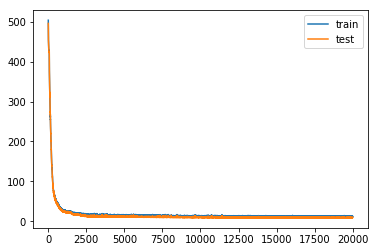

In [311]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainingX, trainingY, epochs=20000, batch_size=50, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [312]:
yhat = model.predict(validateX)

In [313]:
np.savetxt("yhat.csv", yhat.flatten(), delimiter=",")
np.savetxt("testingX.csv", validateX.flatten(), delimiter=",")
np.savetxt("testingY.csv", validateY.flatten(), delimiter=",")

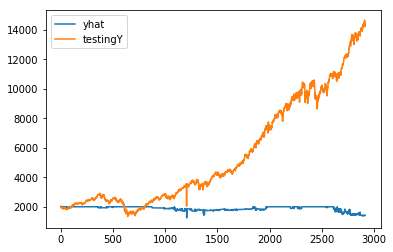

In [314]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()

In [315]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = validateY[i]
    prediction2 = yhat[i + 1]
    real_value2 = validateY[i + 1]
    if prediction2 <= prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    growth.append(initial_capital)

10000
9940.525527667654
9740.528342992706
9582.57350811274
9583.21840264009
9553.940970426956
9400.184282020753
9315.704560178763
9404.64886150544
9404.64886150544
9327.93725431188
9327.93725431188
9420.638917223385
9458.192611963974
9254.774237539606
9355.044960795025
9545.083174054227
9545.420772737956
9323.553364157935
9346.316322363518
9310.67862247146
9295.941706016467
9235.402922921874
9079.81102869258
9024.118988440057
9075.01125610216
9324.785354716822
9324.785354716822
9223.948497083635
9228.404779444418
9404.69682507809
9404.69682507809
9404.69682507809
9443.905606713288
9313.050963952184
9365.766887813894
9629.694073776369
9640.437986943438
9709.34319968535
9564.622971135723
9570.993872846222
9455.345147593122
9373.955221985032
9482.22248188521
9341.2780236571
9202.326017228872
9112.948980249288
9129.954531641055
9113.744972159413
9291.889444860702
9065.97655826332
8965.1975551773
9147.58352762827
9213.12035969708
9143.25995666301
9041.92326483499
9041.92326483499
9041.92326

30446.453238343543
30468.90646856618
30468.90646856618
30368.470747485062
30066.95525520266
30066.95525520266
30066.95525520266
30467.98636394941
30467.98636394941
30467.98636394941
30467.98636394941
30467.98636394941
30467.98636394941
30069.58099109792
29810.20558830223
29959.23836939768
29959.23836939768
30707.400013727547
30442.75695606651
30193.395956125732
30193.395956125732
30069.78141218835
30785.969247735313
30785.969247735313
30785.969247735313
30741.544660398984
30691.020012177996
30691.020012177996
30691.020012177996
30708.801023843527
30708.801023843527
30900.190072931557
30917.45847932362
30917.45847932362
30917.45847932362
30917.45847932362
30775.499207425277
30775.499207425277
30660.64320475824
30660.64320475824
30645.729626791872
30645.729626791872
30819.574590841985
30844.786751034117
30722.9884833197
31431.588902453692
31503.57097590231
31240.589272705838
31209.896208124104
31209.896208124104
31209.896208124104
31506.93579101374
31374.95705195602
31374.95705195602
313

IndexError: index 2917 is out of bounds for axis 0 with size 2917

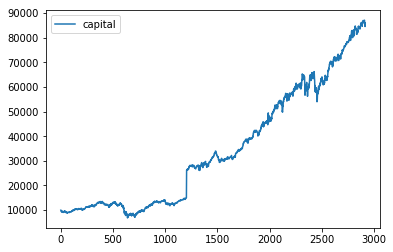

In [316]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()